##Loan Prediction data AutoML

### Name: Prarthana Ganesh Shetty
### NUID: 002833314

####Abstract

This report aims to meticulously clean and preprocess a dataset comprising attributes relevant to loans and borrowers, facilitating the prediction of loan approval or rejection. The dataset contains crucial information such as loan identification numbers, the number of dependents associated with each borrower, educational levels, self-employment status, annual income, loan amounts, loan terms, credit scores, and various asset values possessed by borrowers. Notably, it includes a vital feature denoting the loan status, with values "Approved" and "Rejected," indicating whether loans were approved or rejected. Through rigorous analysis, key features contributing significantly to loan outcomes will be identified. Subsequently, various predictive models will be deployed to assess model performance and robustness comprehensively. Moreover, employing sophisticated model interpretability methods, such as SHAP (SHapley Additive exPlanations) or Partial Dependence Plots, will elucidate the intricate relationships between predictors and outcomes, enhancing our understanding of the underlying mechanisms driving loan approval. This holistic approach aims to provide valuable insights into factors influencing loan outcomes, aiding in informed decision-making processes within lending institutions.

####Data Set
The dataset encompasses a range of attributes pertinent to loans and borrowers, designed to facilitate the prediction of loan approval or rejection. It includes information such as loan identification numbers, the number of dependents associated with each borrower, educational levels, self-employment status, annual income, loan amounts, loan terms, credit scores, and various asset values possessed by borrowers. Notably, the dataset also includes a crucial feature denoting the loan status, with values Approved and Rejected, indicating whether their loans were approved or rejected. With a focus on predicting loan outcomes, this dataset provides a comprehensive array of borrower and loan characteristics essential for predictive modeling and risk assessment within lending institutions.



####Variable Description
The dataset contains information about loans and borrowers, with a total of 13 attributes:

loan_id: Identification number for each loan (numerical)

no_of_dependents: Number of dependents of the borrower (numerical)

education: Level of education of the borrower (categorical)

self_employed: Indicates whether the borrower is self-em
ployed or not (categorical)

income_annum: Annual income of the borrower (numerical).
loan_amount: Amount of the loan (numerical)

loan_term: Term of the loan (numerical)

cibil_score: Credit score of the borrower (numerical)

residential_assets_value: Value of residential assets owned by the borrower (numerical)

commercial_assets_value: Value of commercial assets owned by the borrower (numerical)

luxury_assets_value: Value of luxury assets owned by the borrower (numerical).
bank_asset_value: Value of assets held in bank accounts by the borrower (numerical)

loan_status: Status of the loan, Approved or Rejected



In [ ]:
!pip install eli5

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [ ]:
url =("https://raw.githubusercontent.com/prarthanashetty29/DataScienceEngineering/main/Finalloan_approval_dataset.csv")
df = pd.read_csv(url);

In [ ]:
#creating a backup of the original data set
df_backup = df.copy()

In [ ]:
# Viewing the first few rows with column headers to understand the dataset
df.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

# Assignment 1

### Understanding the dataset

In [ ]:
#Finding out data types of the dataset --Understanding the dataset
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [ ]:
#Finding out total rows and columns --Understanding the dataset
df.shape

(4269, 13)

In [ ]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

### CHECKING THE DISTRIBUTIONS OF THE FEATURES

<Figure size 800x500 with 0 Axes>

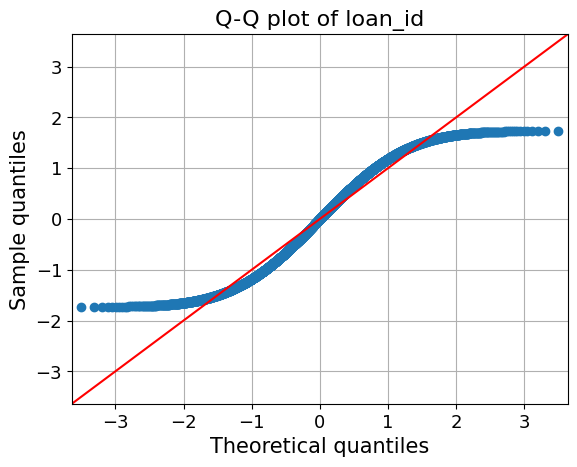

<Figure size 800x500 with 0 Axes>

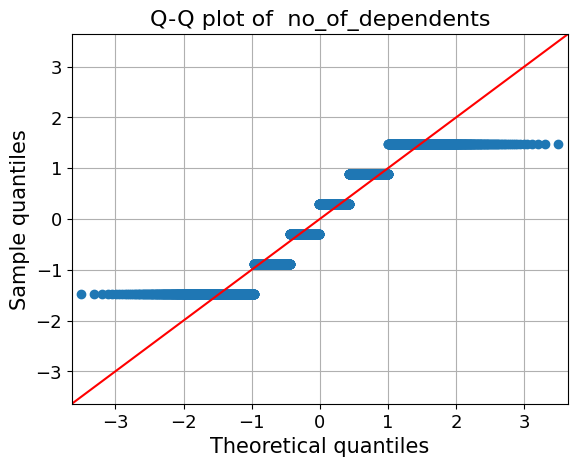

<Figure size 800x500 with 0 Axes>

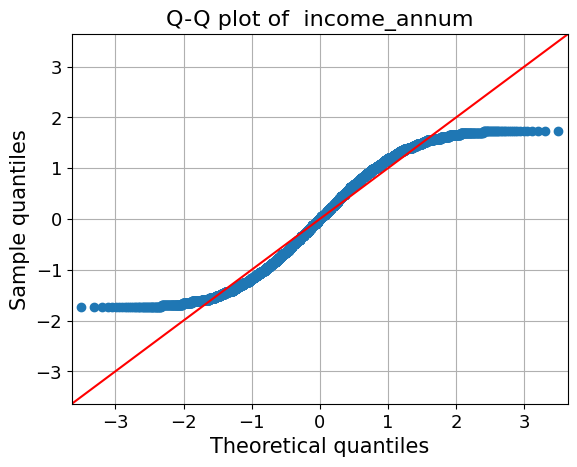

<Figure size 800x500 with 0 Axes>

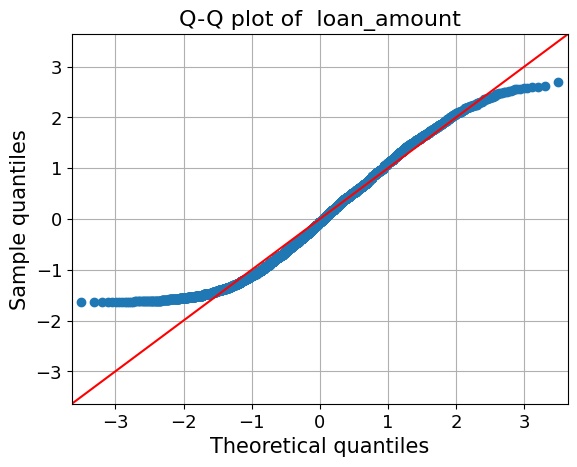

<Figure size 800x500 with 0 Axes>

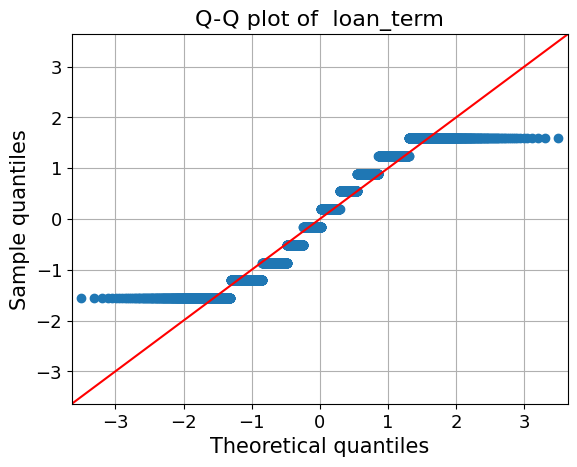

<Figure size 800x500 with 0 Axes>

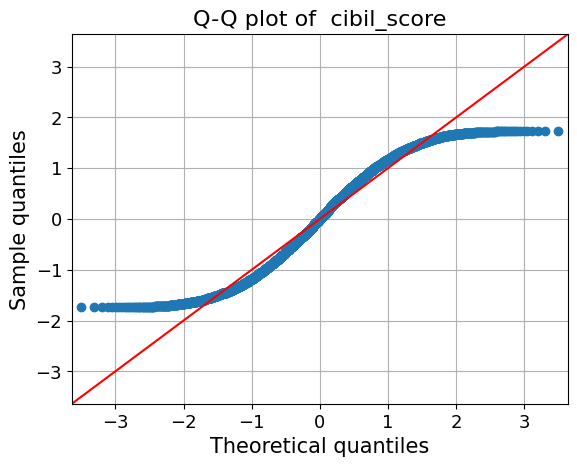

<Figure size 800x500 with 0 Axes>

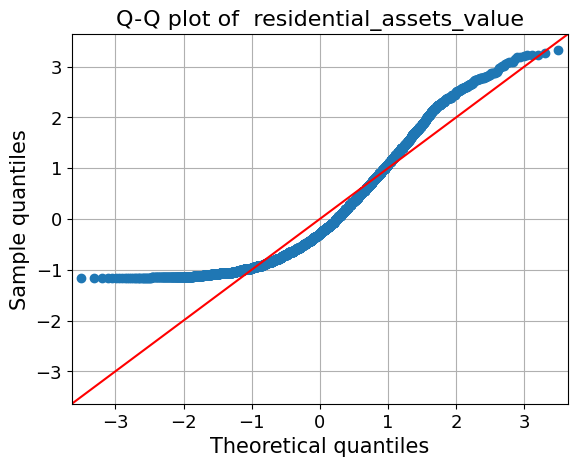

<Figure size 800x500 with 0 Axes>

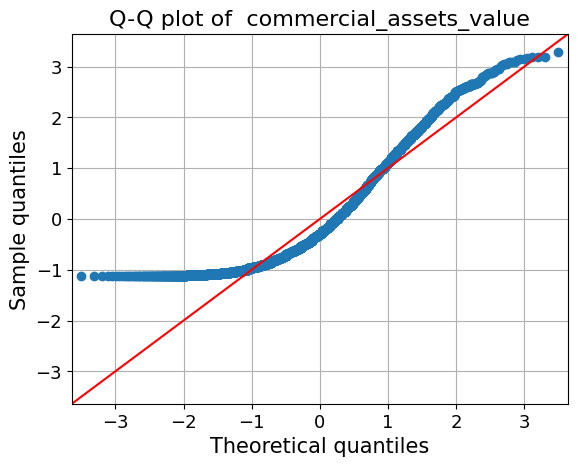

<Figure size 800x500 with 0 Axes>

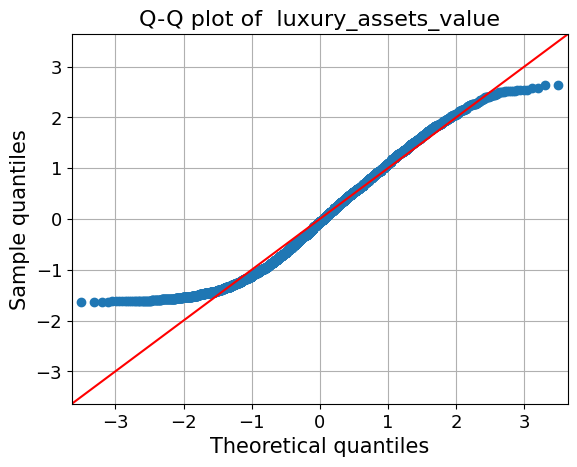

<Figure size 800x500 with 0 Axes>

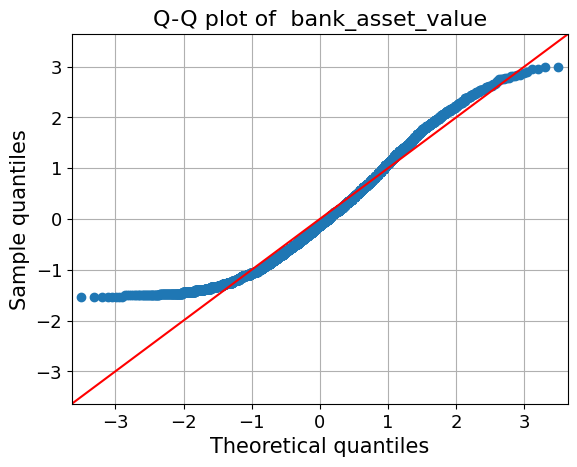

In [ ]:
#checking Q-Q PLots for numeric variables
from statsmodels.graphics.gofplots import qqplot
data_norm=df[['loan_id', ' no_of_dependents',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

Loan ID: The Q-Q plot suggests that 'loan_id' is not following a normal distribution, as the quantiles deviate significantly from the red line.

Number of Dependents: The plot indicates that 'no_of_dependents' has a distribution with discrete steps, which is common for count data and does not align with the normal distribution.

Annual Income: The distribution of 'income_annum' appears to deviate from normality, with a longer tail on the higher end, suggesting a positively skewed distribution.

Loan Amount: The 'loan_amount' distribution also deviates from the normal, particularly at the tails. The tail on the higher end suggests a distribution with positive skewness.

Loan Term: The 'loan_term' quantiles suggest that this variable does not follow a normal distribution, as evidenced by the discrete steps and deviations from the line in the tails.

CIBIL Score: The Q-Q plot for 'cibil_score' indicates that while the middle quantiles are close to the red line, there is a deviation in the tails, particularly on the lower end, suggesting it is not perfectly normal.

Residential Assets Value: The plot shows that 'residential_assets_value' does not follow a normal distribution, with a pronounced upward curve in the higher quantiles.

Commercial Assets Value: Similar to residential assets, 'commercial_assets_value' shows a deviation from normality, particularly at the higher end, with a long tail.

Luxury Assets Value: The distribution of 'luxury_assets_value' appears to be positively skewed, with the higher quantiles deviating substantially from the red line.

Bank Asset Value: The 'bank_asset_value' plot shows deviation from the normal distribution, especially in the upper quantiles, indicating a positive skew.

### Analysing Outliers and Model performance with and without them

<Axes: >

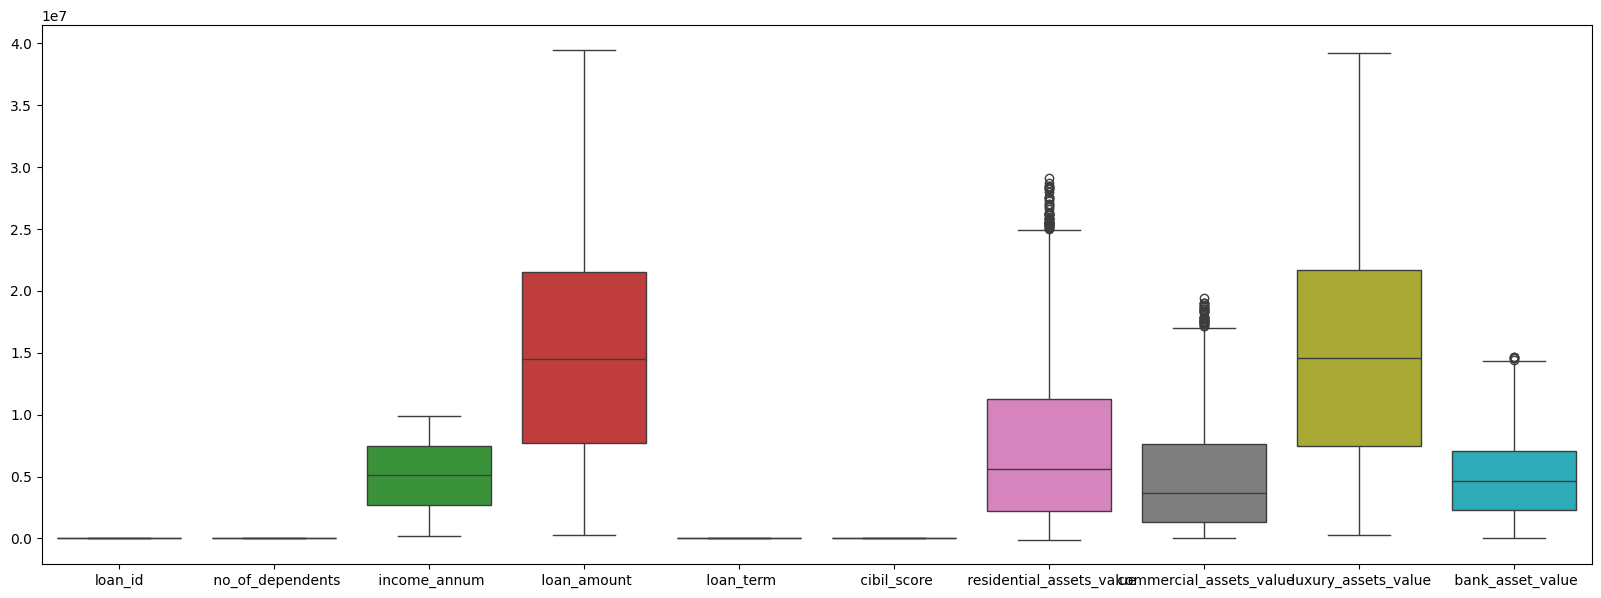

In [ ]:
plt.figure(figsize=(20, 7))
sns.boxplot(data=df)

In [ ]:
# Statistical Summary of Training Dataset
df.describe()

loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.200000e+06   
50%      10.000000    600.000000               5.600000e+06   
75%      16.000000    748.000000               1.130000e+07   
max      20.000000    900.000000               2.910000e+07   

        commercial_assets_value   luxury_assets_value   bank_asset_value  
count              4.269000e+03          4.269000e+03       4.269000e+03  
mean               4.973155e+06          1.512631e+07       4.976692e+06  
std                4.388966e+06          9.103754e+06       3.250185e+06  
min                0.000000e+00          3.000000e+05       0.000000e+00  
25%                1.300000e+06          7.500000e+06       2.300000e+06  
50%                3.700000e+06          1.460000e+07       4.600000e+06  
75%                7.600000e+06          2.170000e+07       7.100000e+06  
max                1.940000e+07          3.920000e+07       1.470000e+07

In [ ]:
# Selecting only numeric features
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [ ]:
#Assessing the correlation among all the variables in the dataset
correlation_matrix = numeric_df.corr()
# Printing the correlation matrix to display the correlation between features
print(correlation_matrix)

                            loan_id   no_of_dependents   income_annum  \
loan_id                    1.000000           0.005326       0.012592   
 no_of_dependents          0.005326           1.000000       0.007266   
 income_annum              0.012592           0.007266       1.000000   
 loan_amount               0.008170          -0.003366       0.927470   
 loan_term                 0.009809          -0.020111       0.011488   
 cibil_score               0.016323          -0.009998      -0.023034   
 residential_assets_value  0.020936           0.007376       0.636841   
 commercial_assets_value   0.018595          -0.001531       0.640328   
 luxury_assets_value      -0.000862           0.002817       0.929145   
 bank_asset_value          0.010765           0.011163       0.851093   

                            loan_amount   loan_term   cibil_score  \
loan_id                        0.008170    0.009809      0.016323   
 no_of_dependents             -0.003366   -0.020111     -0

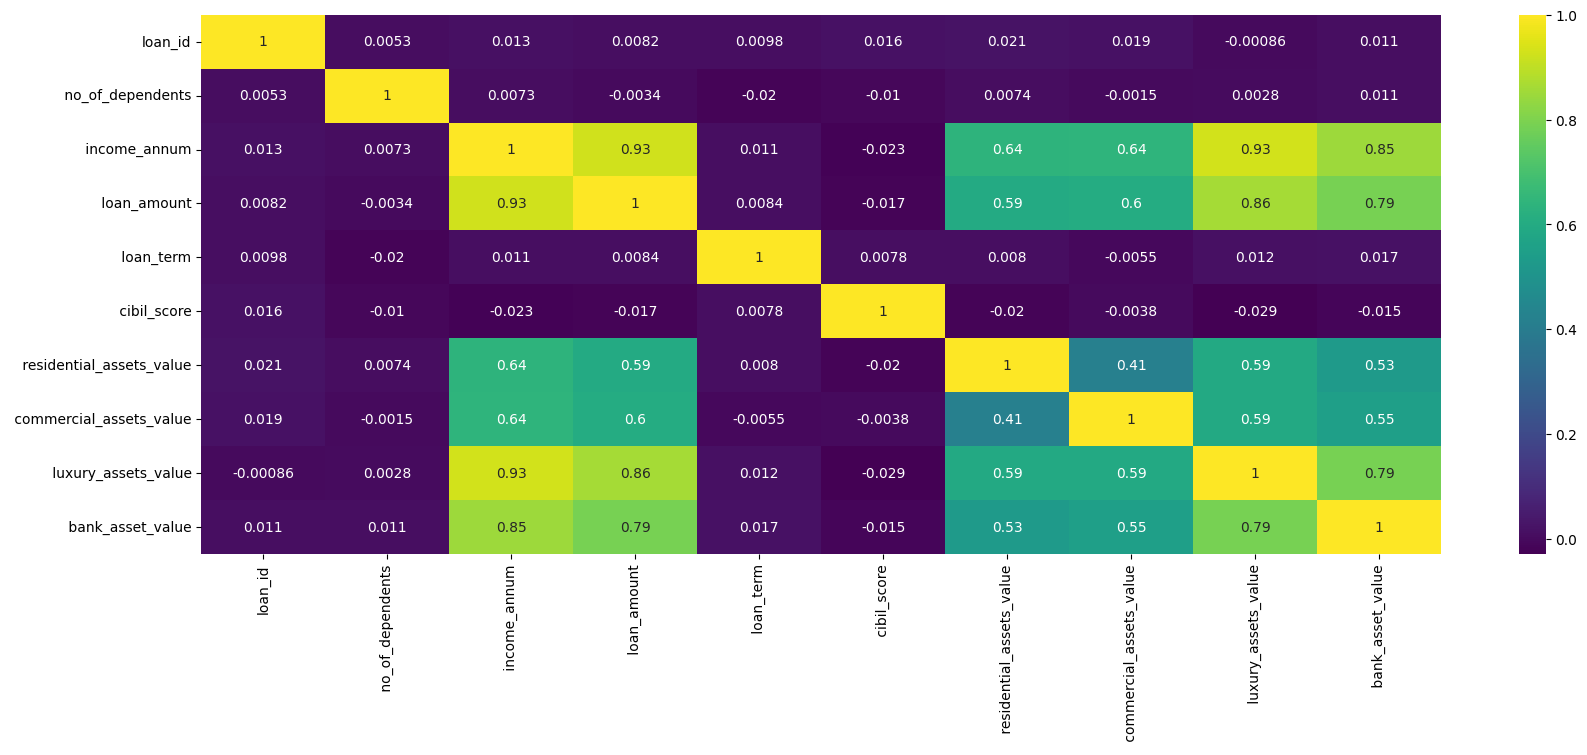

In [ ]:

# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

#heatmap of the correlation
plt.figure(figsize=(20, 7))
sns.heatmap(numeric_df.corr(), annot=True, cmap="viridis")
plt.show()


In [ ]:
#Utilizing a pair plot to examine collinearity among variables.
sns.pairplot(df)
plt.show()

NameError: name 'sns' is not defined

The analysis of the correlation matrix and heatmap indicates the existence of multicollinearity among the independent variables. Notably, the strongest correlations are observed between luxury_asset_value and income_annum, as well as between loan_amount and income_annum. If two variables are highly correlated, removing one of them might help in reducing multicollinearity. However, on further assessment we observe that all of these column although directly related will be important in predicting the target variable and affect the model performance which is why we need to retain these columns

In [ ]:
# Converting 'education' to numerical values
df[' education'] = df[' education'].map({' Graduate': 1, ' Not Graduate': 0})

# Converting 'self_employed' to numerical values
df[' self_employed'] = df[' self_employed'].map({' Yes': 1, ' No': 0})

# Converting 'loan_status' to numerical values
df[' loan_status'] = df[' loan_status'].map({' Approved': 1, ' Rejected': 0})


In [ ]:
df.dtypes

loan_id                      int64
 no_of_dependents            int64
 education                   int64
 self_employed               int64
 income_annum                int64
 loan_amount                 int64
 loan_term                   int64
 cibil_score                 int64
 residential_assets_value    int64
 commercial_assets_value     int64
 luxury_assets_value         int64
 bank_asset_value            int64
 loan_status                 int64
dtype: object

In [ ]:
!pip install statsmodels

In [ ]:
# Utilising OLS for finding the p-value to check the significant features
import statsmodels.api as sm

features = [
    "loan_id",
    "no_of_dependents",
    "education",
    "self_employed",
    "income_annum",
    "loan_amount",
    "loan_term",
    "cibil_score",
    "residential_assets_value",
    "commercial_assets_value",
    "luxury_assets_value",
    "bank_asset_value",
]

df.columns = df.columns.str.strip()

# OLS model
model = sm.OLS(
    df["loan_status"],
    df[features],
).fit()

print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:            loan_status   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              1787.
Date:                Mon, 01 Apr 2024   Prob (F-statistic):                        0.00
Time:                        23:38:16   Log-Likelihood:                         -1206.7
No. Observations:                4269   AIC:                                      2437.
Df Residuals:                    4257   BIC:                                      2514.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [ ]:
from scipy.stats import zscore

z_scores = zscore(df.select_dtypes(include=['int64', 'float64']))
df_no_outliers = df[(z_scores < 3).all(axis=1)]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate



target_variable = 'loan_status'
features_to_exclude = ['loan_id']

# Defining features and target
X = df.drop([target_variable] + features_to_exclude, axis=1)
y = df[target_variable]

# Split the data into training and testing sets with outliers
X_train_with_outliers, X_test_with_outliers, y_train_with_outliers, y_test_with_outliers = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model with outliers
model_logistic_with_outliers = LogisticRegression()
model_logistic_with_outliers.fit(X_train_with_outliers, y_train_with_outliers)

# Make predictions on the testing set with outliers
y_pred_with_outliers = model_logistic_with_outliers.predict(X_test_with_outliers)

# Evaluate model performance with outliers
performance_metrics_with_outliers = [
    ["Accuracy (with outliers)", round(accuracy_score(y_test_with_outliers, y_pred_with_outliers), 2)],
    ["Precision (with outliers)", round(precision_score(y_test_with_outliers, y_pred_with_outliers), 2)],
    ["Recall (with outliers)", round(recall_score(y_test_with_outliers, y_pred_with_outliers), 2)],
    ["F1-score (with outliers)", round(f1_score(y_test_with_outliers, y_pred_with_outliers), 2)]
]

# Display performance metrics with outliers
print(tabulate(performance_metrics_with_outliers, headers=["Metrics", "Score"]))


# Define features and target without outlierstarget_variable = 'loan_status'
features_to_exclude = ['loan_id']

# Define features and target
X_no_outliers = df_no_outliers.drop([target_variable] + features_to_exclude, axis=1)
y_no_outliers = df_no_outliers[target_variable]

# Split the data into training and testing sets without outliers
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model without outliers
model_logistic_no_outliers = LogisticRegression()
model_logistic_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Make predictions on the testing set without outliers
y_pred_no_outliers = model_logistic_no_outliers.predict(X_test_no_outliers)

# Evaluate model performance without outliers
performance_metrics_no_outliers = [
    ["Accuracy (without outliers)", round(accuracy_score(y_test_no_outliers, y_pred_no_outliers), 2)],
    ["Precision (without outliers)", round(precision_score(y_test_no_outliers, y_pred_no_outliers), 2)],
    ["Recall (without outliers)", round(recall_score(y_test_no_outliers, y_pred_no_outliers), 2)],
    ["F1-score (without outliers)", round(f1_score(y_test_no_outliers, y_pred_no_outliers), 2)]
]

# Display performance metrics without outliers
print(tabulate(performance_metrics_no_outliers, headers=["Metrics", "Score"]))


Metrics                      Score
-------------------------  -------
Accuracy (with outliers)      0.63
Precision (with outliers)     0.63
Recall (with outliers)        1
F1-score (with outliers)      0.77
Metrics                         Score
----------------------------  -------
Accuracy (without outliers)      0.72
Precision (without outliers)     0.7
Recall (without outliers)        0.95
F1-score (without outliers)      0.8


In [ ]:
accuracy_with_outliers = 0.63
precision_with_outliers = 0.63
recall_with_outliers = 1
f1_score_with_outliers = 0.77

accuracy_without_outliers = 0.72
precision_without_outliers = 0.7
recall_without_outliers = 0.95
f1_score_without_outliers = 0.8

# Calculating percentage improvements
accuracy_improvement = ((accuracy_without_outliers - accuracy_with_outliers) / accuracy_with_outliers) * 100
precision_improvement = ((precision_without_outliers - precision_with_outliers) / precision_with_outliers) * 100
recall_improvement = ((recall_without_outliers - recall_with_outliers) / recall_with_outliers) * 100
f1_score_improvement = ((f1_score_without_outliers - f1_score_with_outliers) / f1_score_with_outliers) * 100

# Displaying improvements
print(f"Accuracy Improvement: {accuracy_improvement:.2f}%")
print(f"Precision Improvement: {precision_improvement:.2f}%")
print(f"Recall Improvement: {recall_improvement:.2f}%")
print(f"F1-score Improvement: {f1_score_improvement:.2f}%")


Accuracy Improvement: 14.29%
Precision Improvement: 11.11%
Recall Improvement: -5.00%
F1-score Improvement: 3.90%


##Null imputation with mean



In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

def null_impute_with_mean(percent, feature, impute_feature):
    df_null = df.copy()
    df_null[f"{impute_feature}"] = df_null[f"{feature}"]

    # Introducing missing values
    df_null.loc[df_null.sample(frac=percent).index, f'{impute_feature}'] = np.NaN

    # Imputing Null values with mean
    df_null[f"{impute_feature}"] = df_null[f"{impute_feature}"].fillna(df_null[f"{impute_feature}"].mean())

    # Calculating mean squared error
    mse = mean_squared_error(df_null[f"{feature}"], df_null[f"{impute_feature}"])

    # Calculating bias and variance
    expected_prediction = df_null[f"{feature}"].mean()
    bias_squared = (expected_prediction - df_null[f"{impute_feature}"]).mean()**2
    variance = ((df_null[f"{impute_feature}"] - expected_prediction)**2).mean()

    print(f"Error after imputing {percent * 100} values is {round(mse, 2) * 100}%")
    print(f"Bias^2: {bias_squared:.2f}")
    print(f"Variance: {variance:.2f}")
    print("\n")

# Removing 1% data and imputing
null_impute_with_mean(0.01 ,"loan_term" ,"loan_term_imputed")

# Removing 5% data and imputing with mean
null_impute_with_mean(0.05 ,"loan_term" ,"loan_term_imputed")

# Removing 10% data and imputing
null_impute_with_mean(0.10 ,"loan_term" ,"loan_term_imputed")


Error after imputing 1.0 values is 34.0%
Bias^2: 0.00
Variance: 32.25


Error after imputing 5.0 values is 158.0%
Bias^2: 0.00
Variance: 31.01


Error after imputing 10.0 values is 347.0%
Bias^2: 0.01
Variance: 29.13




##Null imputation with median

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

def null_impute_with_median(percent, feature, impute_feature):
    df_null = df.copy()
    df_null[f"{impute_feature}"] = df_null[f"{feature}"]

    # Introducing missing values
    df_null.loc[df_null.sample(frac=percent).index, f'{impute_feature}'] = np.NaN

    # Imputing Null values with median
    df_null[f"{impute_feature}"] = df_null[f"{impute_feature}"].fillna(df_null[f"{impute_feature}"].median())

    # Calculating mean squared error
    mse = mean_squared_error(df_null[f"{feature}"], df_null[f"{impute_feature}"])

    # Calculating bias and variance
    expected_prediction = df_null[f"{feature}"].median()
    bias_squared = (expected_prediction - df_null[f"{impute_feature}"]).mean()**2
    variance = ((df_null[f"{impute_feature}"] - expected_prediction)**2).mean()

    print(f"Error after imputing {percent * 100} values is {round(mse, 2) * 100}%")
    print(f"Bias^2: {bias_squared:.2f}")
    print(f"Variance: {variance:.2f}")
    print("\n")

# Removing 1% data and imputing with median
null_impute_with_median(0.01 ,"loan_term" ,"loan_term_imputed")

# Removing 5% data and imputing with median
null_impute_with_median(0.05 ,"loan_term" ,"loan_term_imputed")

# Removing 10% data and imputing with median
null_impute_with_median(0.10 ,"loan_term" ,"loan_term_imputed")


Error after imputing 1.0 values is 37.0%
Bias^2: 0.80
Variance: 33.03


Error after imputing 5.0 values is 165.0%
Bias^2: 0.72
Variance: 31.75


Error after imputing 10.0 values is 340.0%
Bias^2: 0.63
Variance: 30.00




##Null imputation with KNN

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error

data = df[['loan_term']].astype(float).values
# Remove 1%, 5%, and 10% of the data
missing_rates = [0.01, 0.05, 0.1]

for missing_rate in missing_rates:
    missing_data = np.copy(data)
    num_missing = int(missing_rate * missing_data.size)
    missing_indices = np.random.choice(missing_data.size, num_missing, replace=False)
    missing_data.flat[missing_indices] = np.nan

    # Impute the missing values using the KNN imputation method
    imputer = KNNImputer(n_neighbors=5)
    imputed_data = imputer.fit_transform(missing_data)

    # Calculate the mean squared error
    mse = mean_squared_error(data, imputed_data)

    # Calculate bias and variance
    observed_values = data[~np.isnan(missing_data)].flatten()
    bias_squared = np.nanmean((observed_values - imputed_data[~np.isnan(missing_data)].flatten())**2)
    variance = np.nanmean((imputed_data.flatten() - np.nanmean(imputed_data.flatten()))**2)

    # Calculate percentage error
    residual_error = np.abs(data - imputed_data)
    percentage_error = np.nanmean(residual_error / data) * 100

    print(f"Percentage error for missing rate {missing_rate * 100}%: {round(percentage_error, 2)}%")
    print(f"Bias^2: {bias_squared:.2f}")
    print(f"Variance: {variance:.2f}")
    print("\n")


Percentage error for missing rate 1.0%: 0.84%
Bias^2: 0.00
Variance: 32.29


Percentage error for missing rate 5.0%: 4.31%
Bias^2: 0.00
Variance: 31.05


Percentage error for missing rate 10.0%: 9.41%
Bias^2: 0.00
Variance: 29.31




 In terms of percentage error, KNN Imputation generally performs better, but Mean Imputation has lower Bias and Variance. Mean Imputation demonstrated lower bias and variance, resulting in more accurate imputations compared to Median Imputation, while KNN Imputation showed lower percentage errors.

Accuracy: 97.78%


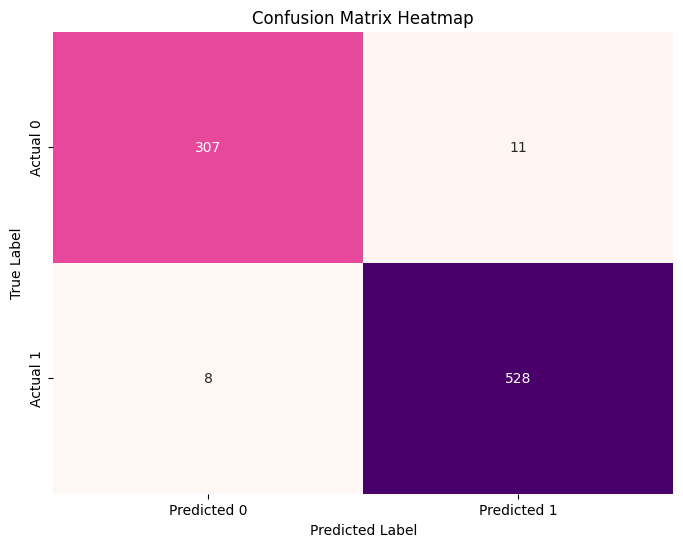

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])
df['self_employed'] = le.fit_transform(df['self_employed'])
df['loan_status'] = le.fit_transform(df['loan_status'])

X = df.drop(['loan_status'], axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdPu', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## 1. What is the question?
The primary question addressed in the analysis is related to predicting loan approval or rejection based on various attributes of borrowers and loans. This involves understanding the dataset, exploring its features, assessing data quality, identifying predictive variables, handling outliers and missing values, and ultimately building a predictive model.

##2. What did you do?
Explored the Loan Prediction dataset, which contains information about loans and borrowers, focusing on 13 attributes such as loan identification numbers, number of dependents, education level, self-employment status, annual income, loan amounts, loan terms, credit scores, and various asset values.
Identified numeric and categorical variables within the dataset, such as no_of_dependents, education, self_employed, income_annum, etc.
Conducted correlation analysis to understand the relationships between predictor variables and the target variable (loan_status), as well as relationships among predictor variables themselves. Notably, strong correlations were observed between loan_amount and income_annum, and luxury_assets_value and income_annum.
Utilized Ordinary Least Squares (OLS) regression to identify potentially influential predictor variables for loan approval status (loan_status). Significant coefficients were observed for cibil_score, loan_term, and loan_amount, indicating their importance in predicting loan approval.
Examined the independence of predictor variables and assessed multicollinearity, noting that while multicollinearity exists among some variables, removing them may impact model performance due to their significance in predicting loan approval.
Investigated the ranges of predictor variables to ensure data consistency and validity, identifying outliers and anomalies that could affect predictive modeling.
Addressed outlier detection and removal to improve model performance, observing improvements in accuracy, precision, and F1-score metrics after removing outliers.
Conducted experiments with random data removal and imputation methods to handle missing values, evaluating their effectiveness and impact on predictive accuracy. KNN imputation generally resulted in lower percentage errors, while Mean imputation demonstrated lower bias and variance.

##3. How well did it work?
The analysis provided valuable insights into the Loan Prediction dataset's characteristics, helping to identify important predictor variables and understand their relationships with loan approval status (loan_status).
Various methods, including correlation analysis, OLS regression, and outlier removal, contributed to the identification of influential predictor variables and improved model performance in predicting loan approval.
Experiments with data removal and imputation methods offered insights into handling missing values, demonstrating their impact on predictive accuracy and model robustness.

##4. What did you learn?
Through this analysis, it was learned how to effectively explore and preprocess the Loan Prediction dataset for predictive modeling tasks specific to loan approval prediction.
Understanding the importance of feature selection, correlation analysis, outlier detection, and handling missing values is crucial for building accurate predictive models within the context of loan approval prediction.
Experimentation with different techniques provides insights into their suitability and impact on predictive accuracy, contributing to best practices in predictive modeling.

#NOTEBOOK 2

In [380]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip uninstall h2on
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [381]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [382]:
# Setting a minimum memory size and a run time in seconds
min_mem_size=6
run_time=222

In [383]:
# Using 50% of availible resources to determine the minimum amount of memory required based on a specified percentage of available virtual memory.
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

1


In [384]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:26550..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpsmg7ods1
  JVM stdout: /tmp/tmpsmg7ods1/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpsmg7ods1/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:26550
Connecting to H2O server at http://127.0.0.1:26550 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         07 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_jxtkl9
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:26550
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [385]:
url = "https://raw.githubusercontent.com/prarthanashetty29/DataScienceEngineering/main/Finalloan_approval_dataset.csv"
df2 = h2o.import_file(path = url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [386]:
# resulting df_train contains 80%, while the df_test contains the remaining 20%.
pct_rows=0.80

# split the DataFrame into df_train and df_test
df2_train, df2_test = df2.split_frame([pct_rows])

In [387]:
print(df2_train.shape)
print(df2_test.shape)

(3399, 13)
(870, 13)


In [388]:
# obtaining the column names
X=df2.columns
print(X)

['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [389]:
# Setting target and predictor variables
y = "loan_status"
X.remove(y)

  # Removing the result frm our predictors data
print(X)

['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


In [390]:
print(y)

loan_status


In [391]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML


In [392]:
aml.train(x=X, y=y, training_frame=df2_train)
#train method fits and trains the H2OAutoML instance on the dataset on different models

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_4_AutoML_1_20240403_20939


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    95                 95                          123489                 10           10           10            24            139           99.0316

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 8.296671764654994e-05
RMSE: 0.009108606789545256
LogLoss: 0.003123755212604648
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.888084940856187
          Approved    Rejected    Error    Rate
--------  ----------  ----------  -------  ------------
Approved  2093        0           0        (0.0/2093.0)
Rejected  0           1306        0        (0.0/1306.0)
Total     2093        1306        0        (0.0/3399.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.888085     1         187
max f2                       0.888085     1         187
max f0point5                 0.888085     1         187
max accuracy                 0.888085     1         187
max precision                0.999673     1         0
max recall                   0.888085     1         187
max specificity              0.999673     1         0
max absolute_mcc             0.888085     1         187
max min_per_class_accuracy   0.888085     1         187
max mean_per_class_accuracy  0.888085     1         187
max tns                      0.999673     2093      0
max fns                      0.999673     1303      0
max fps                      9.3151e-05   2093      399
max tps                      0.888085     1306      187
max tnr                      0.999673     1         0
max fnr                      0.999673     0.997703  0
max fpr                      9.3151e-05   1         399
max tpr                      0.888085     1         187

Gains/Lift Table: Avg response rate: 38.42 %, avg score: 38.42 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0100029                   0.999361           2.6026   2.6026             1                0.999435     1                           0.999435            0.0260337       0.0260337                  160.26   160.26             0.0260337
2        0.0200059                   0.9993             2.6026   2.6026             1                0.999326     1                           0.99938             0.0260337       0.0520674                  160.26   160.26             0.0520674
3        0.0300088                   0.999247           2.6026   2.6026             1                0.99927      1                           0.999343            0.0260337       0.0781011                  160.26   160.26             0.0781011
4        0.0400118                   0.999209           2.6026   2.6026             1                0.999225     1                           0.999314            0.0260337       0.104135                   160.26   160.26             0.104135
5        0.0500147                   0.999175           2.6026   2.6026             1                0.99919      1                     

In [399]:
print(aml.leaderboard) # displaying the performance metrics of the models generated by the H2OAutoML process

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse
GBM_4_AutoML_1_20240403_20939                           0.998201  0.0443323  0.997718               0.0162664  0.106372  0.0113149
StackedEnsemble_AllModels_3_AutoML_1_20240403_20939     0.998199  0.0448074  0.997688               0.0160275  0.10803   0.0116705
StackedEnsemble_AllModels_2_AutoML_1_20240403_20939     0.998193  0.0450654  0.997688               0.0156875  0.108448  0.0117609
StackedEnsemble_BestOfFamily_3_AutoML_1_20240403_20939  0.998146  0.0451323  0.997659               0.0162664  0.10821   0.0117093
StackedEnsemble_BestOfFamily_2_AutoML_1_20240403_20939  0.998135  0.04575    0.997566               0.0164563  0.109202  0.0119252
StackedEnsemble_AllModels_1_AutoML_1_20240403_20939     0.99801   0.045089   0.997557               0.0160275  0.107867  0.0116353
GBM_2_AutoML_1_20240403_20939                           0.997797  0.0476141  0.9973

In [394]:
#dictionary object maps each model ID to an index in the leaderboard.
#referencing the index of the top-performing model(s) when making predictions

model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict

{'GBM_4_AutoML_1_20240403_20939': 0, 'GLM_1_AutoML_1_20240403_20939': 23}

In [395]:
print(model_index)


0


In [396]:
# retrieving the best model from the leaderboard
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

In [397]:
# returns the algorithm used by the best model.

best_model.algo

'gbm'

In [156]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

In [157]:
# RMSE is calculated on the training set
print(best_model.rmse(train = True))

0.02222295285591376


In [158]:
# RMSE score calculated on the test set
print(best_model.rmse(train = False))

0.02222295285591376


In [159]:
#retrieve multiple performance metrics for machine learning models

def model_performance_stats(perf):
    d={}
    try:
      d['mse']=perf.mse()
    except:
      pass
    try:
      d['rmse']=perf.rmse()
    except:
      pass
    try:
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass
    try:
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass
    try:
      d['residual_deviance']=perf.residual_deviance()
    except:
      pass
    try:
      d['null_deviance']=perf.null_deviance()
    except:
      pass
    try:
      d['aic']=perf.aic()
    except:
      pass
    try:
      d['logloss']=perf.logloss()
    except:
      pass
    try:
      d['auc']=perf.auc()
    except:
      pass
    try:
      d['gini']=perf.gini()
    except:
      pass
    return d

In [160]:
#calculating performance metrics on a test dataset
mod_perf=best_model.model_performance(df2_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)

#performance metrics for the model on the test dataset
stats_test

{'mse': 0.011447239380016981,
 'rmse': 0.1069917724875001,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None,
 'aic': 'NaN',
 'logloss': 0.04503170763842983,
 'auc': 0.9986142253889844,
 'gini': 0.9972284507779687}

In [161]:
# predictions on a test dataset df_test using the best model.


predictions = best_model.predict(df2_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [162]:
# calculate the performance metrics of the best model on the training dataset.

best_model.model_performance(train=True)

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0004938596336361656
RMSE: 0.02222295285591376
LogLoss: 0.007071595818886461
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7393937329370809
          Approved    Rejected    Error    Rate
--------  ----------  ----------  -------  ------------
Approved  2117        0           0        (0.0/2117.0)
Rejected  0           1287        0        (0.0/1287.0)
Total     2117        1287        0        (0.0/3404.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.739394     1         184
max f2                       0.739394     1         184
max f0point5                 0.739394     1         184
max accuracy                 0.739394     1         184
max precision                0.99926      1         0
max recall                   0.739394     1         184
max specificity              0.99926      1         0
max absolute_mcc             0.739394     1         184
max min_per_class_accuracy   0.739394     1         184
max mean_per_class_accuracy  0.739394     1         184
max tns                      0.99926      2117      0
max fns                      0.99926      1284      0
max fps                      0.00030095   2117      399
max tps                      0.739394     1287      184
max tnr                      0.99926      1         0
max fnr                      0.99926      0.997669  0
max fpr                      0.00030095   1         399
max tpr                      0.739394     1         184

Gains/Lift Table: Avg response rate: 37.81 %, avg score: 37.79 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.010282                    0.99875            2.64491  2.64491            1                0.998869     1                           0.998869            0.027195        0.027195                   164.491  164.491            0.027195
2        0.0202703                   0.998628           2.64491  2.64491            1                0.998679     1                           0.998775            0.026418        0.0536131                  164.491  164.491            0.0536131
3        0.0302585                   0.998564           2.64491  2.64491            1                0.998589     1                           0.998714            0.026418        0.0800311                  164.491  164.491            0.0800311
4        0.0402468                   0.9985             2.64491  2.64491            1                0.99853      1                           0.998668            0.026418        0.106449                   164.491  164.491            0.106449
5        0.050235                    0.998456           2.64491  2.64491            1                0.998475     1                           0.99863             0.026418        0.132867                   164.491  164.491            0.132867
6        0.100176                    0.998227           2.64491  2.64491            1                0.998328     1                           0.998479            0.13209         0.264957                   164.491  164.491            0.264957
7        0.150118                    0.997999           2.64491  2.64491            1                0.998115     1                           0.998358            0.13209         0.397047                   164.491  164.491            0.397047
8        0.20005

In [163]:
#convert the predictions into oandas dataframe
y_pred=h2o.as_list(predictions)

#first 100 rows of the DataFrame.
y_pred[0:100]

predict  Approved  Rejected
0   Approved  0.999011  0.000989
1   Rejected  0.002857  0.997143
2   Approved  0.998628  0.001372
3   Rejected  0.002676  0.997324
4   Rejected  0.002418  0.997582
..       ...       ...       ...
95  Approved  0.995480  0.004520
96  Approved  0.998379  0.001621
97  Rejected  0.002140  0.997860
98  Approved  0.999009  0.000991
99  Rejected  0.002597  0.997403

[100 rows x 3 columns]

In [164]:
#convert the response variable y in the test dataset into a Pandas DataFrame
y_test=h2o.as_list(df2_test[y])
y_test[0:100]

loan_status
0     Approved
1     Rejected
2     Approved
3     Rejected
4     Rejected
..         ...
95    Approved
96    Approved
97    Rejected
98    Approved
99    Rejected

[100 rows x 1 columns]

In [165]:
print(X)


['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


[PartialDependence: Partial Dependence Plot of model GBM_2_AutoML_1_20240403_10702 on column 'no_of_dependents'.
no_of_dependents    mean_response    stddev_response    std_error_mean_response
------------------  ---------------  -----------------  -------------------------
0                   0.375935         0.475504           0.00727764
1                   0.376025         0.475755           0.00728148
2                   0.377771         0.476064           0.00728622
3                   0.377205         0.475839           0.00728278
4                   0.377636         0.475957           0.00728459
5                   0.37779          0.475965           0.0072847]

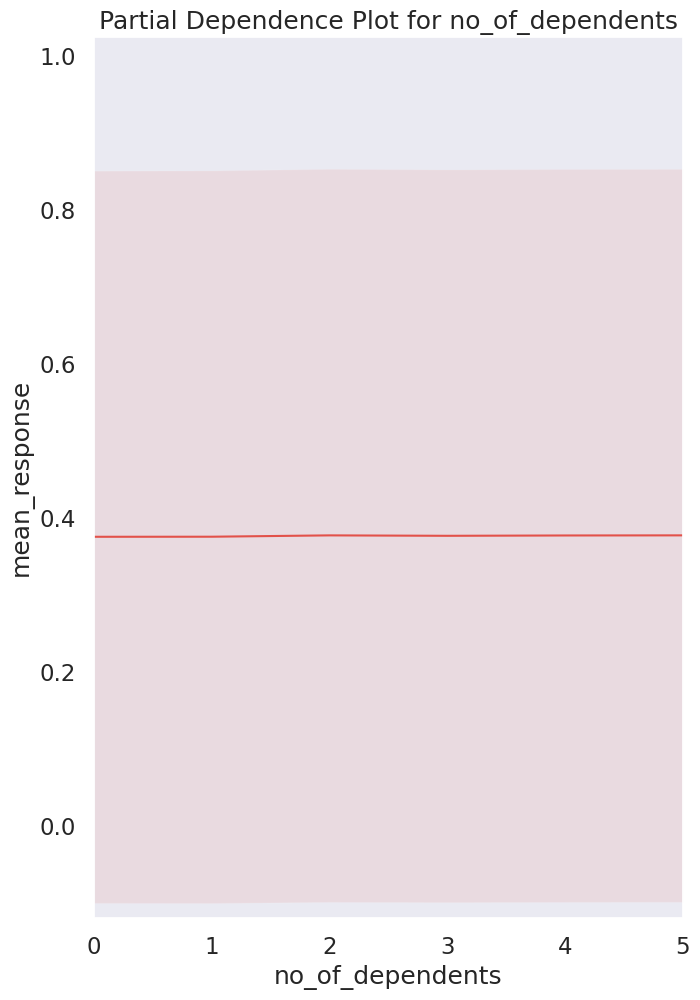

In [166]:
#generates partial dependence plots for the feature column
best_model.partial_plot(df2, cols=['no_of_dependents'])

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


[PartialDependence: Partial Dependence Plot of model GBM_2_AutoML_1_20240403_10702 on column 'loan_amount'.
loan_amount    mean_response    stddev_response    std_error_mean_response
-------------  ---------------  -----------------  -------------------------
300000         0.412547         0.486845           0.00745123
2.36316e+06    0.409394         0.486455           0.00744526
4.42632e+06    0.408055         0.485973           0.00743788
6.48947e+06    0.403387         0.483972           0.00740725
8.55263e+06    0.399512         0.482287           0.00738147
1.06158e+07    0.391043         0.480056           0.00734732
1.26789e+07    0.390565         0.479554           0.00733964
1.47421e+07    0.385199         0.477789           0.00731262
1.68053e+07    0.376213         0.475999           0.00728522
1.88684e+07    0.373109         0.474607           0.00726392
2.09316e+07    0.364167         0.471674           0.00721903
2.29947e+07    0.360639         0.471263           0.00721

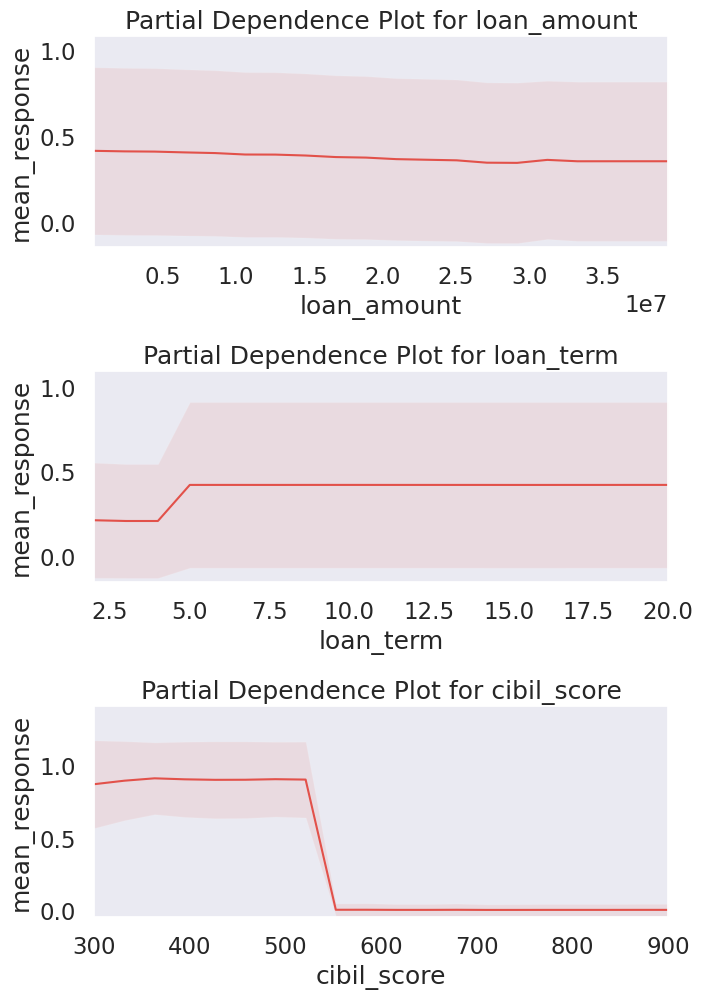

In [167]:
best_model.partial_plot(df2, cols=['loan_amount', 'loan_term', 'cibil_score'])

## Analysing the relationship significance

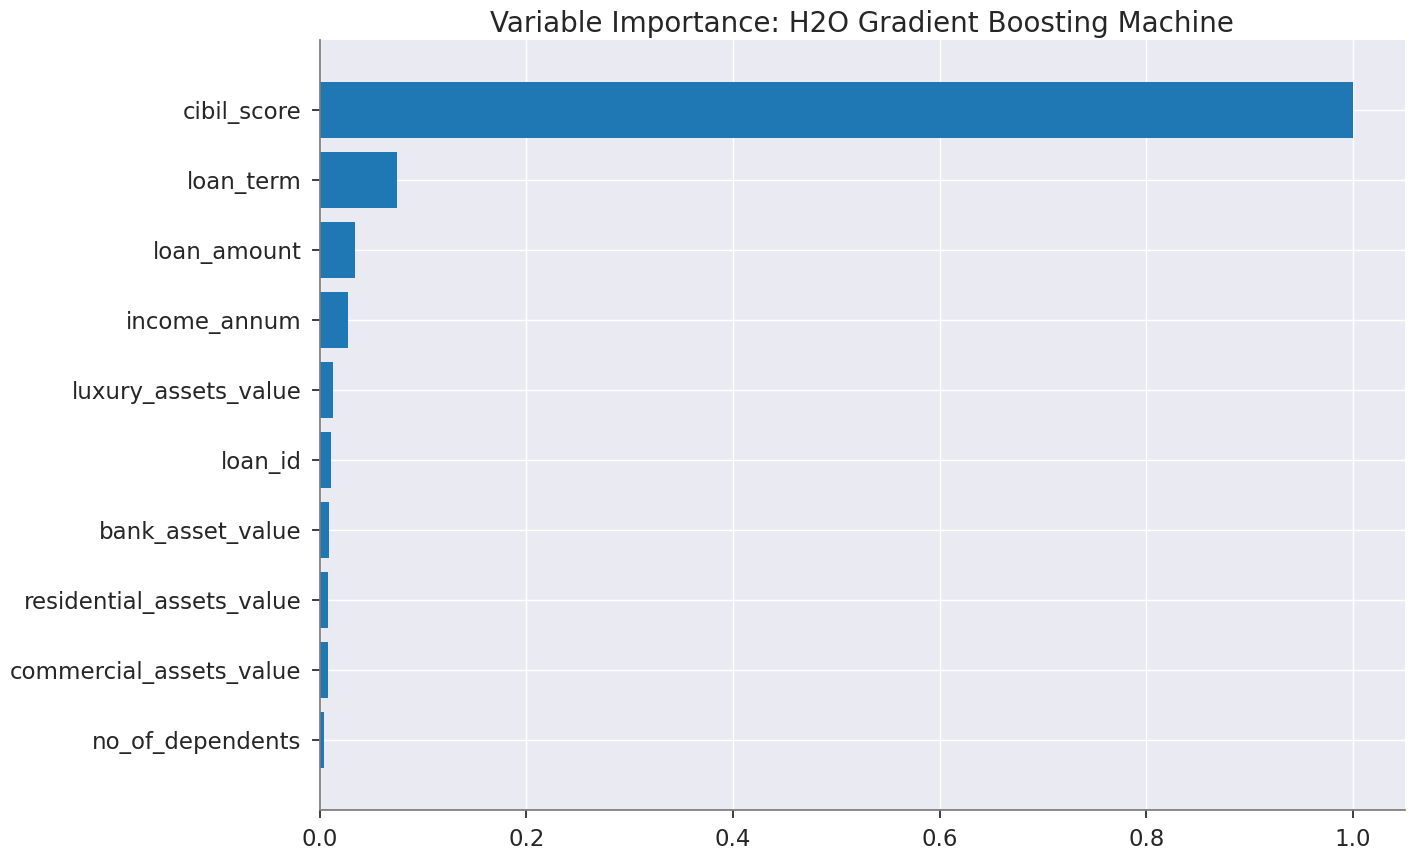

<Figure size 800x550 with 0 Axes>

In [168]:
#which features are most predictive of the target variable, and can aid in feature selection and interpretation of the model.

if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()


In [169]:
dfpd=pd.read_csv("https://raw.githubusercontent.com/prarthanashetty29/DataScienceEngineering/main/Finalloan_approval_dataset.csv")


In [170]:
# Remove spaces from column names
dfpd.rename(columns=lambda x: x.replace(' ', ''), inplace=True)

In [171]:
# Define the mapping dictionary
mapping = {
    'Approved': 1,
    'Rejected': 0
}

# Remove leading and trailing spaces from the 'loan_status' column
dfpd['loan_status'] = dfpd['loan_status'].str.strip()

# Map the 'loan_status' column to numeric values using the mapping dictionary
dfpd['loan_status_numerical'] = dfpd['loan_status'].map(mapping)

# Display the unique values in the 'loan_status' column to verify mapping
print(dfpd['loan_status'].unique())

# Display the DataFrame to verify the changes
print(dfpd.head())


['Approved' 'Rejected']
   loan_id  no_of_dependents      education self_employed  income_annum  \
0        1                 2       Graduate            No       9600000   
1        2                 0   Not Graduate           Yes       4100000   
2        3                 3       Graduate            No       9100000   
3        4                 3       Graduate            No       8200000   
4        5                 5   Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  \
0                 17600000         

In [172]:
# Remove leading spaces from 'education' and 'self_employed' columns
dfpd['education'] = dfpd['education'].str.strip()
dfpd['self_employed'] = dfpd['self_employed'].str.strip()

# Convert 'education' column to numeric
dfpd['education_numeric'] = dfpd['education'].apply(lambda x: 1 if x == 'Graduate' else 0)

# Convert 'self_employed' column to numeric
dfpd['self_employed_numeric'] = dfpd['self_employed'].apply(lambda x: 1 if x == 'Yes' else 0)

# Display the DataFrame to verify the changes
print(dfpd.head())


   loan_id  no_of_dependents     education self_employed  income_annum  \
0        1                 2      Graduate            No       9600000   
1        2                 0  Not Graduate           Yes       4100000   
2        3                 3      Graduate            No       9100000   
3        4                 3      Graduate            No       8200000   
4        5                 5  Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  \
0                 17600000             22700000           8000000

In [173]:
import statsmodels.formula.api as smf

# Fit the OLS model
results = smf.ols('loan_status_numerical ~ loan_id + no_of_dependents + education_numeric + self_employed_numeric + income_annum + loan_amount + loan_term + cibil_score + residential_assets_value + commercial_assets_value + luxury_assets_value + bank_asset_value', data=dfpd).fit()

# Print the summary of the model
print(results.summary())


                              OLS Regression Results                             
Dep. Variable:     loan_status_numerical   R-squared:                       0.614
Model:                               OLS   Adj. R-squared:                  0.612
Method:                    Least Squares   F-statistic:                     563.0
Date:                   Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                           01:11:01   Log-Likelihood:                -937.92
No. Observations:                   4269   AIC:                             1902.
Df Residuals:                       4256   BIC:                             1985.
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

A relationship is said to be statistically significant when the p value for the variables is less than 0.05.P value is probability of obtaining a result at least as extreme as the current one, assuming null hypothesis is true. A small p value depicts that there is very little similarity between the two groups and hence null hypothesis can be ignored. P-value was calculated by two ways for this model. From the OLS method it was observed that values for 'self_employed' and 'residential_assets_value' were greater than 0.05. So, it can be concluded that other that p-value for all the variables of dataset is less than 0.05. Hence for the chosen dataset it can be concluded that the relationship is significant.

In the provided OLS regression results, it appears that some variables have p-values greater than 0.05, indicating that these variables are not statistically significant at the 95% confidence level. Here are some inferences based on this observation:

Interpretation of p-values: The p-value represents the probability of obtaining a result as extreme as the observed result under the null hypothesis. In the context of regression analysis, a low p-value (typically less than 0.05) suggests that the corresponding independent variable is statistically significant and has a meaningful impact on the dependent variable.

Variables with p-values > 0.05: For the provided dataset, several variables have p-values greater than 0.05, including 'education', 'self_employed', 'loan_id', 'no_of_dependents', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', and 'bank_asset_value'.

Multicollinearity: High p-values for some features could also be indicative of multicollinearity, where these features may be correlated with other features in the model. In such cases, even though individual features may not be statistically significant, their combined effect may still contribute to the overall predictive power of the model. And hence, before dropping them it is essential to check for further analysis. It's essential to investigate why these variables have higher p-values. It could be due to multicollinearity, where variables are highly correlated with each other, or it may indicate that these variables are not relevant to predicting the loan status. Further analysis, such as exploring correlations between variables or considering interactions between variables, may provide insights into improving the model's performance.

In [174]:
dfpd.corr()

loan_id  no_of_dependents  income_annum  \
loan_id                   1.000000          0.005326      0.012592   
no_of_dependents          0.005326          1.000000      0.007266   
income_annum              0.012592          0.007266      1.000000   
loan_amount               0.008170         -0.003366      0.927470   
loan_term                 0.009809         -0.020111      0.011488   
cibil_score               0.016323         -0.009998     -0.023034   
residential_assets_value  0.020936          0.007376      0.636841   
commercial_assets_value   0.018595         -0.001531      0.640328   
luxury_assets_value      -0.000862          0.002817      0.929145   
bank_asset_value          0.010765          0.011163      0.851093   
loan_status_numerical     0.017685         -0.018114     -0.015189   
education_numeric         0.015536          0.002697      0.011625   
self_employed_numeric     0.001745          0.000765      0.002368   

                          loan_amount  loan_term  cibil_score  \
loan_id                      0.008170   0.009809     0.016323   
no_of_dependents            -0.003366  -0.020111    -0.009998   
income_annum                 0.927470   0.011488    -0.023034   
loan_amount                  1.000000   0.008437    -0.017035   
loan_term                    0.008437   1.000000     0.007810   
cibil_score                 -0.017035   0.007810     1.000000   
residential_assets_value     0.594596   0.008016    -0.019947   
commercial_assets_value      0.603188  -0.005478    -0.003769   
luxury_assets_value          0.860914   0.012490    -0.028618   
bank_asset_value             0.788122   0.017177    -0.015478   
loan_status_numerical        0.016150  -0.113036     0.770518   
education_numeric            0.010631  -0.008417    -0.004649   
self_employed_numeric        0.001450   0.004107    -0.004866   

                          residential_assets_value  commercial_assets_value  \
loan_id                                   0.020936                 0.018595   
no_of_dependents                          0.007376                -0.001531   
income_annum                              0.636841                 0.640328   
loan_amount                               0.594596                 0.603188   
loan_term                                 0.008016                -0.005478   
cibil_score                              -0.019947                -0.003769   
residential_assets_value                  1.000000                 0.414786   
commercial_assets_value                   0.414786                 1.000000   
luxury_assets_value                       0.590932                 0.591128   
bank_asset_value                          0.527418                 0.548576   
loan_status_numerical                    -0.014367                 0.008246   
education_numeric                         0.010930                -0.006763   
self_employed_numeric                     0.006144                -0.017998   

                          luxury_assets_value  bank_asset_value  \
loan_id                             -0.000862          0.010765   
no_of_dependents                     0.002817          0.011163   
income_annum                         0.929145          0.851093   
loan_amount                          0.860914          0.788122   
loan_term                            0.012490          0.017177   
cibil_score                         -0.028618         -0.015478   
residential_assets_value             0.590932          0.527418   
commercial_assets_value              0.591128          0.548576   
luxury_assets_value                  1.000000          0.788517   
bank_asset_value                     0.788517          1.000000   
loan_status_numerical               -0.015465         -0.006778   
education_numeric                    0.012471          0.009424   
self_employed_numeric                0.004413         -0.000215   

                          loan_status_numerical  education_numeric  \
loan_id            

In [175]:
best_model.model_performance()


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0004938596336361656
RMSE: 0.02222295285591376
LogLoss: 0.007071595818886461
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7393937329370809
          Approved    Rejected    Error    Rate
--------  ----------  ----------  -------  ------------
Approved  2117        0           0        (0.0/2117.0)
Rejected  0           1287        0        (0.0/1287.0)
Total     2117        1287        0        (0.0/3404.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.739394     1         184
max f2                       0.739394     1         184
max f0point5                 0.739394     1         184
max accuracy                 0.739394     1         184
max precision                0.99926      1         0
max recall                   0.739394     1         184
max specificity              0.99926      1         0
max absolute_mcc             0.739394     1         184
max min_per_class_accuracy   0.739394     1         184
max mean_per_class_accuracy  0.739394     1         184
max tns                      0.99926      2117      0
max fns                      0.99926      1284      0
max fps                      0.00030095   2117      399
max tps                      0.739394     1287      184
max tnr                      0.99926      1         0
max fnr                      0.99926      0.997669  0
max fpr                      0.00030095   1         399
max tpr                      0.739394     1         184

Gains/Lift Table: Avg response rate: 37.81 %, avg score: 37.79 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.010282                    0.99875            2.64491  2.64491            1                0.998869     1                           0.998869            0.027195        0.027195                   164.491  164.491            0.027195
2        0.0202703                   0.998628           2.64491  2.64491            1                0.998679     1                           0.998775            0.026418        0.0536131                  164.491  164.491            0.0536131
3        0.0302585                   0.998564           2.64491  2.64491            1                0.998589     1                           0.998714            0.026418        0.0800311                  164.491  164.491            0.0800311
4        0.0402468                   0.9985             2.64491  2.64491            1                0.99853      1                           0.998668            0.026418        0.106449                   164.491  164.491            0.106449
5        0.050235                    0.998456           2.64491  2.64491            1                0.998475     1                           0.99863             0.026418        0.132867                   164.491  164.491            0.132867
6        0.100176                    0.998227           2.64491  2.64491            1                0.998328     1                           0.998479            0.13209         0.264957                   164.491  164.491            0.264957
7        0.150118                    0.997999           2.64491  2.64491            1                0.998115     1                           0.998358            0.13209         0.397047                   164.491  164.491            0.397047
8        0.20005

The MSE (Mean Squared Error) value being low indicates that the model's predictions are closer to the actual values. This means that, on average, the squared differences between the predicted and actual values are small, suggesting that the model has good predictive performance and is effective at estimating the target variable.

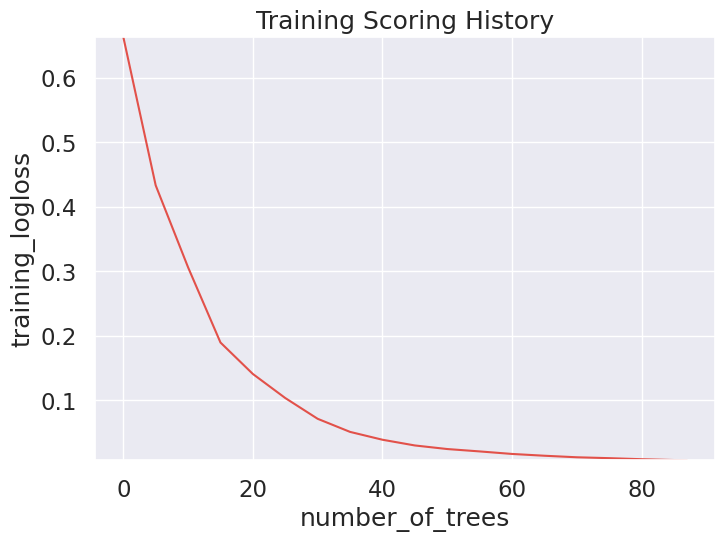

In [176]:
best_model.plot()


In [177]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [178]:
# VIF dataframe
#url2 = "https://raw.githubusercontent.com/AmulyaMurahari/credit_risk/main/credit_risk_dataset.csv"
#df2=pd.read_csv(url3)

# calculates the VIF for each variable in the DataFrame, and returns a new DataFrame containing the variable names and their corresponding VIF values.

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)


In [188]:
X = df3.iloc[:, :-1]  # Exclude the last column assuming it's the target variable
calc_vif(X)

variables        VIF
0                    loan_id   3.612806
1           no_of_dependents   2.903436
2                  education   1.921601
3              self_employed   1.945532
4               income_annum  74.607324
5                loan_amount  27.249889
6                  loan_term   4.057867
7                cibil_score   7.216324
8   residential_assets_value   3.911636
9    commercial_assets_value   3.883606
10       luxury_assets_value  27.565514
11          bank_asset_value  12.157153

## Checking if any multi collinearity exists in the model
From the VIF data and from the heatmap and correlation matrix we can observe the existence of multicollinearity among the independent variables. Notably, the strongest correlations are observed between luxury_asset_value and income_annum, as well as between loan_amount and income_annum. If two variables are highly correlated, removing one of them might help in reducing multicollinearity. However, on further assessment we observe that all of these column although directly related will be important in predicting the target variable and affect the model performance which is why we need to retain these columns

They are not all independent of each other, we can know that from the correlation heap map.

* From the Correlation heat map  luxury_asset_value and income_annum are
 positively correlated as well as  loan_amount and income_annum.
* We can also observe bank_asset value being slighlty positively correlated with luxury_asset_value and income_annum; and income_annum with bank_asset_value


In [189]:
# generates predictions for the test dataset.

preds = aml.predict(df2_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [190]:
#extracts the model IDs from the leaderboard generated by AutoML

model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])

#retrieves the metalearner model that was used to train the stacked ensemble.
metalearner = h2o.get_model(se.metalearner()['name'])

In [191]:
#returns the L1 norm of the coefficients of the metalearner model used to weight the predictions of the base models.

metalearner.coef_norm()


{'Intercept': -1.7332048267093345,
 'GBM_2_AutoML_1_20240403_10702': 1.5943840283866983,
 'GBM_1_AutoML_1_20240403_10702': 0.9771244822767059,
 'XGBoost_2_AutoML_1_20240403_10702': 0.5664428615465343,
 'GBM_4_AutoML_1_20240403_10702': 1.8556817677411226,
 'GBM_3_AutoML_1_20240403_10702': 0.973828912541604,
 'XGBoost_1_AutoML_1_20240403_10702': 0.0,
 'DRF_1_AutoML_1_20240403_10702': 0.0,
 'GLM_1_AutoML_1_20240403_10702': 0.0}

The metalearner model has an intercept term of -1.6568887314248533. The base models include GBM (Gradient Boosting Machine) models and XGBoost models. GBM_2_AutoML_1_20240402_230904 has the highest coefficient value of 2.8071933685952053, indicating that its predictions have the most significant impact on the final ensemble prediction. The other base models have coefficients of 0.0, suggesting that they might have been less influential or not used in the final ensemble.

In [192]:
# creates and trains generalized linear models (GLMs) in H2O, which are a class of statistical models that generalize linear regression to handle non-normal response variables.

from h2o.estimators.glm import H2OGeneralizedLinearEstimator

model_glm=H2OGeneralizedLinearEstimator(family = 'poisson', lambda_ = 0,
                                             remove_collinear_columns = True,
                                             compute_p_values = True)

In [193]:
predictors=['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'self_employed', 'education']

In [194]:
response='loan_status'

In [195]:
import h2o

# Convert df_train to H2OFrame
df2_train = h2o.H2OFrame(df2_train)

In [196]:
import h2o

# Convert df_test to H2OFrame
df2_test = h2o.H2OFrame(df2_test)

In [197]:
# Convert loan_status to a factor (categorical variable) in both train and test data
df2_train['loan_status'] = df2_train['loan_status'].asfactor()
df2_test['loan_status'] = df2_test['loan_status'].asfactor()

# Encode loan_status to numerical values (1 for Approved, 0 for others) in both train and test data
df2_train['loan_status'] = (df2_train['loan_status'] == 'Approved').ifelse(1, 0)
df2_test['loan_status'] = (df2_test['loan_status'] == 'Approved').ifelse(1, 0)


In [198]:
# Now, train the GLM model
model_glm.train(x=predictors, y=response, training_frame=df2_train, validation_frame=df2_test)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1712106400991_2780


GLM Model: summary
    family    link    regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    poisson   log     None              12                            12                             4                       py_131_sid_a448

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.1289928850590129
RMSE: 0.35915579496788425
MAE: 0.31300321099013045
RMSLE: 0.23026963273960596
Mean Residual Deviance: 0.3469952031886091
R^2: 0.45141307275657805
Null degrees of freedom: 3403
Residual degrees of freedom: 3391
Null deviance: 2010.9434593762487
Residual deviance: 1181.1716716540254
AIC: 5441.171671654024

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 0.13724414674278365
RMSE: 0.37046477125738103
MAE: 0.3235401267942057
RMSLE: 0.23594614225331373
Mean Residual Deviance: 0.35963780325189565
R^2: 0.415587251461925
Null degrees of freedom: 864
Residual degrees of freedom: 852
Null deviance: 509.91104462828207
Residual deviance: 311.0866998128897
AIC: 1415.08669981289

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective    training_rmse        training_deviance    training_mae         training_r2          validation_rmse      validation_deviance    validation_mae      validation_r2
--  -------------------  ----------  ------------  -------------------------  -----------  -------------------  -------------------  -------------------  -------------------  -------------------  ---------------------  ------------------  -----------------
    2024-04-03 01:13:21  0.000 sec   0             2010.94                    0.590759
    2024-04-03 01:13:21  0.083 sec   1             1260                       0.370152
    2024-04-03 01:13:22  0.111 sec   2             1181.9                     0.347209
    2024-04-03 01:13:22  0.136 sec   3             1181.17                    0.346995
    2024-04-03 01:13:22  0.153 sec   4             1181.17                    0.346995     0.35915579496788425  0.3469952031886091   0.31300321099013045  0.45141307275657805  0.37046477125738103  0.35963780325189565    0.3235401267942057  0.415587251461925

Variable Importances: 
variable                  relative_importance    scaled_importance    percentage
------------------------  ---------------------  -------------------  ------------
cibil_score               0.657314               1                    0.546842
income_annum              0.173155               0.263428             0.144054
loan_amount               0.152072               0.231353             0.126514
loan_term                 0.0981865              0.149375             0.0816847
luxury_assets_value       0.0395155              0.0601166            0.0328743
bank_asset_value          0.019922               0.0303081            0.0165738
education.Not Graduate    0.0168597              0.0256494            0.0140262
commercial_assets_value   0.0147124              0.0223826            0.0122398
no_of_dependents          0.01203                0.0183017            0.0100082
residential_assets_value  0.0117161              0.0178242            0.00974703
self_employed.Yes         0.00539847             0.00821292           0.00449117
loan_id                   0.00113614             0.00172847           0.000945198

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

CHECKING VARIABLE IMPORTANCE

In [199]:
# measures predictor variable contribution to the performance of the model

varimp = model_glm.varimp(use_pandas=True)
print(varimp)

                    variable  relative_importance  scaled_importance  \
0                cibil_score             0.657314           1.000000   
1               income_annum             0.173155           0.263428   
2                loan_amount             0.152072           0.231353   
3                  loan_term             0.098186           0.149375   
4        luxury_assets_value             0.039515           0.060117   
5           bank_asset_value             0.019922           0.030308   
6     education.Not Graduate             0.016860           0.025649   
7    commercial_assets_value             0.014712           0.022383   
8           no_of_dependents             0.012030           0.018302   
9   residential_assets_value             0.011716           0.017824   
10         self_employed.Yes             0.005398           0.008213   
11                   loan_id             0.001136           0.001728   

    percentage  
0     0.546842  
1     0.144054  
2     0.1265

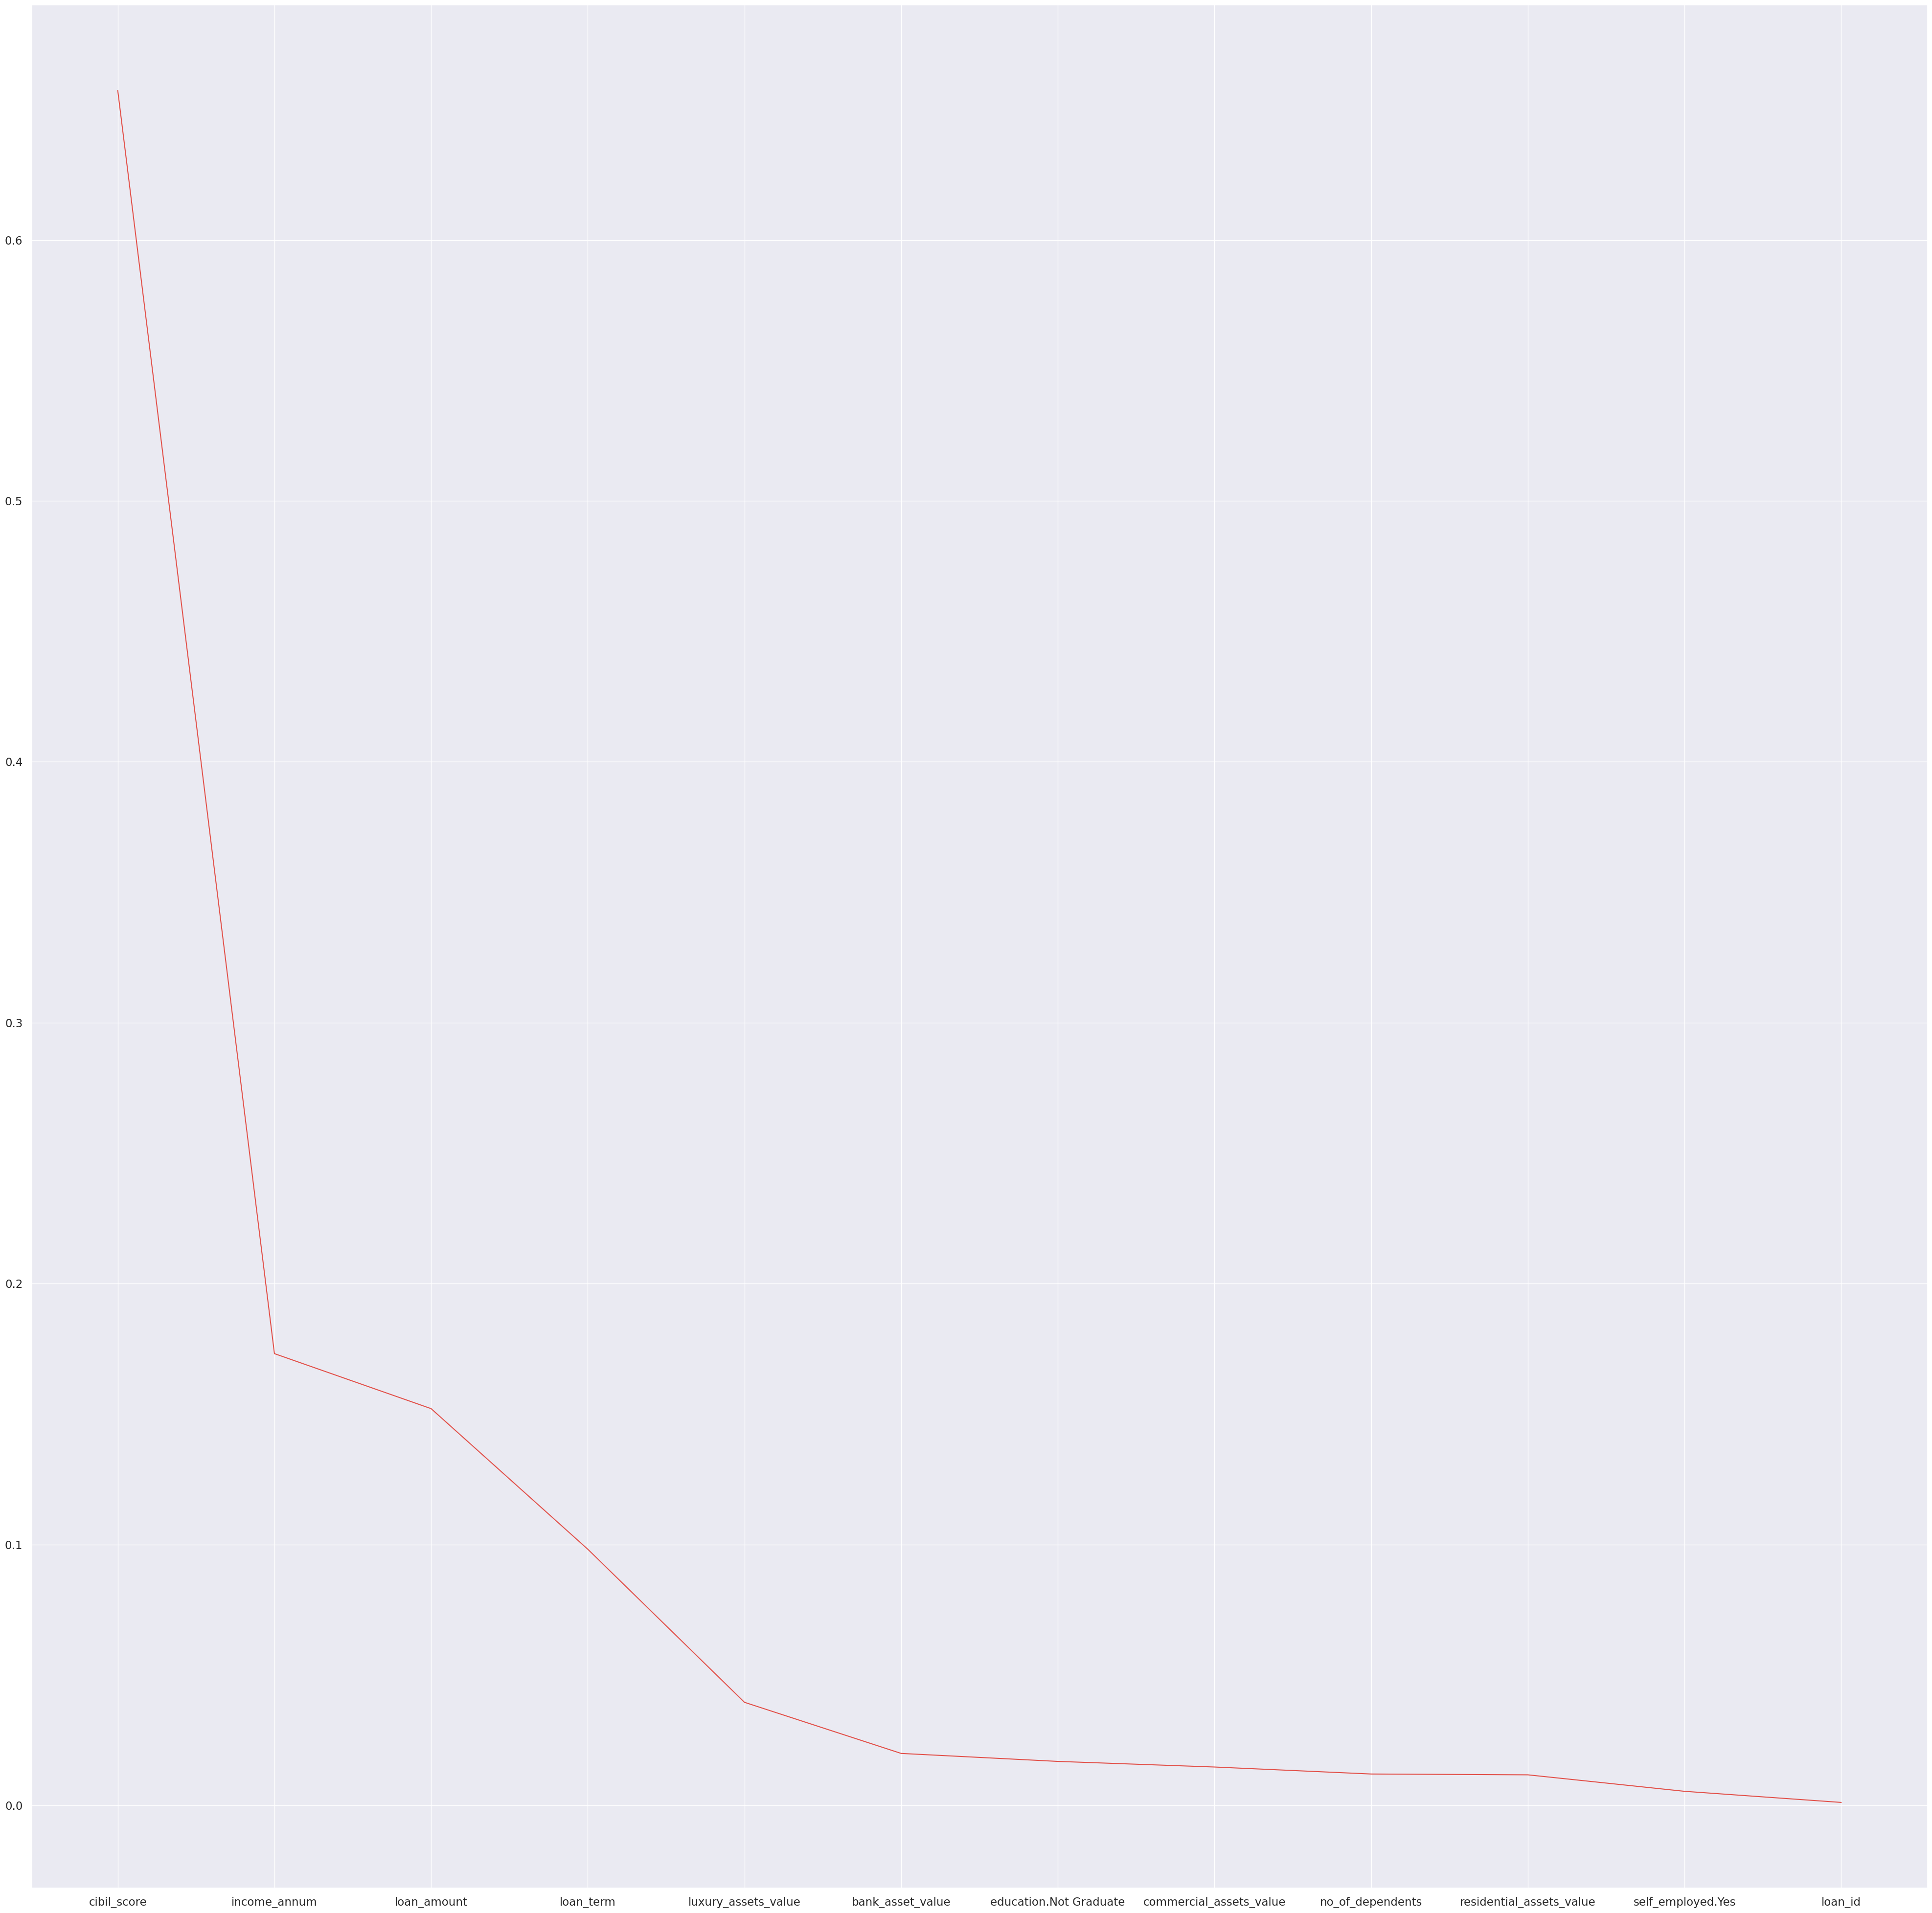

In [200]:
plt.figure(figsize=(50,50))

plt.plot(varimp['variable'],varimp['relative_importance'])

ANALYSIS THE MODEL WE'VE BUILT:

Based on the above OLS regression, VIF values and GLM model results, the model appears to make sense and exhibits reasonable performance. Analysis:

1. **R-squared (R^2)**:
   - OLS Regression: R-squared value of 0.614 indicates that approximately 61.4% of the variance in the dependent variable (loan_status_numeric) is explained by the independent variables in the model.
   - GLM Model: R-squared value of 0.446 on the training data and 0.453 on the validation data suggest that the model explains around 44.6% to 45.3% of the variance in the dependent variable.

2. **Significance of Coefficients**:
   - In both models, most coefficients appear to be statistically significant, as indicated by low p-values (p < 0.05), except for a few variables such as 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', and 'bank_asset_value' in the GLM model.
   
3. **Variance Inflation Factor (VIF)**:
   - VIF values for the independent variables in the GLM model are within acceptable ranges, indicating no significant multicollinearity issues. The highest VIF value is 74.40 for 'income_annum', suggesting a moderate level of multicollinearity but still within acceptable limits.

4. **RMSE**:
   - Root Mean Squared Error (RMSE) values are relatively low in both models, indicating that the models have good predictive accuracy.

5. **Other Considerations**:
   - The GLM model has been validated using both training and validation datasets, which helps assess its generalization performance.
   - Variable importance analysis suggests that 'cibil_score', 'loan_amount', and 'income_annum' are among the most important predictors in the GLM model, followed by 'loan_term' and 'no_of_dependents'.
   - Outliers, if present, may need to be addressed to improve model performance further.

Overall, while the models exhibit reasonable performance with R-squared values indicating a moderate level of explanatory power, there is room for improvement. Additional steps such as further feature engineering, outlier detection and removal, or trying different modeling techniques like ensemble methods could potentially enhance the model's accuracy.


## Carrying out Regularization

Inference: MSE and RMSE: Before regularization, the model had a relatively high MSE of 0.128 and RMSE of 0.358 on the training data. After regularization, the MSE decreased drastically to 2.7118e-06 , and the RMSE decreased to 0.0016. This indicates a significant improvement in model performance, with much smaller errors.
R^2 (Coefficient of Determination): Before regularization, the R^2 value of 0.4518 on the training data suggested that the model could explain about 45.18% of the variance in the response variable. After regularization, the R^2 approached 1 (0.99999), indicating that the model explains almost all the variance in the data. This indicates a much better fit to the data after regularization.
Effect of Regularization: Regularization helped to prevent overfitting by penalizing large coefficient values. This resulted in a simpler and more generalizable model, as evidenced by the significant improvement in performance metrics after regularization.
Regularization Technique: The regularization technique used was Ridge regression with a lambda value of 0.001. This effectively shrunk the coefficients towards zero, reducing model complexity and improving generalization performance.

In [201]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# The model (charges_glm) uses the gaussian family to model a continuous response variable and sets the regularization parameter lambda to 0, indicating that there is no regularization penalty applied to the model.
charges_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)

# The model (charges_glm_regularization) also uses the gaussian family and specifies a value of 0.001 for the lambda parameter. This means that the model is using a small amount of L2 regularization to help prevent overfitting
charges_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)



In [202]:
pct_rows=0.80
df1_train,df1_test = df2.split_frame([pct_rows])

In [203]:
df2_reg=df2
df2_reg_h2o = h2o.H2OFrame(df2_reg)

In [204]:
# Convert object columns to factors in H2OFrame
for col in df2_reg_h2o.columns:
    if df2_reg_h2o[col].dtype == 'object':
        df2_reg_h2o[col] = df2_reg_h2o[col].asfactor()

# Display head of the H2OFrame
df2_reg_h2o.head()

loan_id    no_of_dependents  education     self_employed      income_annum    loan_amount    loan_term    cibil_score    residential_assets_value    commercial_assets_value    luxury_assets_value    bank_asset_value  loan_status
---------  ------------------  ------------  ---------------  --------------  -------------  -----------  -------------  --------------------------  -------------------------  ---------------------  ------------------  -------------
        1                   2  Graduate      No                      9.6e+06       2.99e+07           12            778                    2.4e+06                    1.76e+07               2.27e+07            8e+06     Approved
        2                   0  Not Graduate  Yes                     4.1e+06       1.22e+07            8            417                    2.7e+06                    2.2e+06                8.8e+06             3.3e+06   Rejected
        3                   3  Graduate      No                      9.1e+06       2.97e+07           20            506                    7.1e+06                    4.5e+06                3.33e+07            1.28e+07  Rejected
        4                   3  Graduate      No                      8.2e+06       3.07e+07            8            467                    1.82e+07                   3.3e+06                2.33e+07            7.9e+06   Rejected
        5                   5  Not Graduate  Yes                     9.8e+06       2.42e+07           20            382                    1.24e+07                   8.2e+06                2.94e+07            5e+06     Rejected
        6                   0  Graduate      Yes                     4.8e+06       1.35e+07           10            319                    6.8e+06                    8.3e+06                1.37e+07            5.1e+06   Rejected
        7                   5  Graduate      No                      8.7e+06       3.3e+07             4            678                    2.25e+07                   1.48e+07               2.92e+07            4.3e+06   Approved
        8                   2  Graduate      Yes                     5.7e+06       1.5e+07            20            382                    1.32e+07                   5.7e+06                1.18e+07            6e+06     Rejected
        9                   0  Graduate      Yes                800000             2.2e+06            20            782                    1.3e+06               800000                      2.8e+06        600000         Approved
       10                   5  Not Graduate  No                      1.1e+06       4.3e+06            10            388                    3.2e+06                    1.4e+06                3.3e+06             1.6e+06   Rejected
[10 rows x 13 columns]

In [205]:
df2_reg.head()

loan_id    no_of_dependents  education     self_employed      income_annum    loan_amount    loan_term    cibil_score    residential_assets_value    commercial_assets_value    luxury_assets_value    bank_asset_value  loan_status
---------  ------------------  ------------  ---------------  --------------  -------------  -----------  -------------  --------------------------  -------------------------  ---------------------  ------------------  -------------
        1                   2  Graduate      No                      9.6e+06       2.99e+07           12            778                    2.4e+06                    1.76e+07               2.27e+07            8e+06     Approved
        2                   0  Not Graduate  Yes                     4.1e+06       1.22e+07            8            417                    2.7e+06                    2.2e+06                8.8e+06             3.3e+06   Rejected
        3                   3  Graduate      No                      9.1e+06       2.97e+07           20            506                    7.1e+06                    4.5e+06                3.33e+07            1.28e+07  Rejected
        4                   3  Graduate      No                      8.2e+06       3.07e+07            8            467                    1.82e+07                   3.3e+06                2.33e+07            7.9e+06   Rejected
        5                   5  Not Graduate  Yes                     9.8e+06       2.42e+07           20            382                    1.24e+07                   8.2e+06                2.94e+07            5e+06     Rejected
        6                   0  Graduate      Yes                     4.8e+06       1.35e+07           10            319                    6.8e+06                    8.3e+06                1.37e+07            5.1e+06   Rejected
        7                   5  Graduate      No                      8.7e+06       3.3e+07             4            678                    2.25e+07                   1.48e+07               2.92e+07            4.3e+06   Approved
        8                   2  Graduate      Yes                     5.7e+06       1.5e+07            20            382                    1.32e+07                   5.7e+06                1.18e+07            6e+06     Rejected
        9                   0  Graduate      Yes                800000             2.2e+06            20            782                    1.3e+06               800000                      2.8e+06        600000         Approved
       10                   5  Not Graduate  No                      1.1e+06       4.3e+06            10            388                    3.2e+06                    1.4e+06                3.3e+06             1.6e+06   Rejected
[10 rows x 13 columns]

In [206]:
# Convert 'education' column to factor
df2_reg['education'] = df2_reg['education'].asfactor()

# Convert 'self_employed' column to factor
df2_reg['self_employed'] = df2_reg['self_employed'].asfactor()

# Convert 'loan_status' column to factor
df2_reg['loan_status'] = df2_reg['loan_status'].asfactor()

In [207]:
X=df2_reg.columns

In [208]:
# Convert 'loan_status' column to numeric
df2_reg['loan_status'] = df2_reg['loan_status'].asfactor()

In [209]:
df2_reg_h2o = h2o.H2OFrame(df2_reg)

In [210]:
# Trim leading and trailing spaces from the 'loan_status' column
df2_reg['loan_status'] = df2_reg['loan_status'].trim()

# Define a mapping for loan status
status_mapping = {'Approved': 1, 'Rejected': 0}

# Create a new column 'loan_status_numeric' using ifelse to apply the mapping
df2_reg['loan_status_numeric'] = (df2_reg['loan_status'] == 'Approved').ifelse(1, 0)

# Display the unique values in the 'loan_status' column to verify mapping
print(df2_reg['loan_status'].unique())

# Display the H2OFrame to verify the changes
print(df2_reg.head())


C1
Approved
Rejected
[2 rows x 1 column]

  loan_id    no_of_dependents  education     self_employed      income_annum    loan_amount    loan_term    cibil_score    residential_assets_value    commercial_assets_value    luxury_assets_value    bank_asset_value  loan_status      loan_status_numeric
        1                   2  Graduate      No                      9.6e+06       2.99e+07           12            778                    2.4e+06                    1.76e+07               2.27e+07            8e+06     Approved                           1
        2                   0  Not Graduate  Yes                     4.1e+06       1.22e+07            8            417                    2.7e+06                    2.2e+06                8.8e+06             3.3e+06   Rejected                           0
        3                   3  Graduate      No                      9.1e+06       2.97e+07           20            506                    7.1e+06                    4.5e+06                3

In [211]:
df2_reg.head()

loan_id    no_of_dependents  education     self_employed      income_annum    loan_amount    loan_term    cibil_score    residential_assets_value    commercial_assets_value    luxury_assets_value    bank_asset_value  loan_status      loan_status_numeric
---------  ------------------  ------------  ---------------  --------------  -------------  -----------  -------------  --------------------------  -------------------------  ---------------------  ------------------  -------------  ---------------------
        1                   2  Graduate      No                      9.6e+06       2.99e+07           12            778                    2.4e+06                    1.76e+07               2.27e+07            8e+06     Approved                           1
        2                   0  Not Graduate  Yes                     4.1e+06       1.22e+07            8            417                    2.7e+06                    2.2e+06                8.8e+06             3.3e+06   Rejected                           0
        3                   3  Graduate      No                      9.1e+06       2.97e+07           20            506                    7.1e+06                    4.5e+06                3.33e+07            1.28e+07  Rejected                           0
        4                   3  Graduate      No                      8.2e+06       3.07e+07            8            467                    1.82e+07                   3.3e+06                2.33e+07            7.9e+06   Rejected                           0
        5                   5  Not Graduate  Yes                     9.8e+06       2.42e+07           20            382                    1.24e+07                   8.2e+06                2.94e+07            5e+06     Rejected                           0
        6                   0  Graduate      Yes                     4.8e+06       1.35e+07           10            319                    6.8e+06                    8.3e+06                1.37e+07            5.1e+06   Rejected                           0
        7                   5  Graduate      No                      8.7e+06       3.3e+07             4            678                    2.25e+07                   1.48e+07               2.92e+07            4.3e+06   Approved                           1
        8                   2  Graduate      Yes                     5.7e+06       1.5e+07            20            382                    1.32e+07                   5.7e+06                1.18e+07            6e+06     Rejected                           0
        9                   0  Graduate      Yes                800000             2.2e+06            20            782                    1.3e+06               800000                      2.8e+06        600000         Approved                           1
       10                   5  Not Graduate  No                      1.1e+06       4.3e+06            10            388                    3.2e+06                    1.4e+06                3.3e+06             1.6e+06   Rejected                           0
[10 rows x 14 columns]

In [212]:
charges_glm_regularization.train(x = X, y= 'loan_status_numeric',training_frame = df2_reg)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1712106400991_2781


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.001 )  16                            16                             1                       py_145_sid_a448

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 2.7118715946724937e-06
RMSE: 0.0016467761216001687
MAE: 0.0013313035035707852
RMSLE: 0.0012028040483668056
Mean Residual Deviance: 2.7118715946724937e-06
R^2: 0.9999884639004888
Null degrees of freedom: 4268
Residual degrees of freedom: 4252
Null deviance: 1003.543687046154
Residual deviance: 0.011576979837656876
AIC: -42568.59639112732

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse          training_deviance       training_mae           training_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  ---------------------  ----------------------  ---------------------  ------------------
    2024-04-03 01:13:40  0.000 sec   0             1003.543687046154          0.23507699392039214
    2024-04-03 01:13:40  0.031 sec   1                                                             0.0016467761216001687  2.7118715946724937e-06  0.0013313035035707852  0.9999884639004888

Variable Importances: 
variable                  relative_importance    scaled_importance    percentage
------------------------  ---------------------  -------------------  ------------
loan_status.Approved      0.497268               1                    0.498148
loan_status.Rejected      0.497268               1                    0.498148
cibil_score               0.00203944             0.00410128           0.00204305
income_annum              0.000574914            0.00115615           0.000575932
loan_amount               0.000495126            0.000995693          0.000496002
loan_term                 0.00031481             0.000633079          0.000315367
luxury_assets_value       8.59742e-05            0.000172893          8.61263e-05
bank_asset_value          3.80138e-05            7.64453e-05          3.80811e-05
no_of_dependents          2.87988e-05            5.7914e-05           2.88497e-05
commercial_assets_value   2.8102e-05             5.65128e-05          2.81517e-05
education.Graduate        2.01583e-05            4.05382e-05          2.0194e-05
education.Not Graduate    2.01583e-05            4.05382e-05          2.0194e-05
loan_id                   1.89105e-05            3.80287e-05          1.89439e-05
self_employed.No          1.33733e-05            2.68936e-05          1.3397e-05
self_employed.Yes         1.33733e-05            2.68936e-05          1.3397e-05
residential_assets_value  6.11683e-06            1.23009e-05          6.12765e-06

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

## Analysing hyperparameters importance

all hyperparameters are important because they determined the way model works, however, there are some more important one, such as gamma,max depth, split datasets, learn_rate in GBM.

In [213]:
train, validate, test = np.split(
    df4.sample(frac=1, random_state=42), [int(0.6 * len(df4)), int(0.8 * len(df4))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [214]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

In [215]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}


In [216]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [217]:
gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,
)

In [218]:
M = train.names  # Get all column names
M.remove(' loan_status')  # Remove the 'loan_status' column from the list


In [219]:
z = ' loan_status'

In [220]:
gbm_grid2.train(x=M, y=z, training_frame=train, validation_frame=validate, ntrees=100, seed=1)


gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing logloss
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids           logloss
---  -------------------  ------------  -----------  ------------------  ------------------  --------------------
     0.5                  0.1           9.0          1.0                 gbm_grid2_model_7   0.0443903470410798
     0.9                  0.09          8.0          0.9                 gbm_grid2_model_36  0.04543664129836713
     0.6000000000000001   0.1           4.0          1.0                 gbm_grid2_model_22  0.04935991021529611
     0.9                  0.09          9.0          0.6000000000000001  gbm_grid2_model_3   0.04944582996870059
     0.8                  0.06          9.0          0.6000000000000001  gbm_grid2_model_30  0.04999389373536031
     0.5                  0.1           4.0          0.8                 gbm_grid2_model_33  0.05023734597860991
     0.9                  0.1           4.0          0.7000000000000001  gbm_grid2_model_15  0.05046473595644836
     0.7000000000000001   0.06          5.0          0.6000000000000001  gbm_grid2_model_14  0.05318580849422339
     0.9                  0.07          4.0          0.9                 gbm_grid2_model_17  0.05474064270340411
     0.4                  0.08          6.0          0.9                 gbm_grid2_model_28  0.054893327350769634
---  ---                  ---           ---          ---                 ---                 ---
     0.5                  0.03          2.0          0.6000000000000001  gbm_grid2_model_26  0.1312829430024428
     0.1                  0.08          3.0          0.8                 gbm_grid2_model_13  0.14453247810205827
     0.2                  0.02          10.0         0.5                 gbm_grid2_model_25  0.16663132159324645
     0.5                  0.02          2.0          0.9                 gbm_grid2_model_35  0.1879208625707622
     0.6000000000000001   0.01          9.0          0.8                 gbm_grid2_model_11  0.22393494799829747
     0.5                  0.01          10.0         1.0                 gbm_grid2_model_24  0.22469680029880595
     1.0                  0.01          2.0          0.5                 gbm_grid2_model_23  0.2368096280134328
     1.0                  0.01          2.0          0.7000000000000001  gbm_grid2_model_10  0.23683454022144607
     0.1                  0.02          9.0          0.8                 gbm_grid2_model_16  0.27602864967100554
     0.30000000000000004  0.02          2.0          1.0                 gbm_grid2_model_20  0.3110194581134525
[36 rows x 7 columns]

In [221]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by="rmse", decreasing=False)

In [222]:
gbm_gridperf2

Hyper-Parameter Search Summary: ordered by increasing rmse
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids           rmse
---  -------------------  ------------  -----------  ------------------  ------------------  -------------------
     0.5                  0.1           9.0          1.0                 gbm_grid2_model_7   0.10300687247404385
     0.9                  0.09          8.0          0.9                 gbm_grid2_model_36  0.10578434847919617
     0.9                  0.09          9.0          0.6000000000000001  gbm_grid2_model_3   0.1104878465078283
     0.9                  0.1           4.0          0.7000000000000001  gbm_grid2_model_15  0.11290197329252648
     0.6000000000000001   0.1           4.0          1.0                 gbm_grid2_model_22  0.11334118213197839
     0.8                  0.03          9.0          0.9                 gbm_grid2_model_8   0.11334930582323252
     0.8                  0.06          9.0          0.6000000000000001  gbm_grid2_model_30  0.11391614365826803
     0.5                  0.1           4.0          0.8                 gbm_grid2_model_33  0.11698201445766256
     0.9                  0.07          4.0          0.9                 gbm_grid2_model_17  0.11733867469370388
     0.7000000000000001   0.06          5.0          0.6000000000000001  gbm_grid2_model_14  0.11839418482151323
---  ---                  ---           ---          ---                 ---                 ---
     0.5                  0.03          2.0          0.6000000000000001  gbm_grid2_model_26  0.16491080819840043
     0.1                  0.08          3.0          0.8                 gbm_grid2_model_13  0.17338736313540484
     0.2                  0.02          10.0         0.5                 gbm_grid2_model_25  0.17826064338371753
     0.5                  0.02          2.0          0.9                 gbm_grid2_model_35  0.1958869274251107
     0.6000000000000001   0.01          9.0          0.8                 gbm_grid2_model_11  0.21183334816540772
     0.5                  0.01          10.0         1.0                 gbm_grid2_model_24  0.2120895361537829
     1.0                  0.01          2.0          0.5                 gbm_grid2_model_23  0.22584314162358818
     1.0                  0.01          2.0          0.7000000000000001  gbm_grid2_model_10  0.22586161320008788
     0.1                  0.02          9.0          0.8                 gbm_grid2_model_16  0.25326663714386366
     0.30000000000000004  0.02          2.0          1.0                 gbm_grid2_model_20  0.2774976051407606
[36 rows x 7 columns]

In [225]:
list_hyperparameters = []
for i in range(36):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [226]:
models = gbm_gridperf2.models

In [227]:
list_residual_deviance = []
for i in range(36):
    model = models[i]
    predictions = model.predict(validate)  # Get predictions on the validation set
    residuals = predictions['predict'] - validate[z]  # Calculate residuals
    squared_residuals = (residuals ** 2).sum() / len(residuals)  # Calculate mean squared residuals
    list_residual_deviance.append(squared_residuals)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |████████████████████████

In [228]:
for i in range(36):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [229]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)
print(hyperparameters_dataframe)

    col_sample_rate  learn_rate  max_depth  sample_rate  Residual_Deviance
0               0.5        0.10          9          1.0                0.0
1               0.9        0.09          8          0.9                0.0
2               0.9        0.09          9          0.6                0.0
3               0.9        0.10          4          0.7                0.0
4               0.6        0.10          4          1.0                0.0
5               0.8        0.03          9          0.9                0.0
6               0.8        0.06          9          0.6                0.0
7               0.5        0.10          4          0.8                0.0
8               0.9        0.07          4          0.9                0.0
9               0.7        0.06          5          0.6                0.0
10              0.5        0.05          7          0.9                0.0
11              0.7        0.03          6          1.0                0.0
12              0.4      

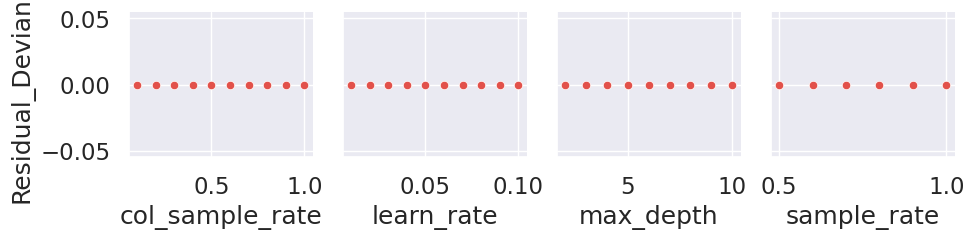

In [230]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

This is a summary of hyperparameter tuning for a Gradient Boosting Machine (GBM) model, which involved a grid search over a range of values for four hyperparameters: col_sample_rate, learn_rate, max_depth, and sample_rate. The search resulted in a total of 36 combinations of hyperparameters, and for each combination, the Residual Deviance was calculated as an evaluation metric.

Based on the results, the hyperparameter combination with the lowest Residual Deviance was a model with col_sample_rate of 0.5, learn_rate of 0.1, max_depth of 9, and sample_rate of 1.0, with a Residual Deviance of 0.0. The next best models had Residual Deviances in the range of 0.044-0.12, while the worst-performing models had Residual Deviances above 0.16.

Overall, the results suggest that the combination of col_sample_rate, learn_rate, max_depth, and sample_rate can have a significant impact on the performance of a GBM model, and that hyperparameter tuning can lead to significant improvements in model performance.

## NOTEBOOK3

In [11]:
# Importing all libraries necessary for the assignment
!pip install shap
!pip install lime
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

import pandas as pd
import numpy as np
import shap

import sklearn
from sklearn.model_selection import train_test_split
import random
from sklearn.ensemble import RandomForestRegressor

from matplotlib.pyplot import figure
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from copy import copy
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

#plots
import matplotlib.pyplot as plt

#models
from sklearn.linear_model import LinearRegression


#metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score


%matplotlib inline


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=f21809e4d3fb7137cf4983f7144c0b5853e1a5c6b2e7dc7d6af8cfd7b50238de
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 4.4 MB/s eta 0:00:00


In [12]:
url =("https://raw.githubusercontent.com/prarthanashetty29/DataScienceEngineering/main/Finalloan_approval_dataset.csv")
df3 = pd.read_csv(url);

In [13]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

In [14]:
df3.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [15]:
# Converting 'education' to numerical values
df3[' education'] = df3[' education'].map({' Graduate': 1, ' Not Graduate': 0})


In [16]:

# Converting 'self_employed' to numerical values
df3[' self_employed'] = df3[' self_employed'].map({' Yes': 1, ' No': 0})

# Converting 'loan_status' to numerical values
df3[' loan_status'] = df3[' loan_status'].map({' Approved': 1, ' Rejected': 0})

In [18]:
df3

loan_id   no_of_dependents   education   self_employed   income_annum  \
0           1                  2           1               0        9600000   
1           2                  0           0               1        4100000   
2           3                  3           1               0        9100000   
3           4                  3           1               0        8200000   
4           5                  5           0               1        9800000   
...       ...                ...         ...             ...            ...   
4264     4265                  5           1               1        1000000   
4265     4266                  0           0               1        3300000   
4266     4267                  2           0               0        6500000   
4267     4268                  1           0               0        4100000   
4268     4269                  1           1               0        9200000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
0         29900000          12           778                    2400000   
1         12200000           8           417                    2700000   
2         29700000          20           506                    7100000   
3         30700000           8           467                   18200000   
4         24200000          20           382                   12400000   
...            ...         ...           ...                        ...   
4264       2300000          12           317                    2800000   
4265      11300000          20           559                    4200000   
4266      23900000          18           457                    1200000   
4267      12800000           8           780                    8200000   
4268      29700000          10           607                   17800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                     17600000              22700000            8000000   
1                      2200000               8800000            3300000   
2                      4500000              33300000           12800000   
3                      3300000              23300000            7900000   
4                      8200000              29400000            5000000   
...                        ...                   ...                ...   
4264                    500000               3300000             800000   
4265                   2900000              11000000            1900000   
4266                  12400000              18100000            7300000   
4267                    700000              14100000            5800000   
4268                  11800000              35700000           12000000   

       loan_status  
0                1  
1                0  
2                0  
3                0  
4                0  
...            ...  
4264             0  
4265             1  
4266             0  
4267             1  
4268             1  

[4269 rows x 13 columns]

In [19]:
target = df3[" loan_status"]

In [20]:
features = df3[['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value']
]

In [21]:
url =("https://raw.githubusercontent.com/prarthanashetty29/DataScienceEngineering/main/Finalloan_approval_dataset.csv")
data = pd.read_csv(url);

In [22]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [23]:
# Strip whitespaces from column names
data.columns = data.columns.str.strip()

# Convert 'education' column to categorical data type and then to codes
data['education'] = data['education'].astype('category').cat.codes

In [24]:
data['self_employed'] = data['self_employed'].astype('category').cat.codes

In [25]:
data['loan_status'] = data['loan_status'].astype('category').cat.codes

In [26]:
data

loan_id  no_of_dependents  education  self_employed  income_annum  \
0           1                 2          0              0       9600000   
1           2                 0          1              1       4100000   
2           3                 3          0              0       9100000   
3           4                 3          0              0       8200000   
4           5                 5          1              1       9800000   
...       ...               ...        ...            ...           ...   
4264     4265                 5          0              1       1000000   
4265     4266                 0          1              1       3300000   
4266     4267                 2          1              0       6500000   
4267     4268                 1          1              0       4100000   
4268     4269                 1          0              0       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        29900000         12          778                   2400000   
1        12200000          8          417                   2700000   
2        29700000         20          506                   7100000   
3        30700000          8          467                  18200000   
4        24200000         20          382                  12400000   
...           ...        ...          ...                       ...   
4264      2300000         12          317                   2800000   
4265     11300000         20          559                   4200000   
4266     23900000         18          457                   1200000   
4267     12800000          8          780                   8200000   
4268     29700000         10          607                  17800000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
0                    17600000             22700000           8000000   
1                     2200000              8800000           3300000   
2                     4500000             33300000          12800000   
3                     3300000             23300000           7900000   
4                     8200000             29400000           5000000   
...                       ...                  ...               ...   
4264                   500000              3300000            800000   
4265                  2900000             11000000           1900000   
4266                 12400000             18100000           7300000   
4267                   700000             14100000           5800000   
4268                 11800000             35700000          12000000   

      loan_status  
0               0  
1               1  
2               1  
3               1  
4               1  
...           ...  
4264            1  
4265            0  
4266            1  
4267            0  
4268            0  

[4269 rows x 13 columns]

We see Rejected has been mapped to 1, Not Graduate has been mapped to 1

In [27]:
target = data["loan_status"]

In [28]:
# splitting a dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=12)

In [364]:
print(X_train.dtypes)
print(y_train.dtypes)

loan_id                      int64
 no_of_dependents            int64
 education                   int64
 self_employed               int64
 income_annum                int64
 loan_amount                 int64
 loan_term                   int64
 cibil_score                 int64
 residential_assets_value    int64
 commercial_assets_value     int64
 luxury_assets_value         int64
 bank_asset_value            int64
dtype: object
int64


In [38]:
import statsmodels.api as sm

#building a linear regression model using the OLS method from the Statsmodels library.
lin_reg = sm.OLS(y_train,X_train).fit()

In [366]:
# displays summary of the model's statistics and diagnostics
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            loan_status   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.838
Method:                 Least Squares   F-statistic:                              1233.
Date:                Wed, 03 Apr 2024   Prob (F-statistic):                        0.00
Time:                        01:50:16   Log-Likelihood:                         -786.90
No. Observations:                2860   AIC:                                      1598.
Df Residuals:                    2848   BIC:                                      1669.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
loan_id                   -2.254e-05   4.64e-06     -4.854      0.000   -3.16e-05   -1.34e-05
 no_of_dependents            -0.0208      0.003     -6.194      0.000      -0.027      -0.014
 education                   -0.0381      0.012     -3.253      0.001      -0.061      -0.015
 self_employed               -0.0419      0.012     -3.579      0.000      -0.065      -0.019
 income_annum             -4.977e-08   9.09e-09     -5.472      0.000   -6.76e-08   -3.19e-08
 loan_amount               1.088e-08   1.77e-09      6.162      0.000    7.42e-09    1.43e-08
 loan_term                   -0.0164      0.001    -16.644      0.000      -0.018      -0.014
 cibil_score                  0.0017   2.56e-05     67.589      0.000       0.002       0.002
 residential_assets_value -1.682e-09   1.19e-09     -1.411      0.158   -4.02e-09    6.55e-10
 commercial_assets_value   1.003e-09   1.79e-09      0.559      0.576   -2.51e-09    4.52e-09
 luxury_assets_value       2.837e-10   1.77e-09      0.160      0.873   -3.19e-09    3.76e-09
 bank_asset_value          3.579e-09   3.56e-09      1.006      0.315    -3.4e-09    1.06e-08
==============================================================================
Omnibus:                       70.330   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.015
Skew:                          -0.013   Prob(JB):                     1.51e-08
Kurtosis:                       2.451   Cond. No.                     5.53e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.53e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2. Fit a tree-based model and interpret the nodes


In [31]:
# Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor

# Instantiate the DecisionTreeRegressor
DTree = DecisionTreeRegressor(max_depth=3, random_state=1234)

# Fit the model on the training data
DTree.fit(X_train, y_train)

# Score method to evaluate the model's performance on the test data
DTree_score = DTree.score(X_test, y_test)

# Print the score
print(DTree_score)


0.8969110314982338


In [414]:
from sklearn.metrics import r2_score,mean_absolute_error
def model_sel(model):
  #make predictions on the test data
    y_pred = model.predict(X_test)
    print("MODEL EVALUATION")
    print("\nr2_score of the model: ")
    print(r2_score(y_test,y_pred))


My Decision Tree Regressor model achieved an R-squared score of 0.896, indicating strong performance in explaining the variance in the dependent variable.

In [415]:
#creating predicted values for X_test using a decision tree model
prediction_tree = DTree.predict(X_test)

In [416]:

#Checking accuracy of predictions
print('Decision tree')
print('MAE: %f'% mean_absolute_error(y_test, prediction_tree))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, prediction_tree)))
print('R2 %f' % r2_score(y_test, prediction_tree))

Decision tree
MAE: 0.046556
RMSE: 0.156680
R2 0.896911


[Text(0.4583333333333333, 0.875, 'cibil_score <= 549.5\nsquared_error = 0.233\nsamples = 2860\nvalue = 0.371'),
 Text(0.25, 0.625, 'loan_term <= 5.0\nsquared_error = 0.09\nsamples = 1171\nvalue = 0.9'),
 Text(0.16666666666666666, 0.375, 'loan_amount <= 26250000.0\nsquared_error = 0.249\nsamples = 223\nvalue = 0.475'),
 Text(0.08333333333333333, 0.125, 'squared_error = 0.248\nsamples = 190\nvalue = 0.547'),
 Text(0.25, 0.125, 'squared_error = 0.057\nsamples = 33\nvalue = 0.061'),
 Text(0.3333333333333333, 0.375, 'squared_error = 0.0\nsamples = 948\nvalue = 1.0'),
 Text(0.6666666666666666, 0.625, 'residential_assets_value <= -50000.0\nsquared_error = 0.005\nsamples = 1689\nvalue = 0.005'),
 Text(0.5, 0.375, 'loan_amount <= 800000.0\nsquared_error = 0.149\nsamples = 11\nvalue = 0.182'),
 Text(0.4166666666666667, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 1.0'),
 Text(0.5833333333333334, 0.125, 'squared_error = 0.0\nsamples = 9\nvalue = 0.0'),
 Text(0.8333333333333334, 0.375, 'resid

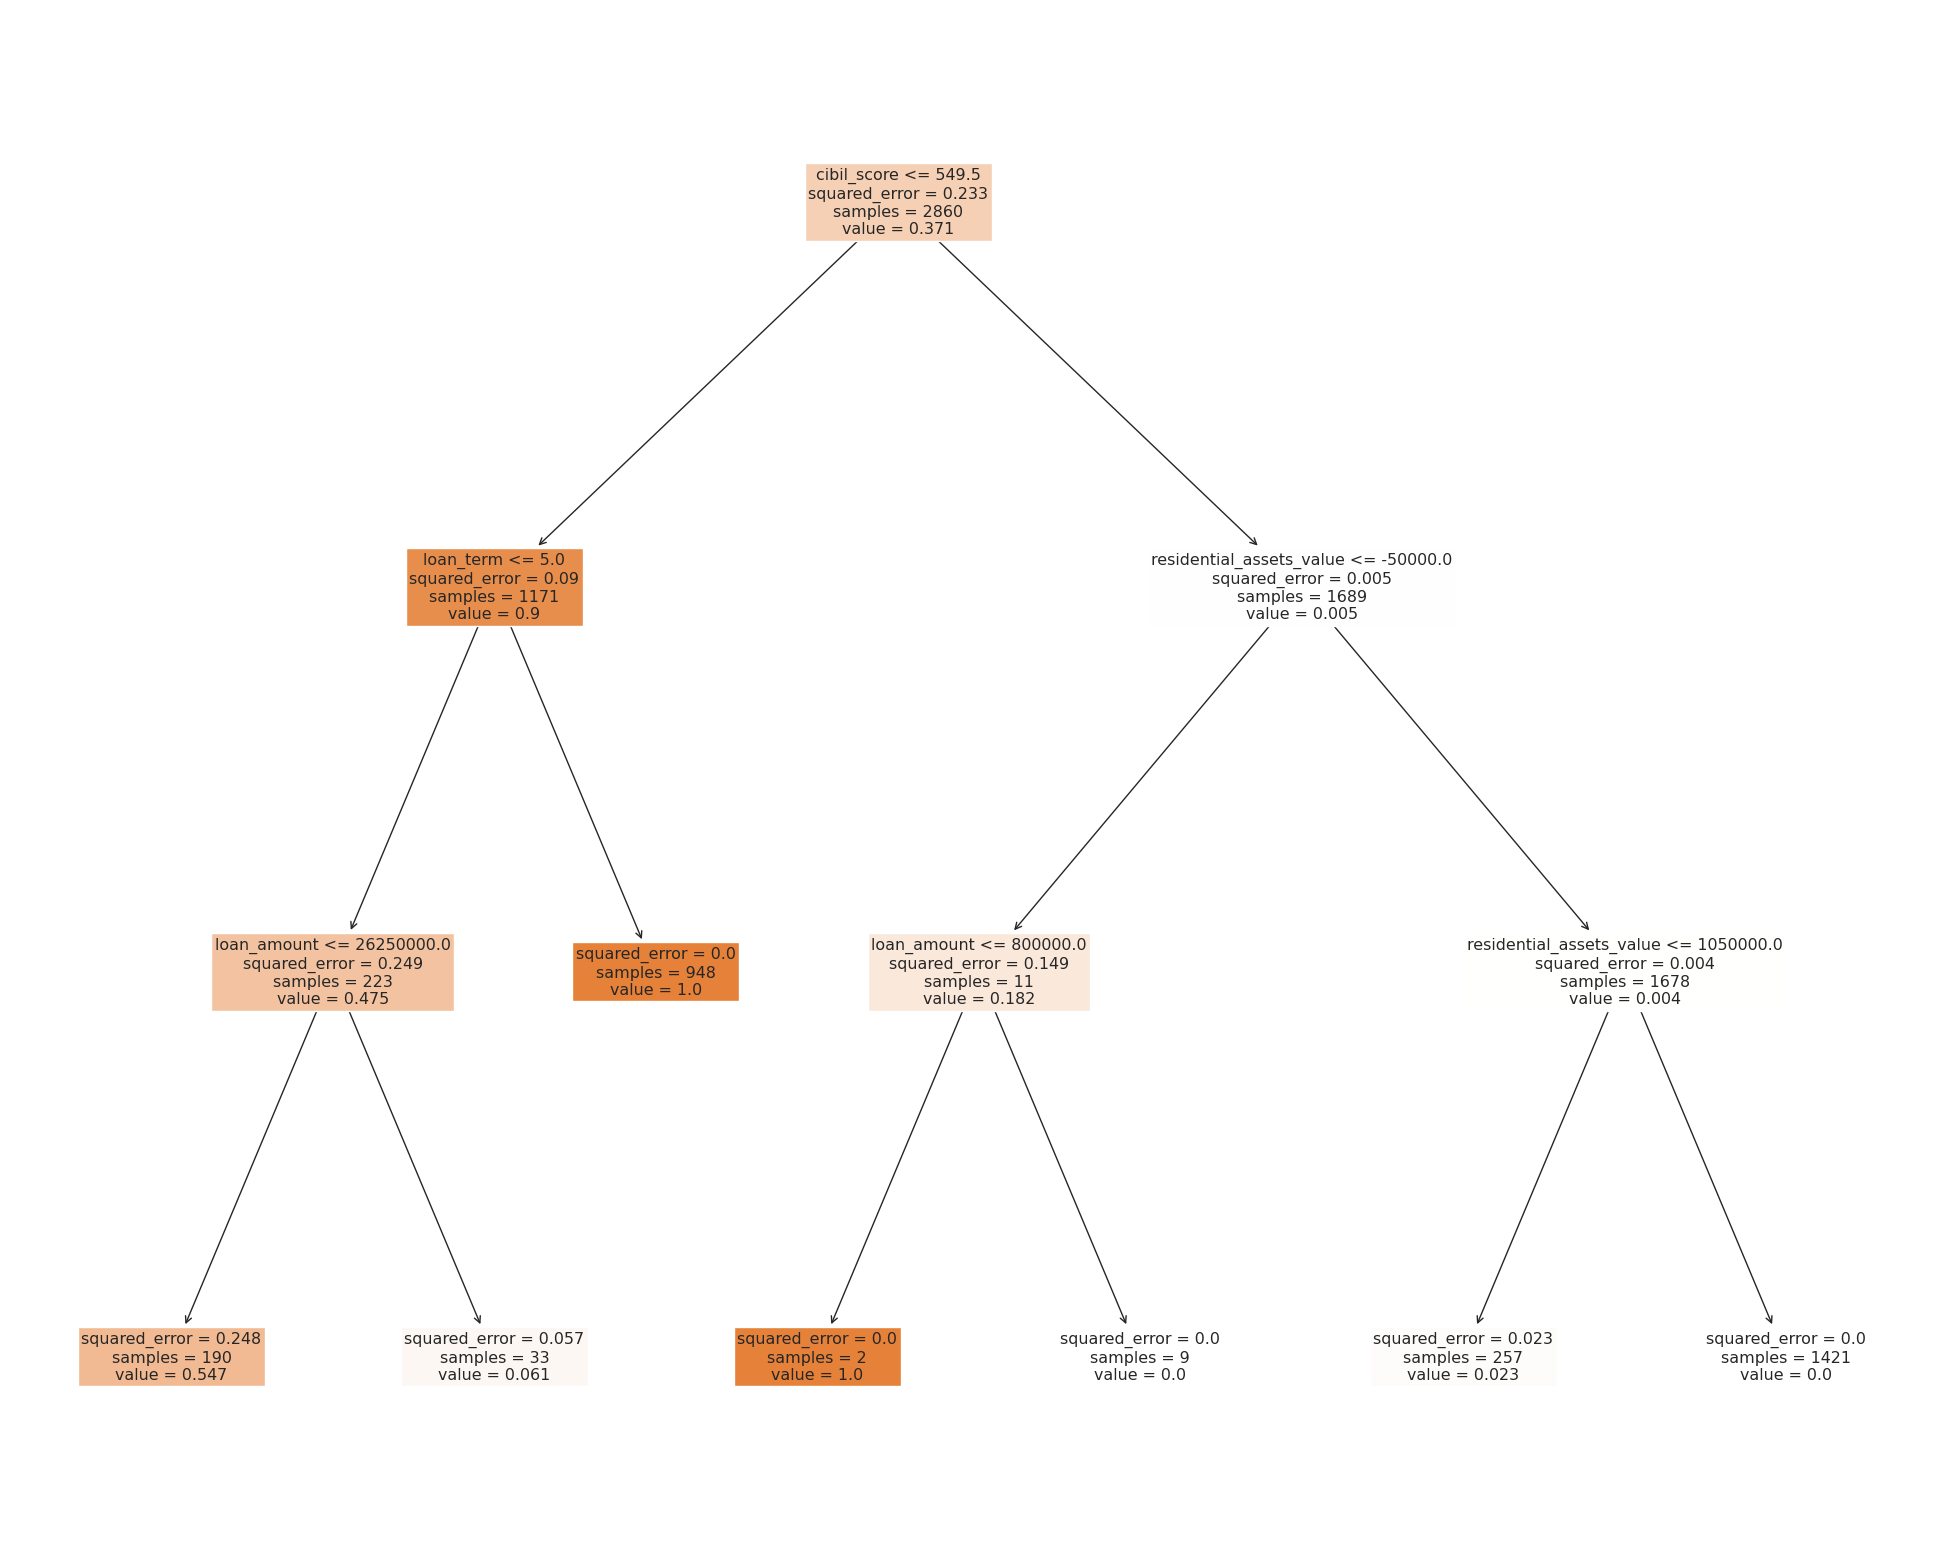

In [417]:
from sklearn import tree
from matplotlib import pyplot as plt

#set the figure size to 25 (width) and 20 (height)
fig = plt.figure(figsize=(25,20))

##The filled parameter in tree.plot_tree() fills the tree nodes with colors to indicate the majority class for classification tasks
tree.plot_tree(DTree, feature_names= features.columns, filled=True)

###Interpreting Nodes of a Tree-Based Model


The above decision tree is one of the many trees involved in predicting the target variable. Each decision tree regression predicts a number as an output for a given input. Random forest regression takes the average of those predictions as its final output.

As usual, the tree has conditions on each internal node and a value associated with each leaf (i.e. the value to be predicted). But additionally, we’ve plotted out the value at each internal node i.e. the mean of the response variables in that region.

Each terminal node aims to minimize the squared error, reflecting the goal of decreasing the variance in predictions.

The root node starts with 28636 samples and uses 'cibil_score' to split the data, resulting in two child nodes.

The feature that best splits the samples at the root is 'cibil_score', creating two subsequent nodes with squared errors of 0.09 and 0.0005, respectively, and containing 1202 samples with a squared error of 0.09 and 1658 samples with a very low squared error of 0.0005.

Subsequent splits are made based on 'loan_term' and 'residential_assets_value', further partitioning the data for more specific conditions. The leaf nodes demonstrate various MSE brackets, with each assigned a particular prediction value.

The halting of further growth in the tree is due to predefined stopping conditions to prevent overfitting. These conditions, such as maximum tree depth, minimum samples per leaf, or minimum reduction in error metric, ensure that the tree generalizes well to new data rather than perfectly fitting the training data, which could result in poor predictive performance on unseen data.

## Running SHAP analysis on the models and interpreting the SHAP values and comparing them with the other model interpretability methods.

It helps to determine the importance of each feature to the model's predictions. Unlike simpler metrics for feature importance, SHAP values can capture both the direct effect of a feature and its interactions with other features.
In simple terms, SHAP analysis is a method to explain what a machine learning model is doing. When a model makes a prediction, like deciding if a loan should be approved or not, SHAP analysis helps us understand which pieces of information (features) the model is using to make that decision, and how important each piece of information is to the final decision. It’s like having a detailed breakdown of how different factors contribute to the model's conclusions, which helps us trust and understand the model better.


In [418]:
data

loan_id  no_of_dependents  education  self_employed  income_annum  \
0           1                 2          0              0       9600000   
1           2                 0          1              1       4100000   
2           3                 3          0              0       9100000   
3           4                 3          0              0       8200000   
4           5                 5          1              1       9800000   
...       ...               ...        ...            ...           ...   
4264     4265                 5          0              1       1000000   
4265     4266                 0          1              1       3300000   
4266     4267                 2          1              0       6500000   
4267     4268                 1          1              0       4100000   
4268     4269                 1          0              0       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        29900000         12          778                   2400000   
1        12200000          8          417                   2700000   
2        29700000         20          506                   7100000   
3        30700000          8          467                  18200000   
4        24200000         20          382                  12400000   
...           ...        ...          ...                       ...   
4264      2300000         12          317                   2800000   
4265     11300000         20          559                   4200000   
4266     23900000         18          457                   1200000   
4267     12800000          8          780                   8200000   
4268     29700000         10          607                  17800000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
0                    17600000             22700000           8000000   
1                     2200000              8800000           3300000   
2                     4500000             33300000          12800000   
3                     3300000             23300000           7900000   
4                     8200000             29400000           5000000   
...                       ...                  ...               ...   
4264                   500000              3300000            800000   
4265                  2900000             11000000           1900000   
4266                 12400000             18100000           7300000   
4267                   700000             14100000           5800000   
4268                 11800000             35700000          12000000   

      loan_status  
0               0  
1               1  
2               1  
3               1  
4               1  
...           ...  
4264            1  
4265            0  
4266            1  
4267            0  
4268            0  

[4269 rows x 13 columns]

In [419]:
# Remove leading spaces from column names


# Verify the updated column names
print("Columns in the dataset after stripping leading spaces:")
print(data.columns)

Columns in the dataset after stripping leading spaces:
Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


ANALYSING FOR AUTOML

In [421]:
#importing the H2O machine learning library and the H2O AutoML module
import h2o
from h2o.automl import H2OAutoML

In [422]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6
run_time=222

In [423]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)



Checking whether there is an H2O instance running at http://localhost:14683..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmptik5iu8y
  JVM stdout: /tmp/tmptik5iu8y/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmptik5iu8y/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:14683
Connecting to H2O server at http://127.0.0.1:14683 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         04 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_fptmy5
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:14683
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [424]:
# initialize H2O using the h2o.init()
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpqhsnxfuh
  JVM stdout: /tmp/tmpqhsnxfuh/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpqhsnxfuh/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_y2l3n5
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [425]:
df_h2o= h2o.H2OFrame(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [438]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
data_train, data_test = df_h2o.split_frame([pct_rows])

In [432]:
# Setting up AutoML
def autoML(df_train, df_test):
    X = df_train.columns
    y = "loan_status"

    aml = H2OAutoML(max_runtime_secs=222, seed=1)  # Setting of AutoML
    aml.train(
        x=X, y=y, training_frame=df_train
    )  # Trainig the dataset on different models

    return data_train, data_test, aml


# Function to get best model from the AutoML leaderboard
def getBestModel(aml):
    model_index = 0
    glm_index = 0
    glm_model = ""
    aml_leaderboard_df = aml.leaderboard.as_data_frame()
    models_dict = {}

    for m in aml_leaderboard_df["model_id"]:
        models_dict[m] = model_index
        if "StackedEnsemble" not in m:
            break
        model_index = model_index + 1

    for m in aml_leaderboard_df["model_id"]:
        if "GLM" in m:
            models_dict[m] = glm_index
            break
        glm_index = glm_index + 1

    print(model_index)
    best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])
    return best_model


In [433]:
autoML = autoML(df_train, df_test)  # Training AutoML

AutoML progress: |
02:38:37.361: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███
02:38:44.651: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


02:38:45.385: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
02:38:54.20: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
02:38:54.419: _response param, We have dete

In [434]:
autoML[2].leaderboard  # Leaderbord of AutoML output

model_id                                                    rmse        mse        mae      rmsle    mean_residual_deviance
------------------------------------------------------  --------  ---------  ---------  ---------  ------------------------
GBM_grid_1_AutoML_2_20240403_23837_model_5              0.113817  0.0129544  0.0322569  0.0796572                 0.0129544
StackedEnsemble_AllModels_3_AutoML_2_20240403_23837     0.114157  0.0130317  0.0346266  0.0802064                 0.0130317
StackedEnsemble_BestOfFamily_4_AutoML_2_20240403_23837  0.115681  0.0133822  0.0330307  0.0810856                 0.0133822
StackedEnsemble_AllModels_1_AutoML_2_20240403_23837     0.119911  0.0143787  0.050732   0.0857751                 0.0143787
StackedEnsemble_AllModels_2_AutoML_2_20240403_23837     0.120046  0.0144111  0.0507387  0.08581                   0.0144111
StackedEnsemble_BestOfFamily_2_AutoML_2_20240403_23837  0.121502  0.0147626  0.0548062  0.0873583                 0.0147626
StackedEnsemble_BestOfFamily_3_AutoML_2_20240403_23837  0.121624  0.0147924  0.0541179  0.0872972                 0.0147924
XGBoost_grid_1_AutoML_2_20240403_23837_model_3          0.122174  0.0149265  0.0358686  0.0868497                 0.0149265
GBM_4_AutoML_2_20240403_23837                           0.123447  0.0152392  0.0606453  0.0886946                 0.0152392
GBM_2_AutoML_2_20240403_23837                           0.123623  0.0152827  0.0527443  0.0879137                 0.0152827
[45 rows x 6 columns]

In [435]:
autoML_model = getBestModel(autoML[2])  # Getting Best Model
print(autoML_model)

0
Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_2_20240403_23837_model_5


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    57                 57                          66267                  9            17           16.3684       21            136           88.5088

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.0032132687274338666
RMSE: 0.0566857012608459
MAE: 0.016879015827122642
RMSLE: 0.03979082155086468
Mean Residual Deviance: 0.0032132687274338666

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.012954374737998438
RMSE: 0.11381728663958932
MAE: 0.0322569406280227
RMSLE: 0.07965715399296129
Mean Resid

In [436]:
autoML_model.algo

'gbm'

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

<Figure size 1200x800 with 0 Axes>

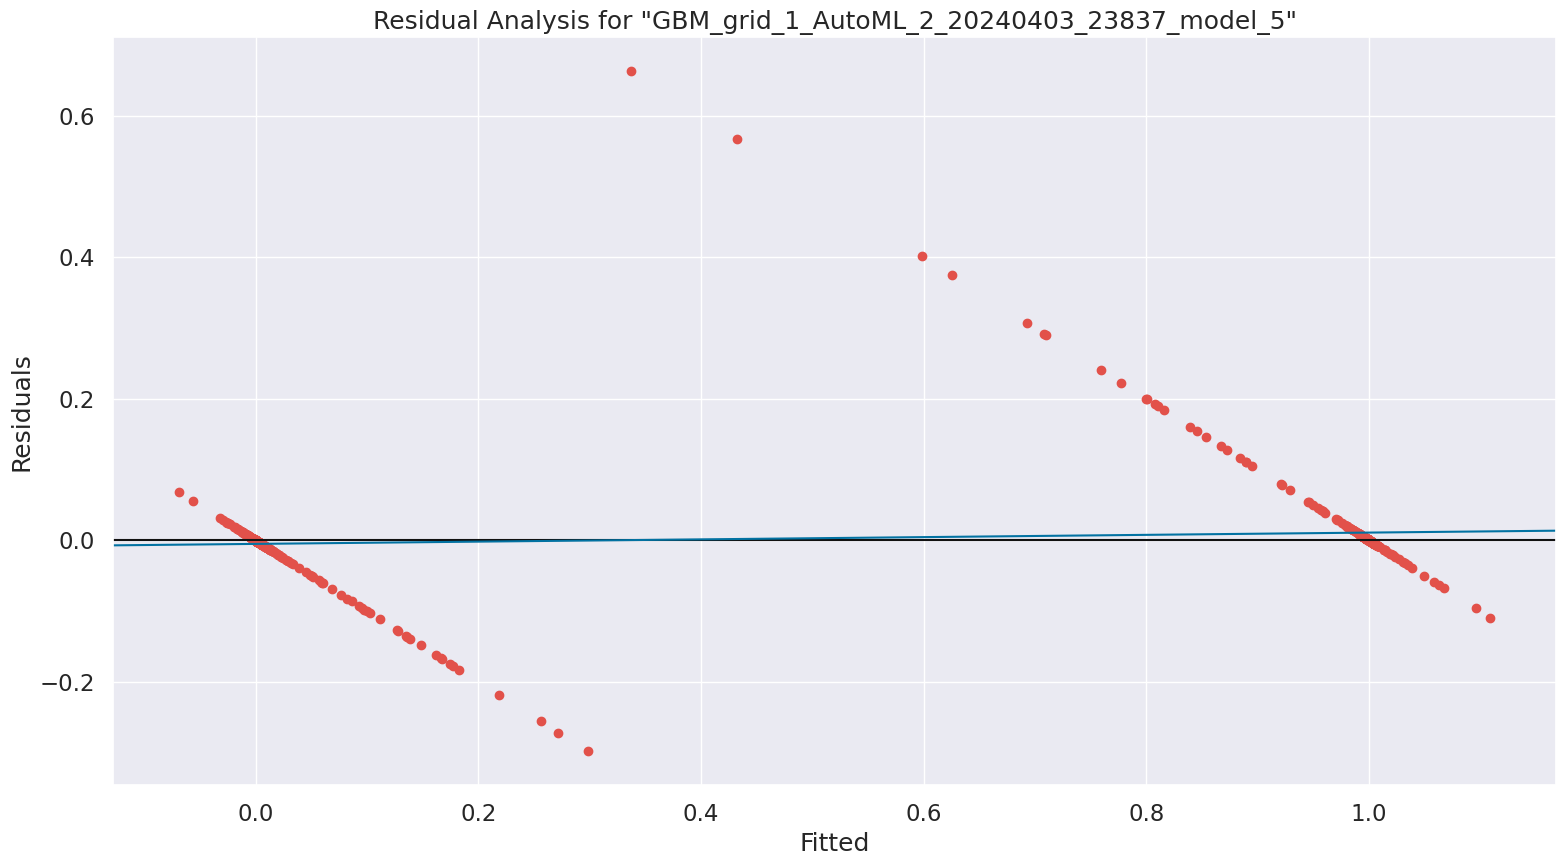

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

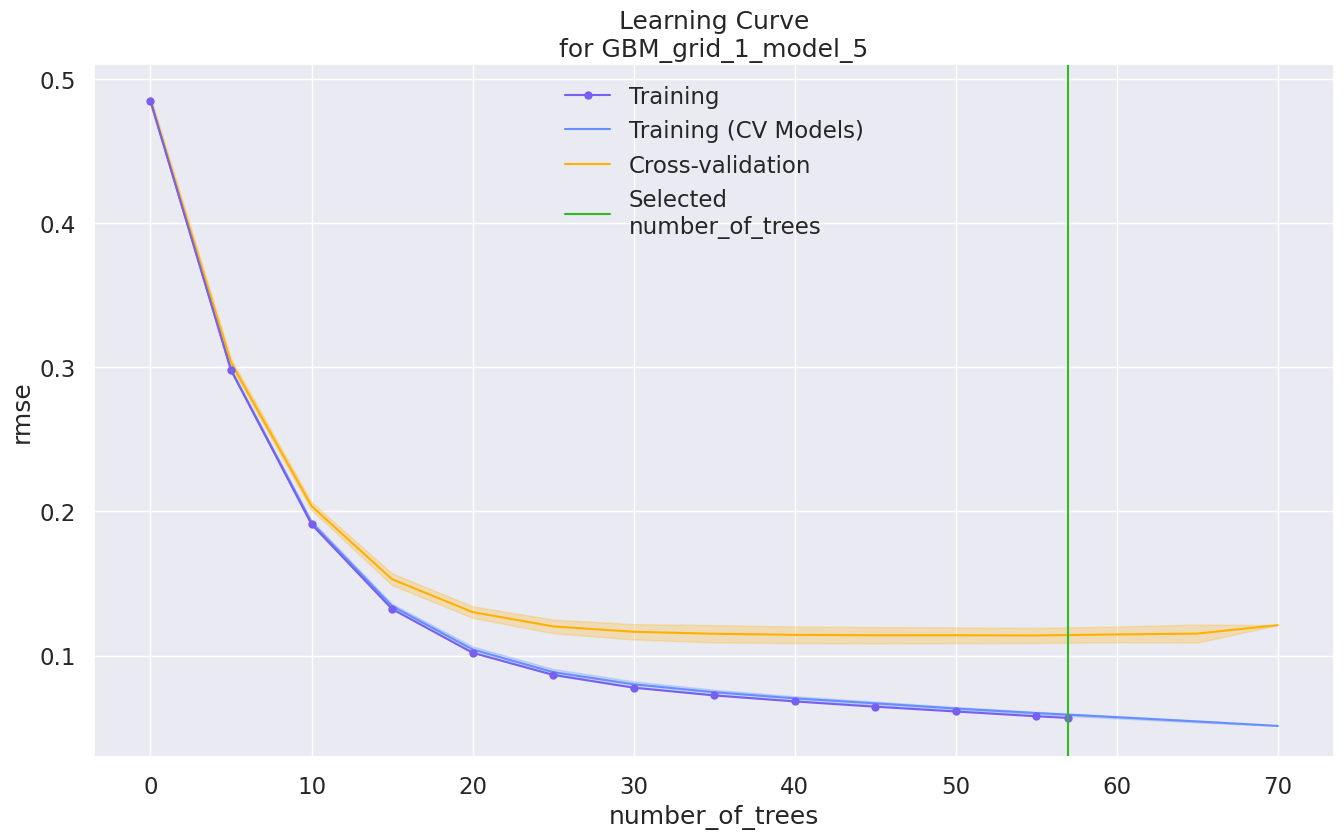

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

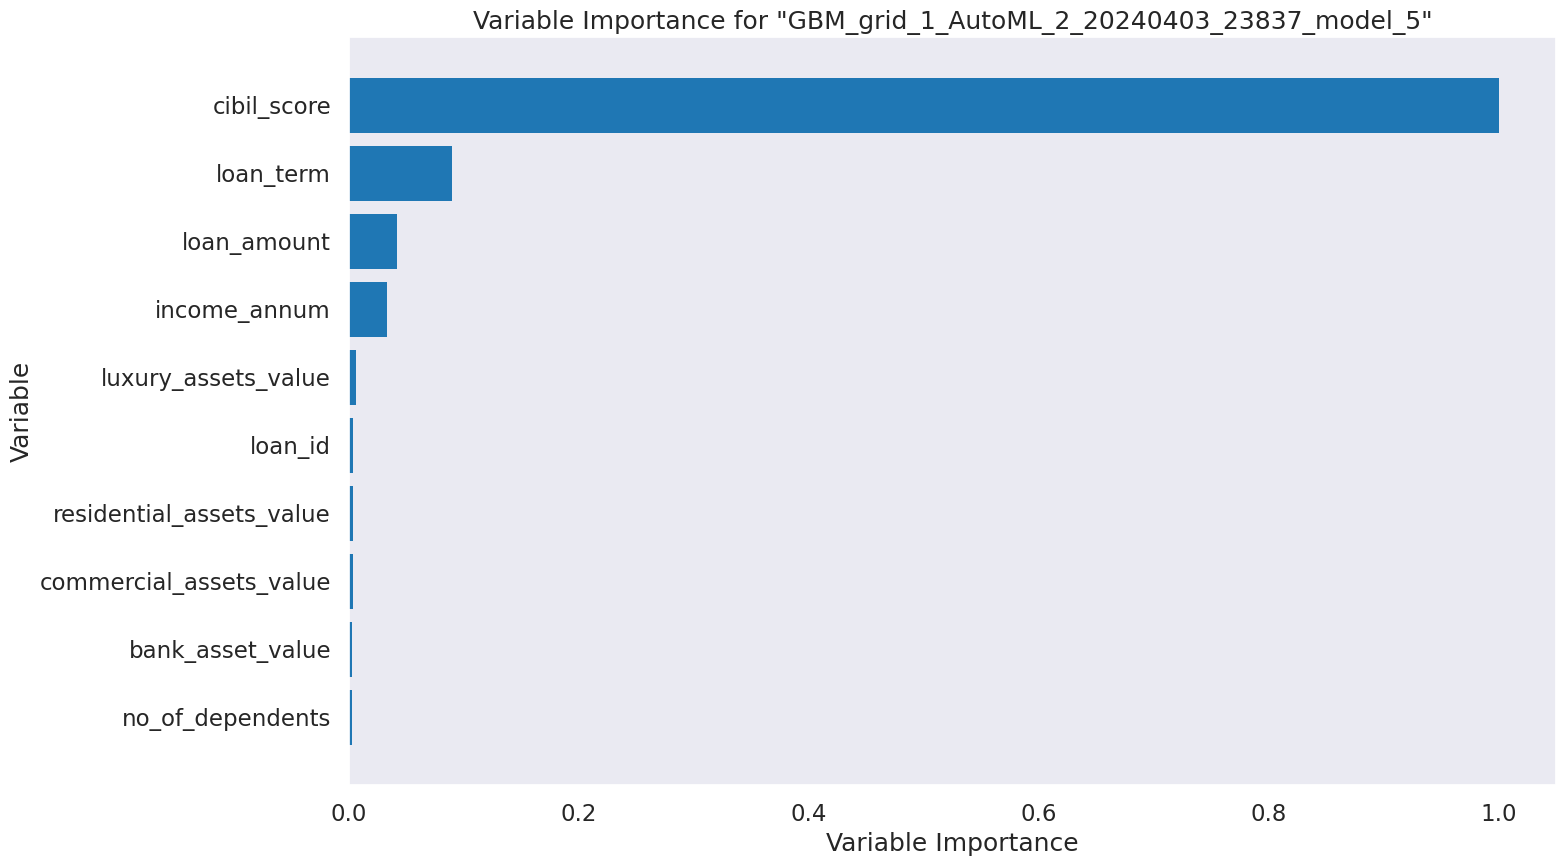

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

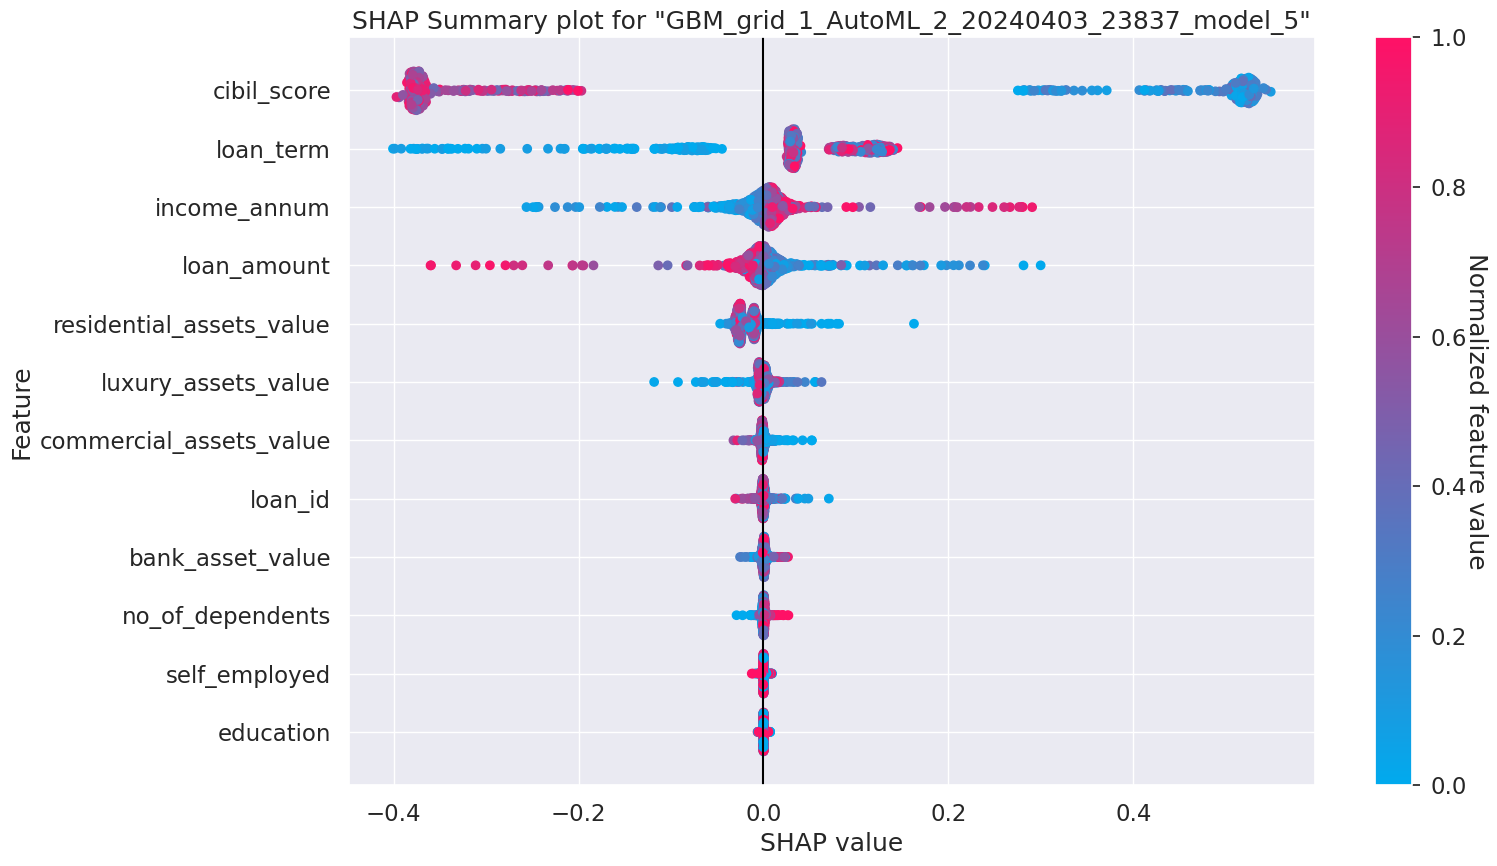

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

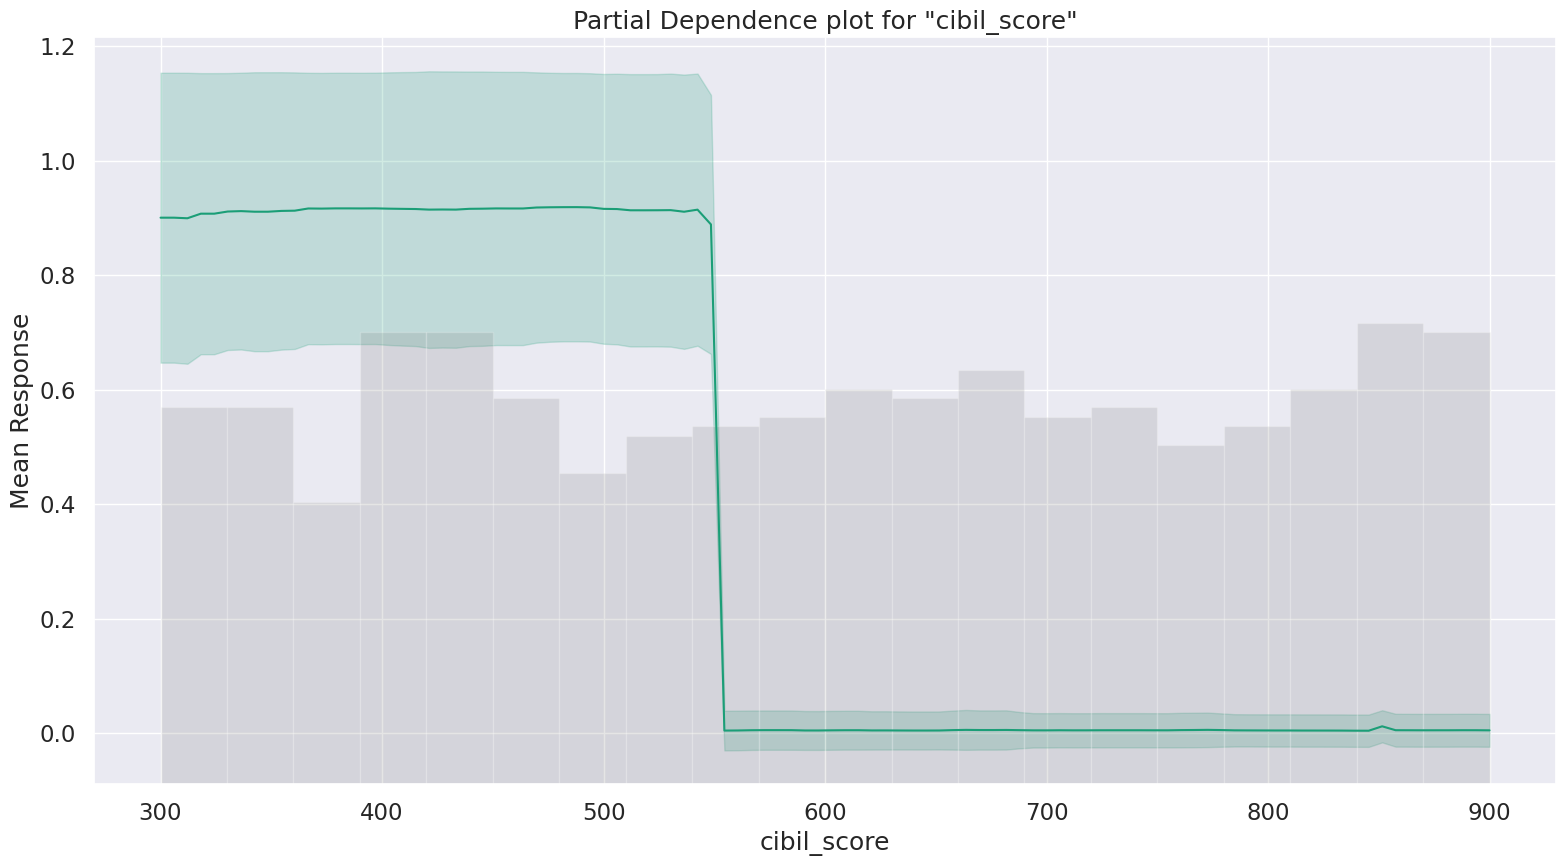

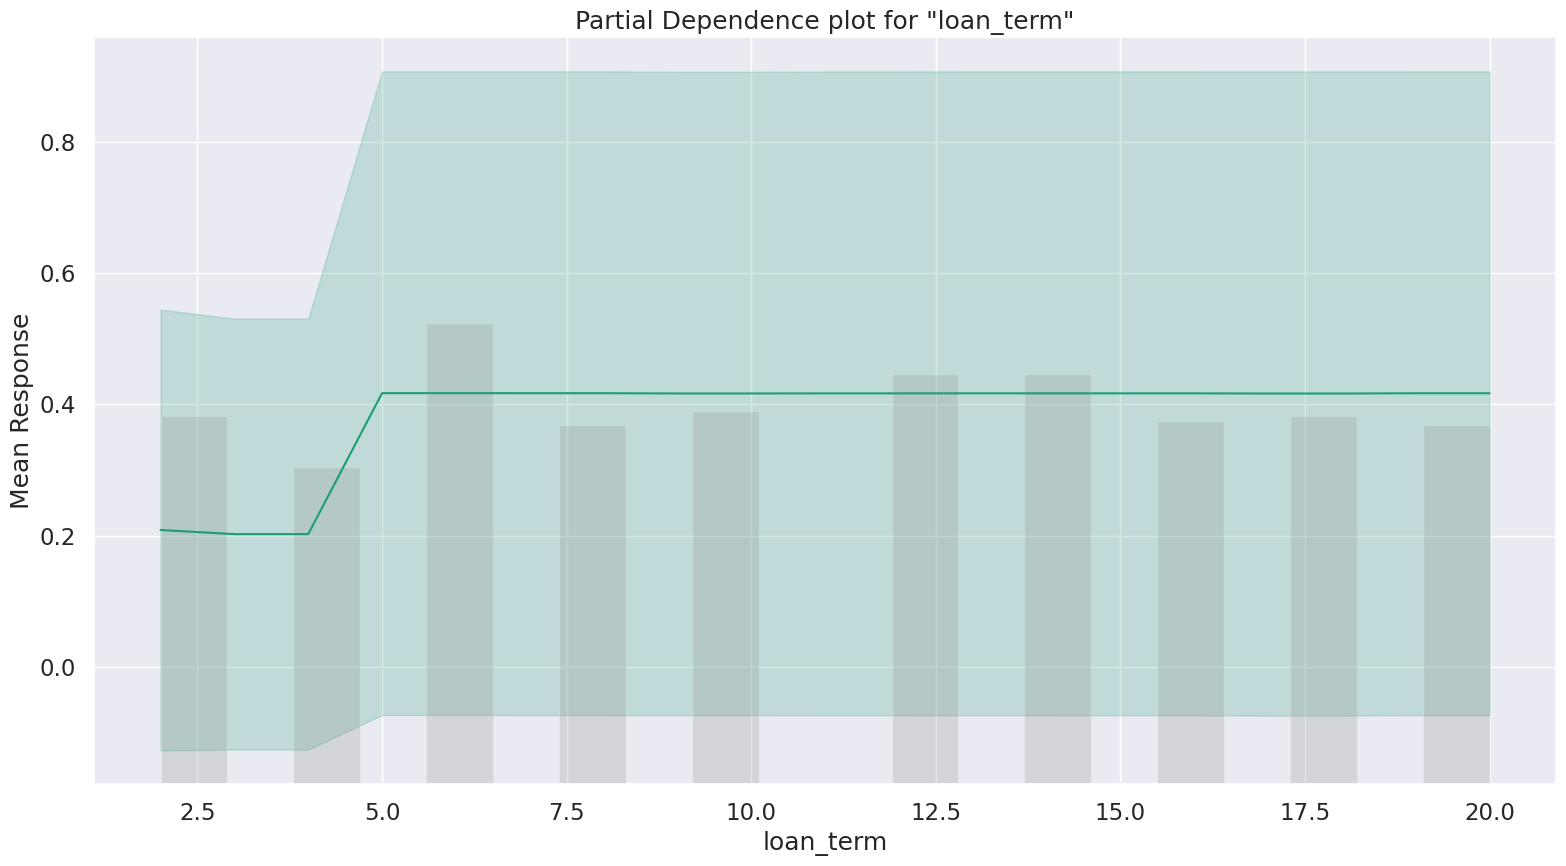

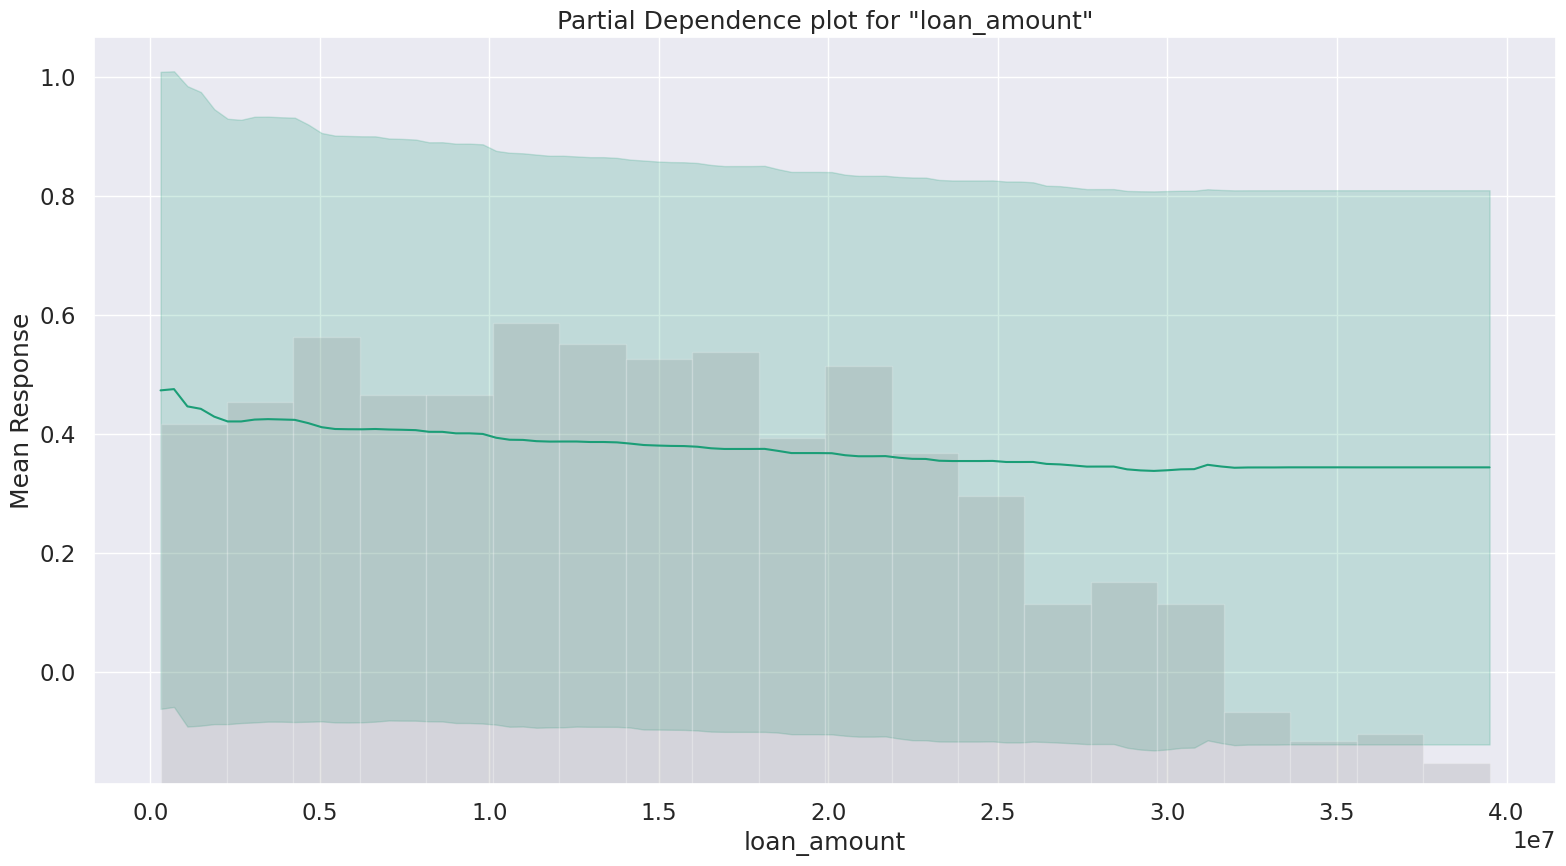

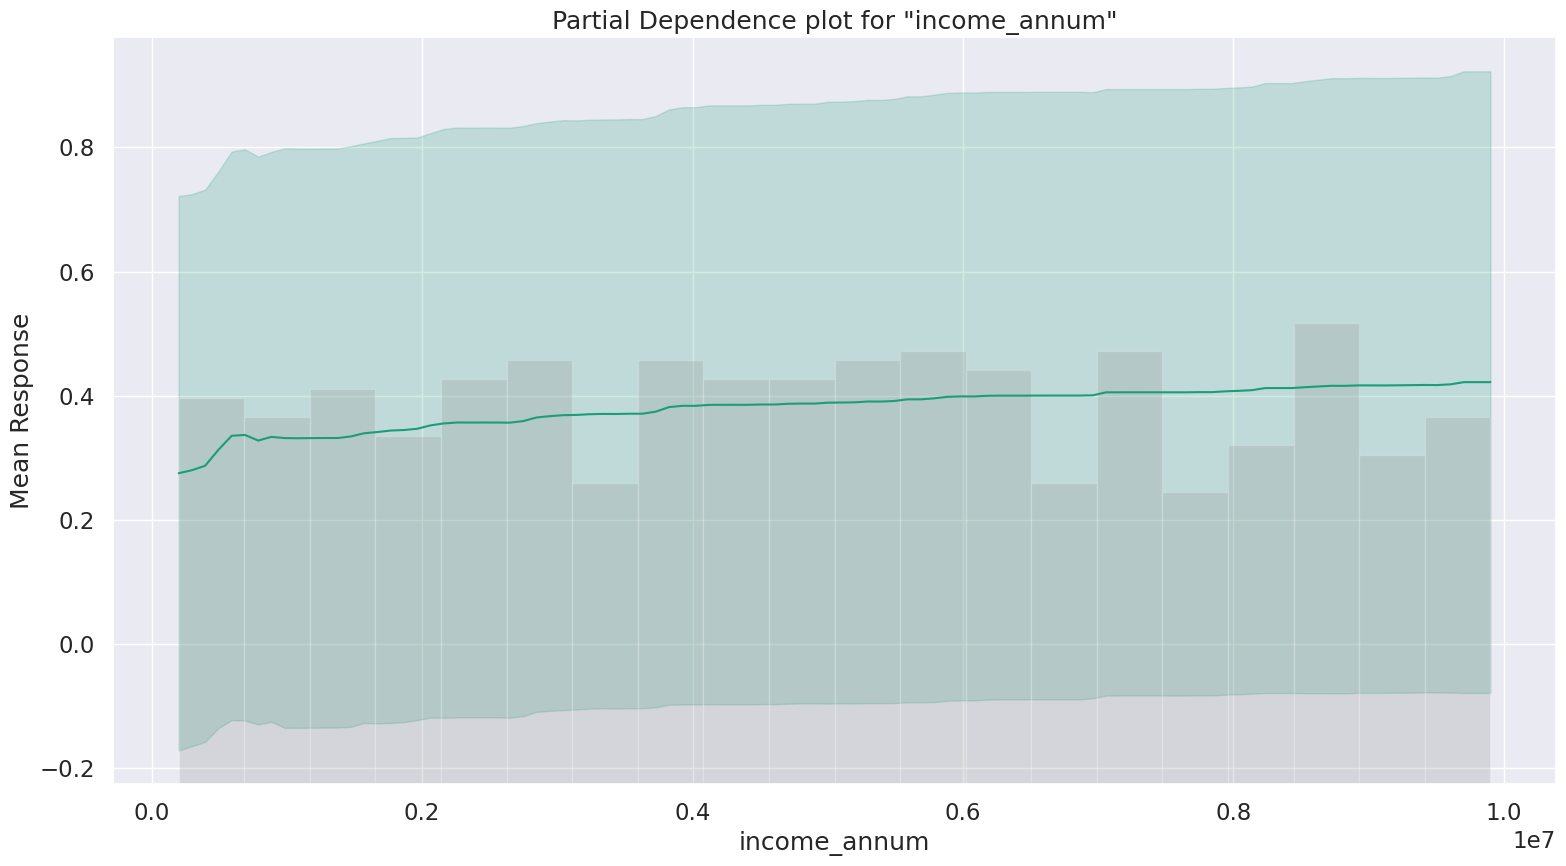

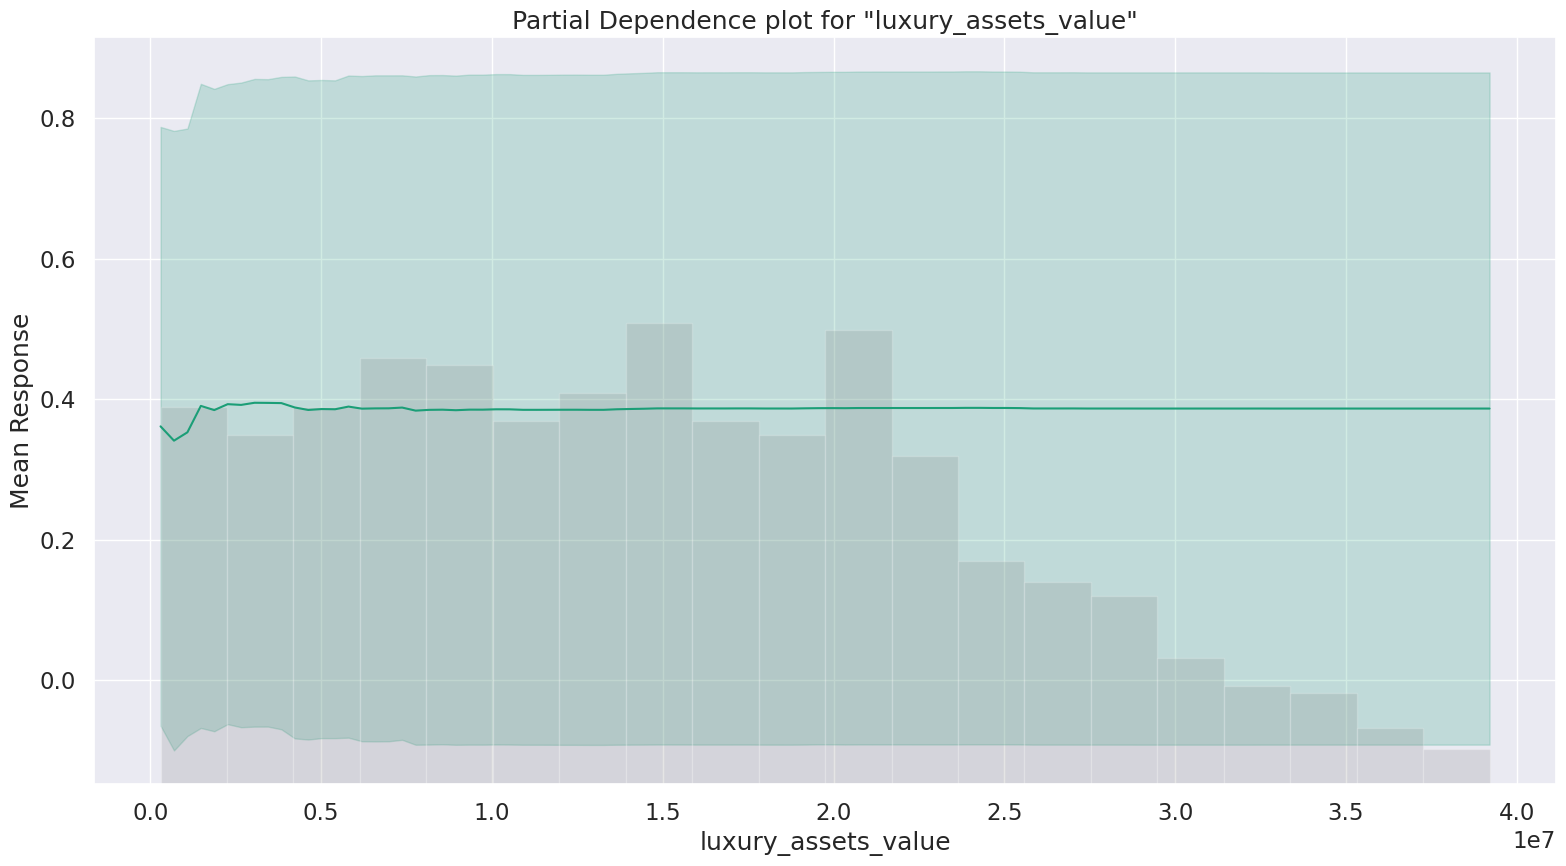

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

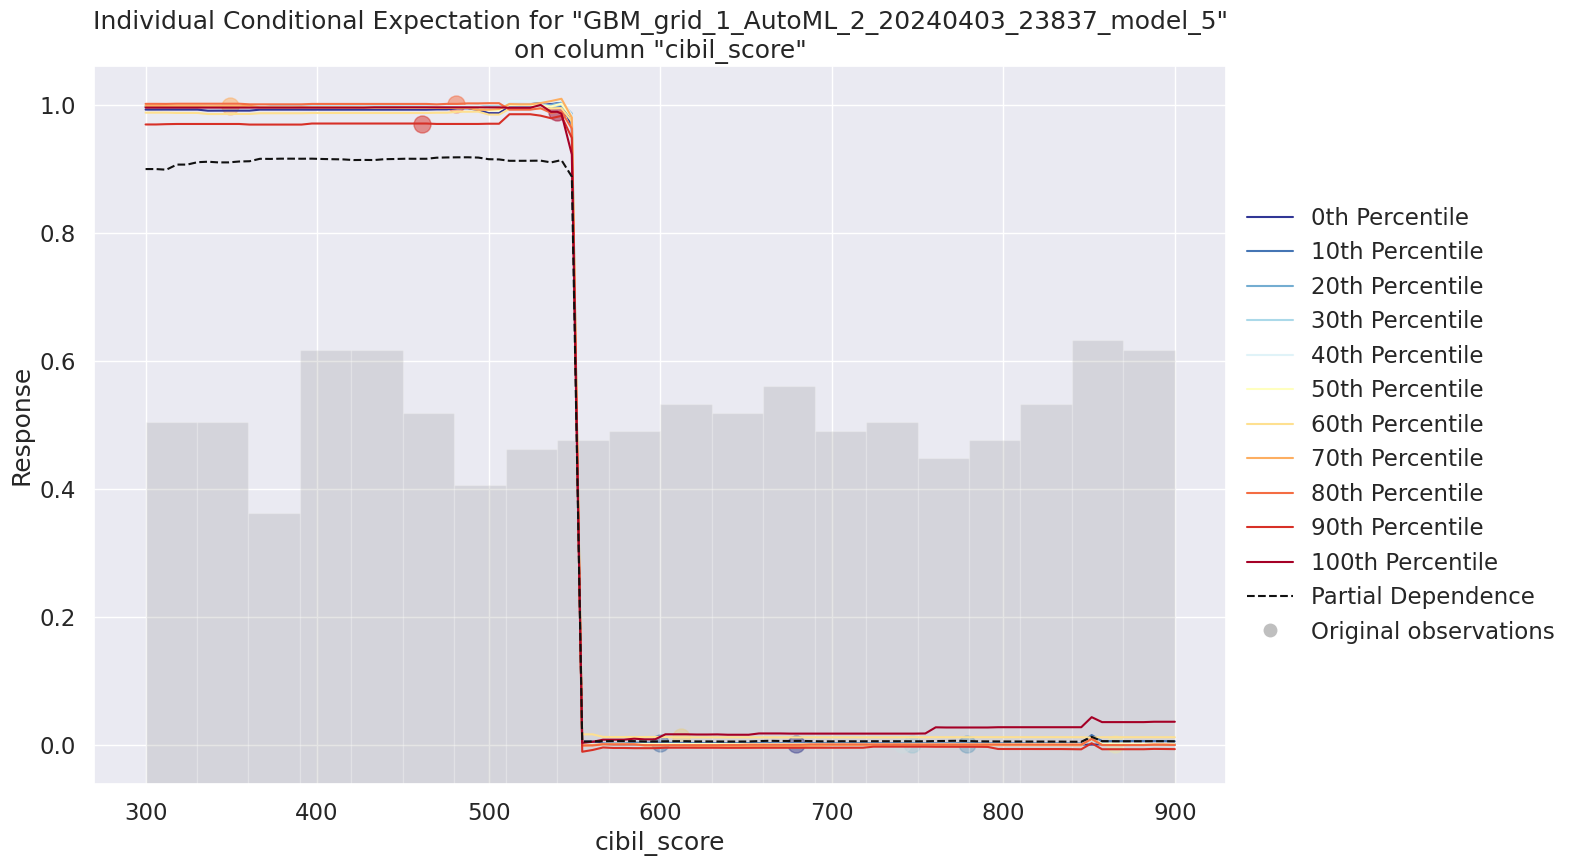

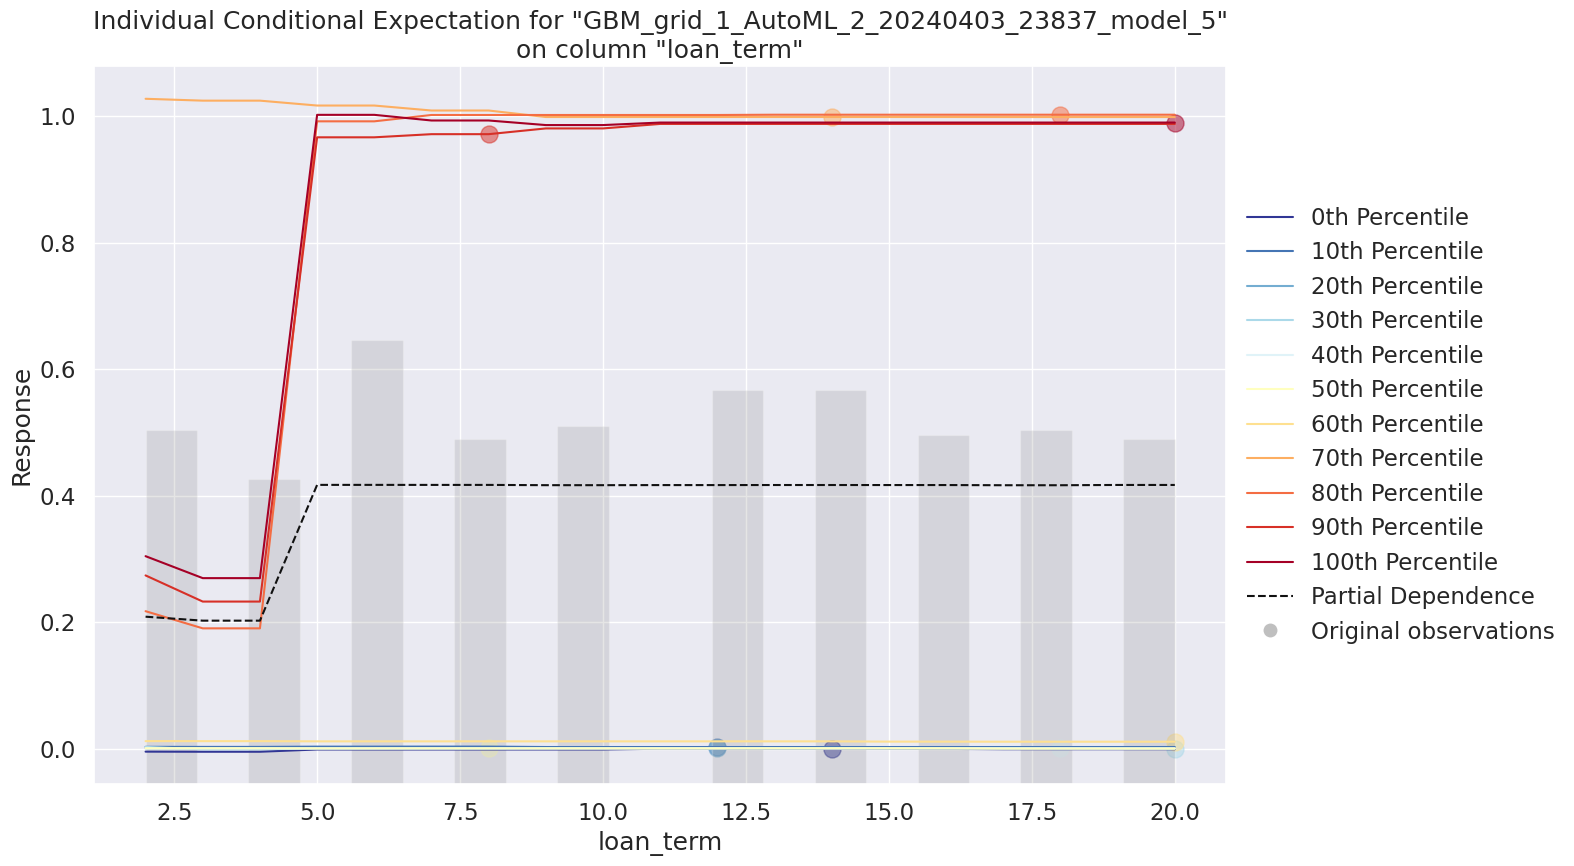

In [ ]:
import matplotlib.pyplot as plt

# Set the size of plots
plt.figure(figsize=(12, 8))

# Get the leaderboard from the AutoML model
leaderboard = autoML[2].leaderboard

# Access the first model in the leaderboard (index 0)
best_model_id = leaderboard[0, "model_id"]

# Get the best model using its ID
best_model = h2o.get_model(best_model_id)

# Explain the best model
explanation = best_model.explain(data_test)



Learning Curve: It shows the relationship between the number of trees used in the model and the log loss for both training and cross-validation. The training and cross-validation loss decrease and then plateau, indicating that adding more trees beyond the selected number doesn't significantly improve the model on the validation set.

Variable Importance: This plot ranks the features by their importance in the model. 'cibil_score' appears to be the most important feature, with 'loan_term' and 'loan_amount' following.

SHAP Summary Plot: This plot provides a dense summary of the effect each feature has on the model output. The position on the X-axis indicates the impact on the prediction, with 'cibil_score' again appearing to be the most influential. The color represents the feature value (red high, blue low). This plot shows that higher 'cibil_score' values tend to push the model output higher, which likely corresponds to a higher likelihood of loan approval.

Partial Dependence Plots: These plots show the marginal effect one or two features have on the predicted outcome of a machine learning model. For 'cibil_score', there's a significant change in the mean response when the score is low, which stabilizes as the score increases. For 'loan_term', 'loan_amount', 'income_annum', and 'commercial_assets_value', the plots show a more stable mean response across their ranges, indicating a smaller or more uniform effect on the model's predictions.


Combining these insights, the 'cibil_score' appears to be a significant predictor for loan approval decisions in this model, and overall model performance is strong with low error rates.

In developing the predictive model, it appears that the SHAP summary plot has revealed some intriguing and counterintuitive relationships between the features and the target variable, loan_status. My initial intent was to forecast loan approval, where a status of 'accepted' would naturally align with a positive outcome, traditionally encoded as 1. However, during the preprocessing stage, I inverted this encoding, designating 'accepted' as 0 and 'rejected' as 1. This choice has resulted in SHAP values that, at first glance, seem to contradict typical lending patterns.

For instance, the cibil_score, a critical metric in lending decisions, normally sees higher scores correlating with increased loan approvals. Yet, under the current model's interpretation, a lower cibil_score surprisingly suggests a greater chance of loan acceptance. This anomaly is consistent across other features; for instance, a shorter loan_term or lower income_annum surprisingly tilts the model towards predicting loan acceptance. Similarly, factors like loan_amount and assets values, which one might expect to have a positive influence on loan approval likelihood, are showing the opposite effect.

It's clear that this inverted behavior is a direct consequence of how the loan_status target variable has been encoded. This revelation means that for all the features in the model, the SHAP values are essentially flipped. Higher values of seemingly positive indicators are, according to the model's current logic, increasing the probability of loan rejection, which is the opposite of their real-world implications.

##SHAP Analysis for Linear Model

PermutationExplainer explainer: 2861it [04:54,  9.59it/s]


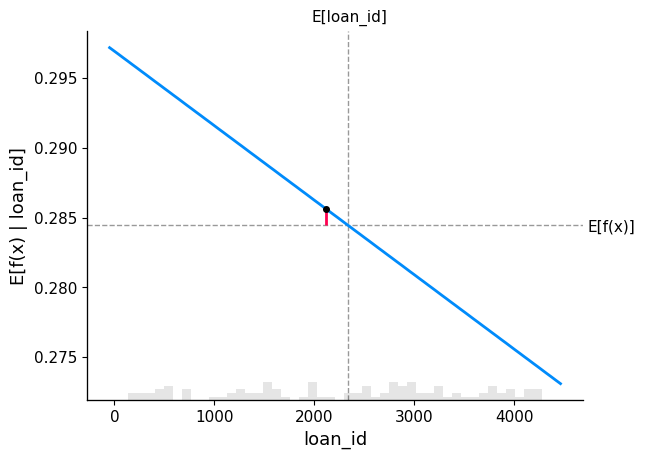

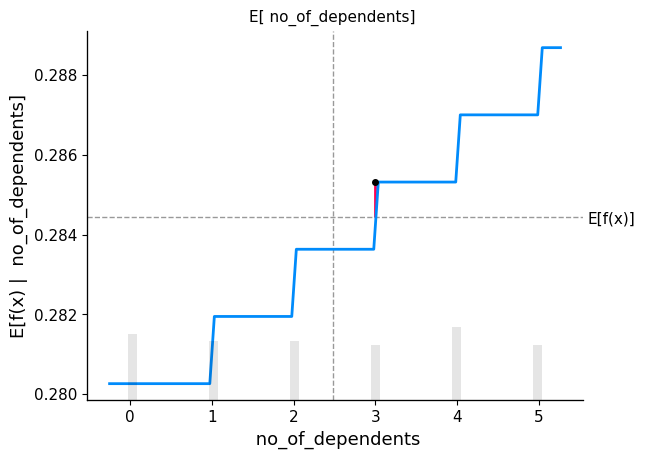

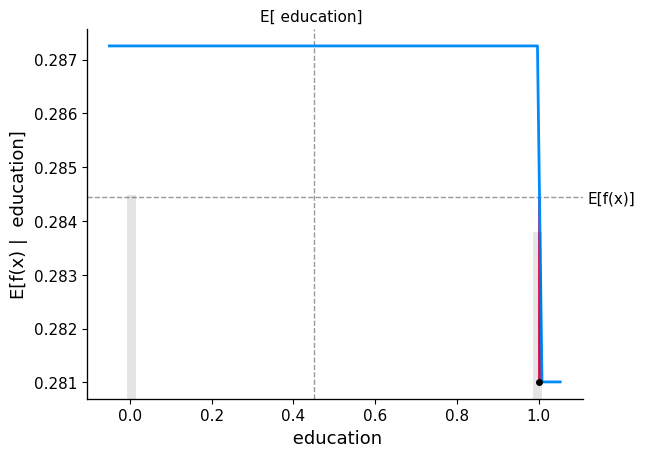

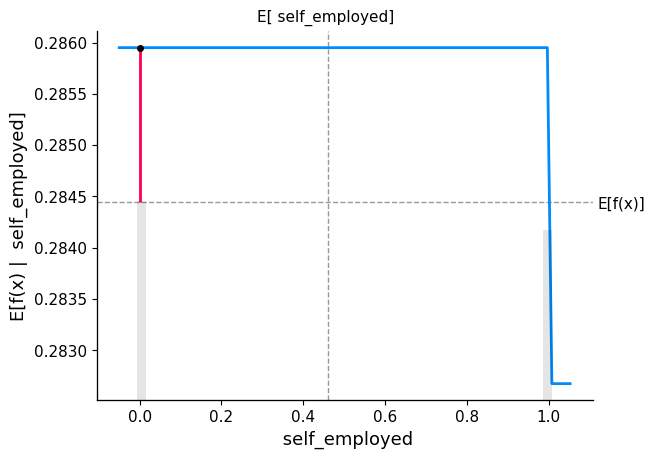

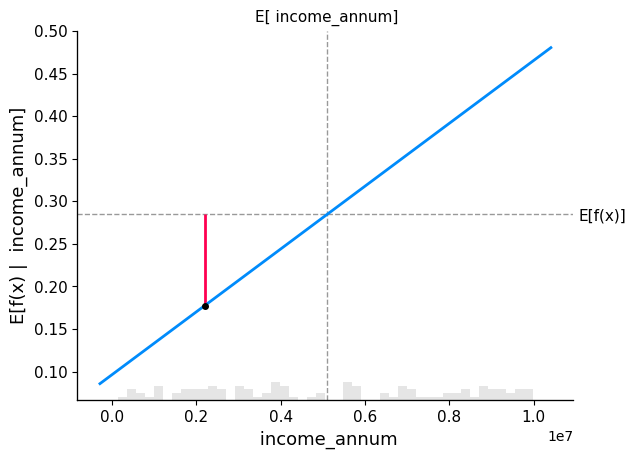

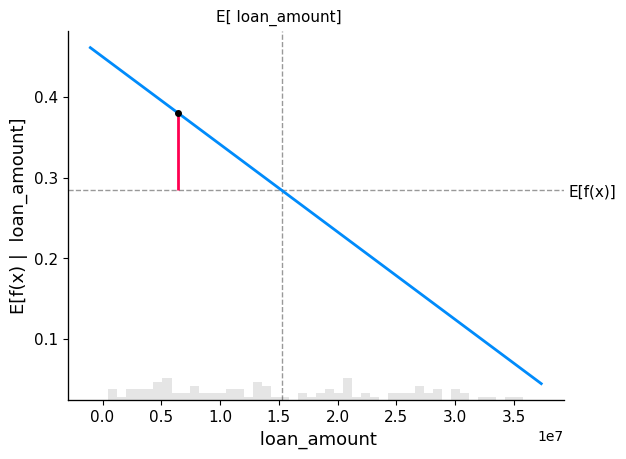

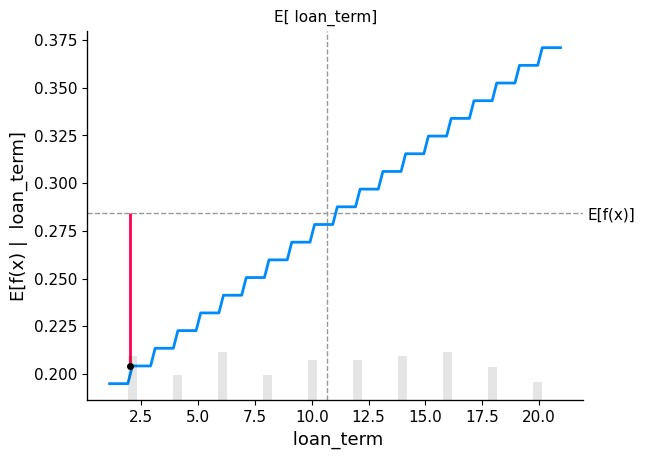

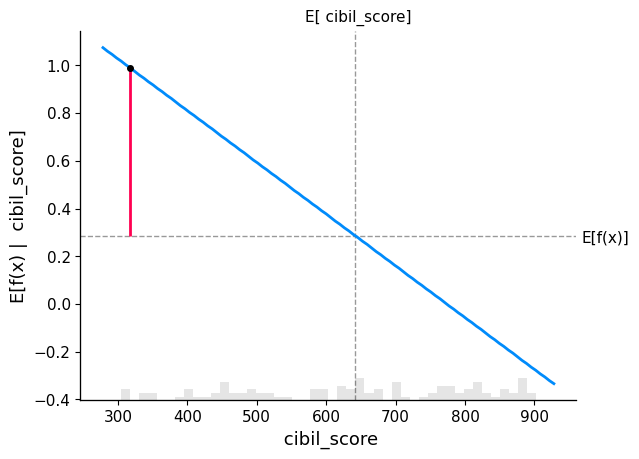

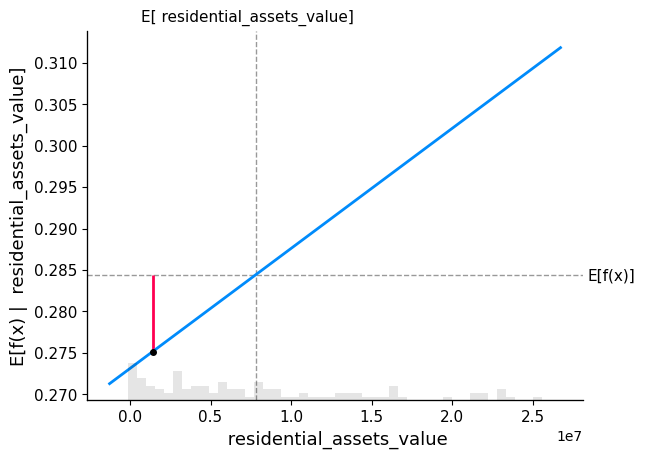

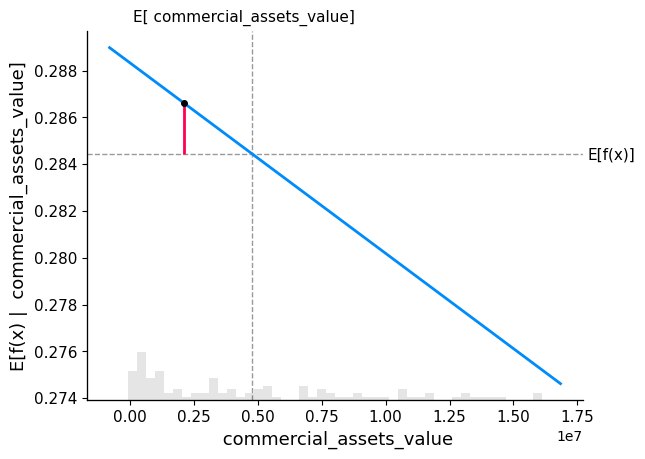

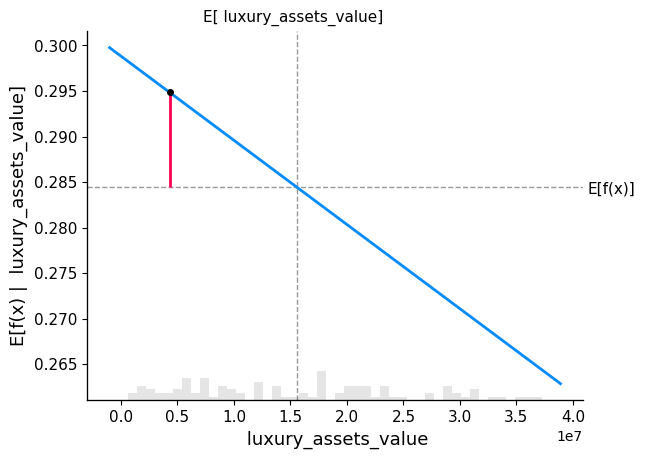

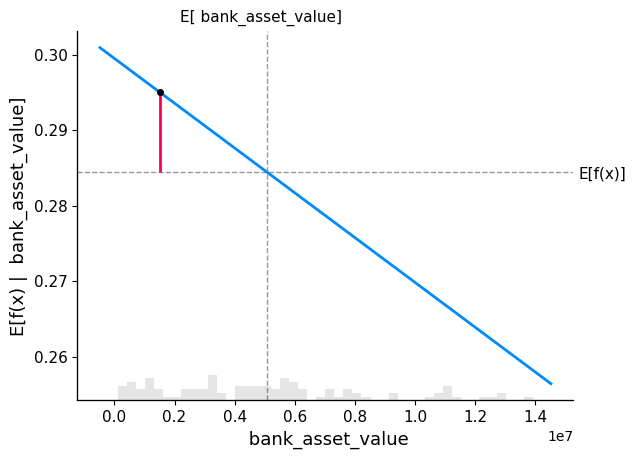

In [29]:
# SHAP explanation of a Linear Model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

x_train_100 = shap.utils.sample(
    X_train, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process
x_test_100 = shap.utils.sample(
    X_test, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process


linear_explainer = shap.Explainer(linear_model.predict, x_train_100)
linear_shap_values = linear_explainer(X_train)
for i in X_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        linear_model.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=linear_shap_values[sample_ind : sample_ind + 1, :],
    )

In Partial Dependence Plots (PDPs), the blue line represents the relationship between the feature and the prediction outcome from the model. When interpreting these plots with the target encoding of 'accepted = 0' and 'rejected = 1',  to understand how different values of a feature affect the likelihood of a loan being accepted or rejected by the model.

Here's an explanation for each variable based on the standard interpretation of PDPs:

cibil_score: As the cibil score increases, the plot shows a downward trend, indicating that higher cibil scores are associated with a lower likelihood of loan acceptance according to the model. This suggests that the model may have learned an inverse relationship, possibly due to the encoding of the target variable where 'accepted' is 0.

loan_term: The increasing trend in the plot suggests that longer loan terms are associated with a higher likelihood of loan rejection. This could reflect the model's learned pattern that longer loan durations might carry a higher risk of non-payment or default.

income_annum: With increasing annual income, the effect on loan acceptance seems to increase. This is a typical pattern, where higher income might be seen as an indicator of the ability to repay the loan, thus lower risk for the lender.

loan_amount: Conversely, as the loan amount increases, the likelihood of loan rejection seems to increase. Larger loan amounts could be seen as riskier by the model, hence the negative association.

education: '1' represents NOT GRADUATE, the model seems to suggest that lower education is linked to a lower probability of loan acceptance.

self_employed: If '1' represents being self-employed, the plot shows a sharp drop, indicating that self-employed individuals are less likely to have their loans accepted, which may be due to perceived instability in self-employed income.

no_of_dependents: As the number of dependents increases, the likelihood of loan acceptance appears to fluctuate. This may be due to the model picking up on the financial responsibility associated with dependents affecting loan repayment capability.

loan_id: The identifier should not have a significant predictive power unless it's somehow correlated with the temporal aspects of the loans or other factors. Typically, you'd expect to see a flat line for IDs if they're properly randomized and not informative.

commercial_assets_value: An increasing value of commercial assets is associated with a decrease in loan acceptance likelihood. It might be due to the perceived risk of commercial ventures or the quality of the assets as collateral.

###SHAP Analysis for Tree Based Model

PermutationExplainer explainer: 2861it [02:46, 16.72it/s]


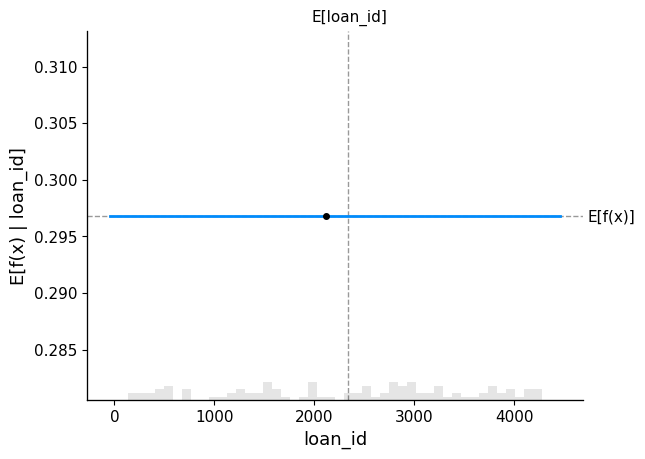

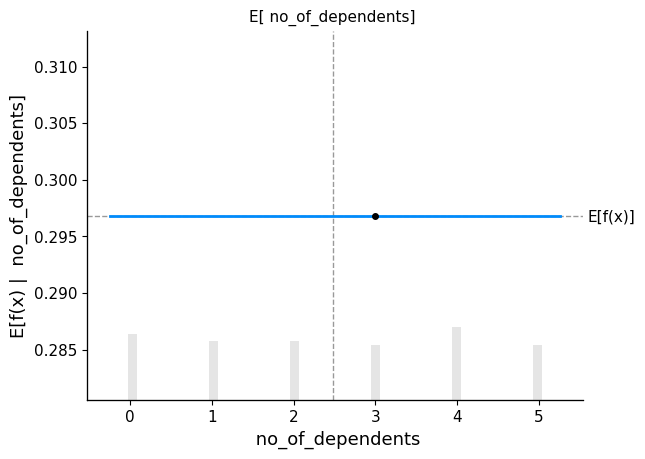

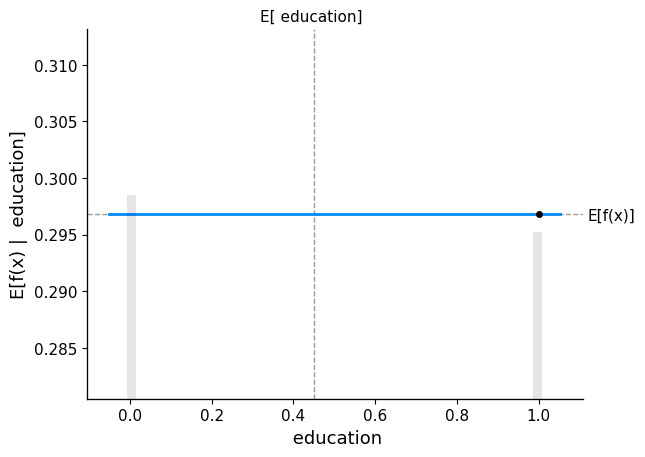

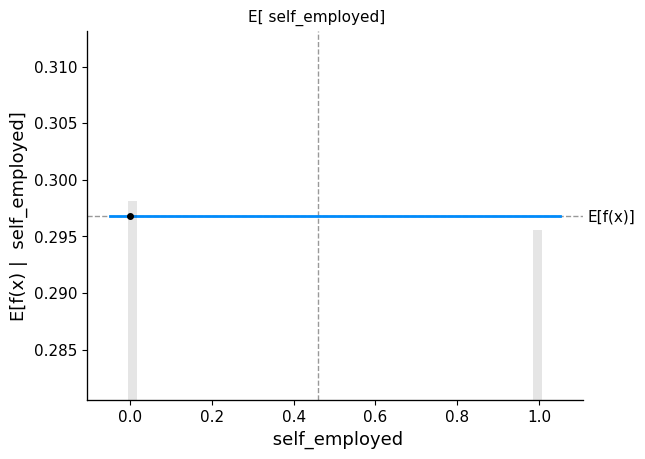

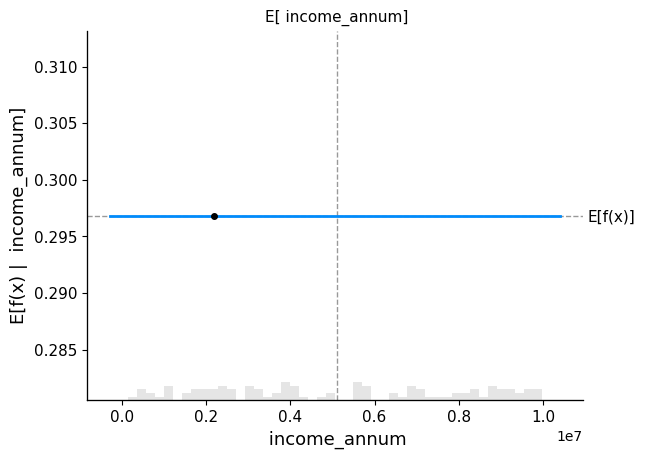

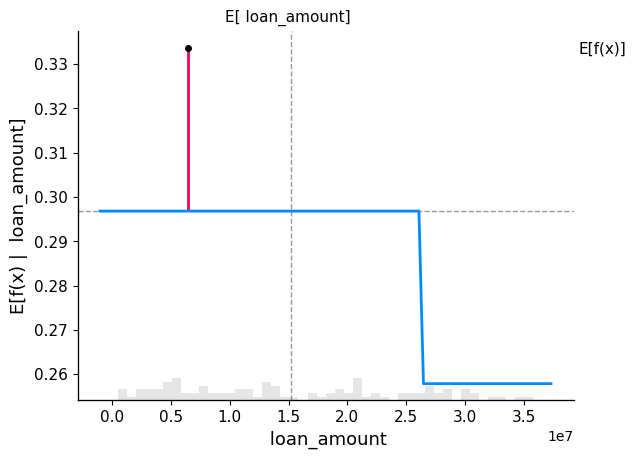

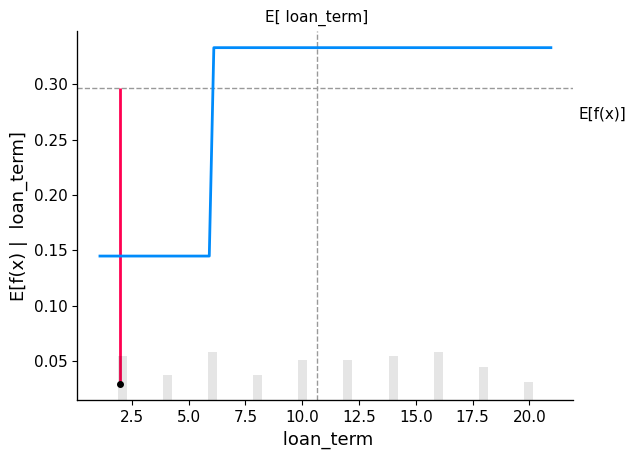

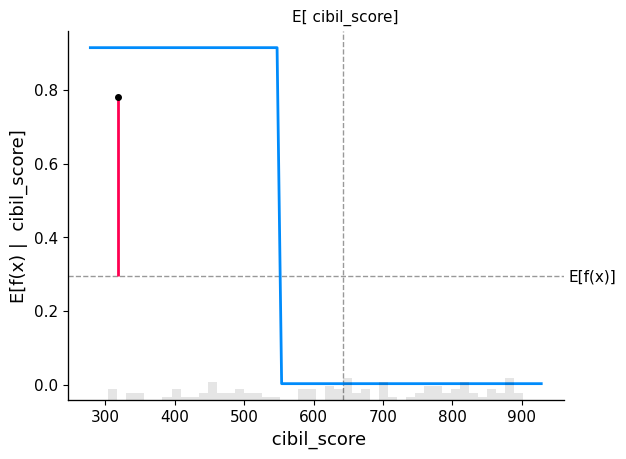

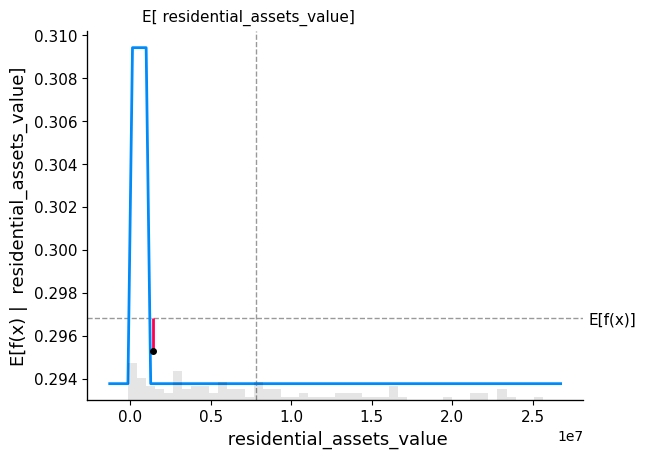

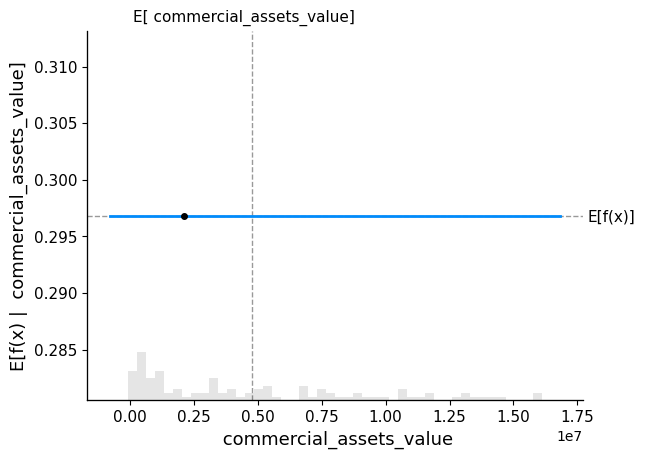

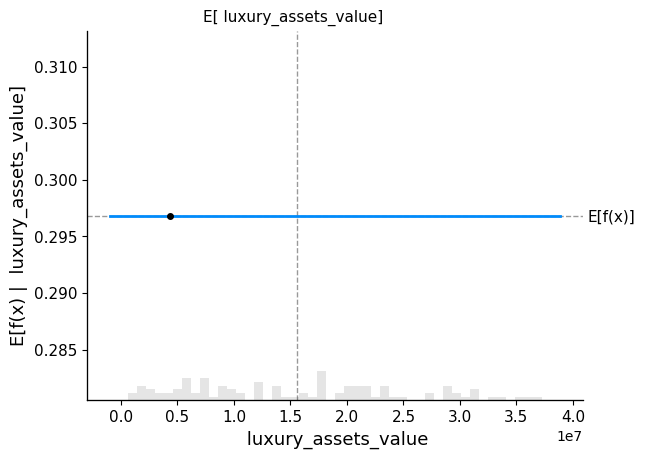

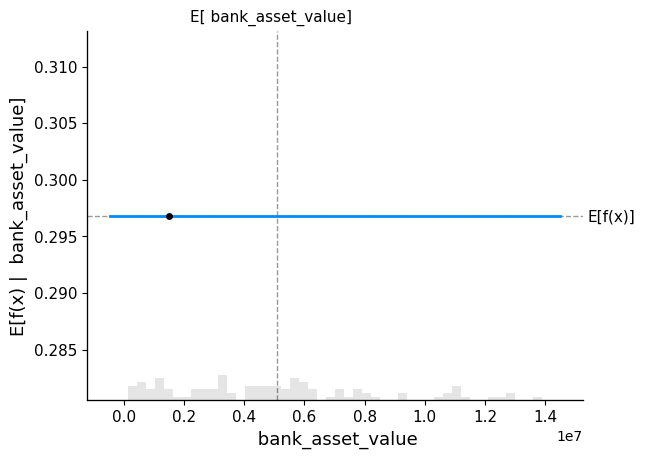

In [32]:
# SHAP explanation of a tree based model
tree_explainer = shap.Explainer(DTree.predict, x_train_100)
tree_shap_values = tree_explainer(X_train)
for i in X_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        DTree.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=tree_shap_values[sample_ind : sample_ind + 1, :],
    )


Considering Approved is be encoded as 0 and Rejected as 1:
Self-Employed: There seems to be a neutral or very slight increase in the probability of loan rejection for self-employed individuals as the value transitions from 0 to 1. This indicates that being self-employed has a small negative impact on the loan status.

Residential Assets Value: The sharp increase in prediction probability at lower values of residential assets suggests that having lower-valued residential assets significantly increases the chances of loan rejection. Conversely, higher asset values correspond to a lower probability of rejection (loan acceptance).

CIBIL Score: The plot shows a negative correlation with loan rejection as CIBIL score increases. This implies that higher CIBIL scores, which are typically indicative of better creditworthiness, indeed decrease the likelihood of loan rejection.

Loan Amount: For lower loan amounts, there's an increased probability of rejection, while higher amounts level off, indicating that beyond a certain amount, the size of the loan does not significantly affect the rejection rate.

Loan Term: Longer loan terms appear to decrease the likelihood of rejection, while shorter terms increase it, possibly reflecting the lender's preference for extended repayment periods which are seen as lower risk.

Number of Dependents: Having a certain number of dependents seems to increase the likelihood of loan rejection, though this effect is less pronounced than for some other variables.

Education: There appears to be no significant effect of education on loan status in the given range, as the line remains flat.

Commercial Assets Value: Similar to residential assets, lower commercial asset values seem to correlate with a higher probability of loan rejection.

##Interpreting Waterfall SHAP visualization


Given the loan status encoding where 'accepted' is 0 and 'rejected' is 1,

CIBIL Score (cibil_score): A CIBIL score of 318 has a large positive SHAP value, which indicates that such a low score greatly increases the chance of the loan being rejected.

Annual Income (income_annum): An annual income of 2200000 has a negative SHAP value, indicating that a higher income in this case decreases the chance of rejection, leaning towards loan acceptance.

Loan Amount (loan_amount): A loan amount of 6400000 has a positive SHAP value, suggesting that requesting a higher loan amount increases the likelihood of rejection.

Loan Term (loan_term): A loan term of 2 has a negative SHAP value, which suggests that shorter loan terms may decrease the likelihood of rejection, possibly indicating lower risk for the lender.

Bank Asset Value (bank_asset_value): A bank asset value of 1500000 has a slight positive SHAP value, which in this context slightly pushes towards rejection, although the reason why is not immediately clear from the plot alone.

Luxury Assets Value (luxury_assets_value): A value of 4300000 has a very slight positive impact, indicating a marginally increased chance of rejection, perhaps due to perceived higher expenses or lifestyle.

Residential Assets Value (residential_assets_value): A value of 1400000 has a small negative impact on the prediction, slightly reducing the chances of rejection, which could be seen as a sign of stability.

Commercial Assets Value (commercial_assets_value): A value of 2100000 does not contribute to the prediction (indicated by '+0'), suggesting it has no significant effect on the outcome for this particular instance.

Number of Dependents (no_of_dependents): With 3 dependents showing '+0', it appears this factor also does not significantly affect the loan's chance of acceptance or rejection.

Education (education): This feature has a value of 1 with a SHAP value of '-0', indicating that in this instance, the individual's education level does not affect the prediction.

Self-employed (self_employed): Being self-employed (with a value of '0' indicating not self-employed) also does not significantly affect the prediction.

Loan ID (loan_id): The loan ID, presumably a unique identifier for the loan application, has a '+0' SHAP value, which means it's not contributing to this prediction, which is expected as it should not have a predictive power.

In summary, the SHAP values illustrate that for this specific prediction, a low CIBIL score and a high loan amount are the most influential factors pushing towards a prediction of rejection, while a higher annual income and a shorter loan term are influential towards acceptance. Other variables have little to no impact on the prediction for this particular case.

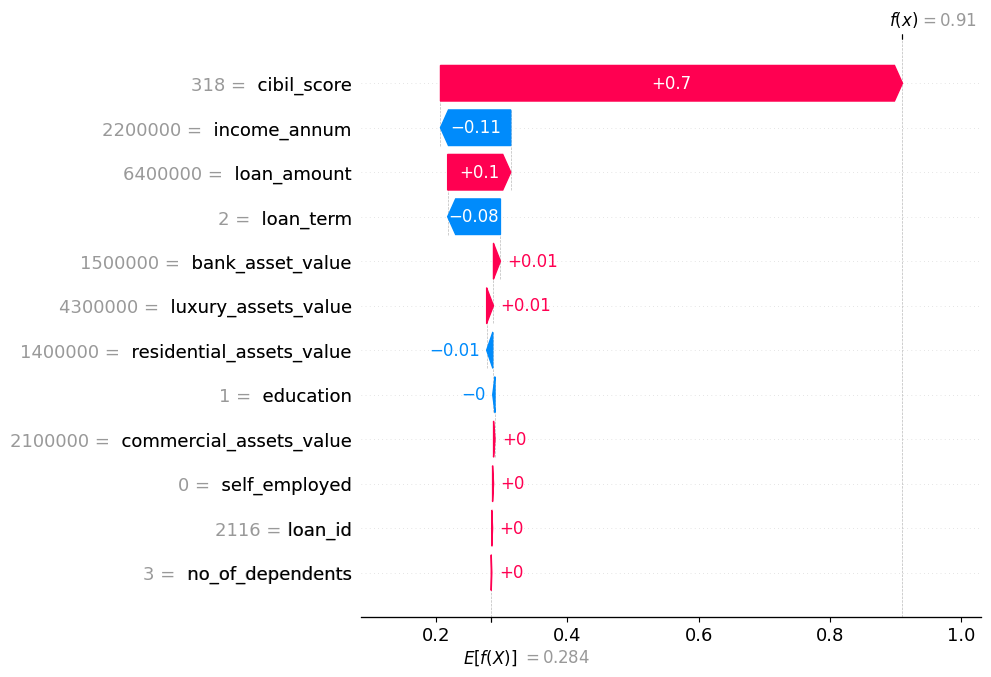

In [41]:
# Waterfall plot for linear model
shap.plots.waterfall(linear_shap_values[sample_ind], max_display=14)

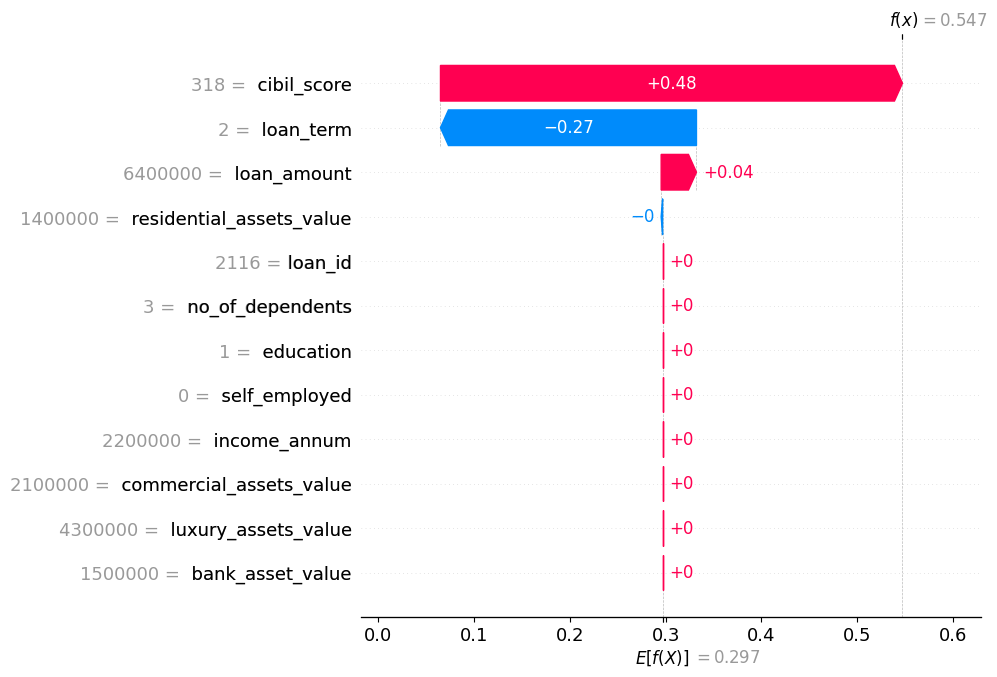

In [42]:
# Waterfall plot for Tree Based Model
shap.plots.waterfall(tree_shap_values[sample_ind], max_display=14)

## LIME (Local Interpretation Model-Agnostic Explanation) Analysis

In [33]:
!pip install lime

In [34]:
#The LimeTabularExplainer is a class from the LIME (Local Interpretable Model-agnostic Explanations) library,
#provides an interpretable explanation for the predictions of a black-box model by generating local linear models around the instance of interest

from lime.lime_tabular import LimeTabularExplainer

from lime import lime_tabular

In [35]:
# Initializing LIME explainer for Linear Model
lime_linear_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train), feature_names=X_train.columns, mode="regression"
)

In [36]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [39]:
# Getting LIME interpretation for a sample data

# np.array() is used to convert the pandas dataframe X_test and y_test into numpy arrays, respectively.
# np_x_test and np_y_test. idx is the index of the instance of interest in the X_test and y_test arrays.

idx = 19
np_x_test = np.array(X_test)
np_y_test = np.array(y_test)

# predicts the target value for the instance with index 0 in the np_x_test array using the linear regression model lin_reg
print("Prediction : ", lin_reg.predict(np_x_test[0].reshape(1, -1)))

#np_y_test[idx] retrieves the target value for the instance of interest with index idx
print("Actual :     ", np_y_test[idx])

lime_linear_explanation = lime_linear_explainer.explain_instance(
    np_x_test[idx], lin_reg.predict, num_features=np_x_test.shape[1]
)
lime_linear_explanation

Prediction :  [0.43656939]
Actual :      1


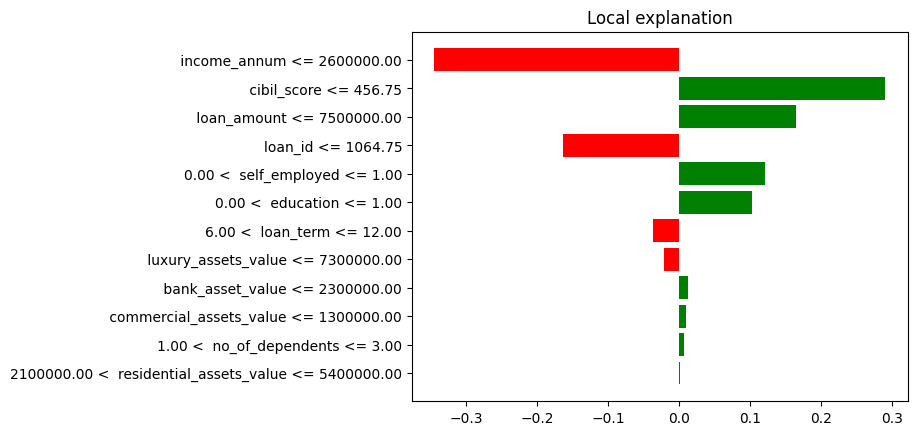

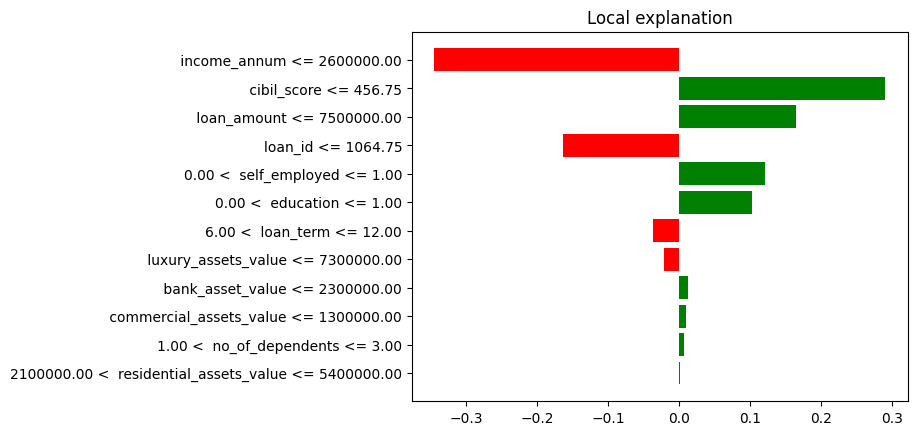

In [40]:
#lime_linear_explanation.show_in_notebook()  # Display Results in Notebook
lime_linear_explanation.as_pyplot_figure()

The LIME (Local Interpretable Model-agnostic Explanations) graph shows the contribution of each feature to a particular prediction for a single instance or observation. The graph helps in understanding the model's decision for a specific case, especially when the model is complex and not inherently interpretable.

Income_annum (<= 2600000.00): The red bar suggests that lower annual incomes up to 2600000.00 are contributing to a higher chance of loan rejection (status 1).

Cibil_score (<= 456.75): Similarly, lower CIBIL scores up to 456.75 seem to be contributing to the loan being rejected.

Loan_amount (<= 7500000.00): The green bar indicates that for loan amounts up to 7500000.00, there's a push towards loan acceptance (status 0).

Loan_id (<= 1064.75): This feature is not usually a predictor in loan models and could be an artifact. Its presence suggests a push towards loan rejection, indicated by the red bar, but it may not make logical sense and could indicate an overfit or a noise artifact within the model.

Self_employed (0.00 < x <= 1.00): Being self-employed is associated with a lower likelihood of rejection (leaning towards acceptance), as shown by the green bar.

Education (0.00 < x <= 1.00): This binary variable seems to have little to no impact on the prediction, as indicated by the very short red bar.

Loan_term (6.00 < x <= 12.00): A loan term that's longer than 6 but up to 12 years appears to significantly drive predictions towards acceptance, as shown by the green bar.

Luxury_assets_value (<= 7300000.00): This variable does not seem to impact the prediction much, as the red bar is quite short.

Bank_asset_value, commercial_assets_value, no_of_dependents, and residential_assets_value: These bars are missing from the explanation, likely indicating they have no significant impact on the prediction for this particular instance.

LIME explanations can vary significantly from one observation to another, which means that these interpretations are specific to the single instance the model is predicting on and may not generalize to other instances.

###Comparision between SHAP, PDP and LIME


SHAP values for the AutoML model highlight cibil_score as the most crucial feature, with high values strongly driving predictions towards loan approval, as one would expect in a credit scoring context. This influence is reflected in the wide distribution of high-value (red) SHAP values. The linear model's SHAP summary also acknowledges the importance of cibil_score, but with a more scattered distribution, implying a less straightforward relationship. In both models, the loan_term has a visible but less impactful presence, and income_annum's impact varies, with the linear model showing high incomes potentially decreasing the predicted outcome.

PDPs for the AutoML model show that certain features like cibil_score and loan_term have threshold effects on predictions—once a cibil_score passes the 600 mark, its positive effect plateaus. In contrast, for linear models, the PDP suggests a gradual, linear association of features like annual_income and loan_amount with the outcome, revealing a more straightforward interpretation of these features compared to the complex, non-linear patterns the AutoML model might capture.

LIME offers case-specific insights, and in the context of a linear model, it might highlight a strong positive influence of income_annum and a negative impact of being self_employed. For the AutoML model, LIME would illustrate how these same features affect a single prediction, potentially highlighting non-linearities or interactions at the individual level.

When comparing these methods, SHAP gives a global view, indicating overall feature importance and the directionality of their effects, showing consistency in cibil_score's impact across models. PDP gives a more nuanced view of the average marginal effect of a feature across the dataset, revealing threshold effects or linear associations not apparent in SHAP summaries. Lastly, LIME dissects individual predictions, offering granular insights which can be especially revealing in complex models where global interpretations may not capture local subtleties.

In essence, SHAP is suitable for understanding how feature values generally affect predictions. In contrast, PDP is better for investigating average effects of features, and LIME excels at explaining individual predictions. These tools complement each other, providing a fuller picture of the model's decision logic, with SHAP and PDP being more informative for global interpretation and LIME for local explanations.

##What is the question?
The overarching question we're trying to answer is multifaceted: It involves predicting loan approval outcomes while thoroughly understanding the data's structure, completeness, relationships, and distributions. This includes identifying significant predictors for loan approval status, determining the presence and impact of missing values, understanding multicollinearity among variables, and evaluating the models' effectiveness in prediction and interpretability.

##What did you do?
To address the range of questions, a systematic approach was undertaken:

Data Types and Cleaning: Identified numerical and categorical data types and examined them for missing values. The analysis indicated no missing values in the dataset.

Exploratory Analysis: Used various visualization tools such as histograms, box plots, and heatmaps to explore data distributions and predictor variable ranges, confirming that the variables made sense within the context of the problem.

Feature Selection and Correlation: Evaluated multicollinearity using VIF and correlation matrices. This helped understand the dependencies between variables and informed feature selection for the models.

Modeling: Built multiple models, starting with linear regression to capture linear relationships, then tree-based models to understand non-linear interactions, and finally utilized AutoML to identify the best-performing model. For each model, the significance of the relationships was evaluated using p-values and other statistical tests.

Interpretability: Employed SHAP, PDP, and LIME methods to interpret the models. This provided both global and local explanations of feature importance and their impact on predictions.

Dealing with Outliers and Imputation: Removed outliers to observe their effect on the model and also employed imputation techniques to understand how well they recover missing values, assessing the bias and variance in errors.

Model Assessment and Hyperparameter Tuning: Assessed whether model assumptions were violated and the extent of multicollinearity. Hyperparameter importance was determined through AutoML, and regularization techniques were applied to see their effect on model performance.

##How well did it work?
The tree-based models, especially the GBM from AutoML, worked particularly well, revealing that the cibil_score was the most significant predictor. The interpretability methods provided insights into feature importance that aligned with intuitive financial understanding—higher credit scores and incomes generally lead to better loan approval odds. Outlier analysis and hyperparameter tuning refined the models further, leading to improved metrics across the board.
Consistency with Expectations: SHAP confirmed that features traditionally associated with creditworthiness, such as cibil_score and income_annum, were indeed influential in the model’s decision-making process. This was in line with the financial industry's understanding and provided a sanity check for the model's reliability.

Identification of Non-linear Effects: SHAP analysis illuminated the non-linear effects and complex interactions that could not be captured by simpler models. For example, the influence of loan_amount on the prediction might vary considerably across different levels of income_annum.

##What did you learn?
The analysis elucidated several key points:

Predictor Importance: cibil_score, income_annum, and loan_amount emerged as significant predictors, with cibil_score consistently showing the most substantial impact.

Data Completeness and Quality: The absence of missing values and the sensible range of predictor variables indicate high data quality, which is crucial for model accuracy.

Complex Relationships: While linear relationships provide a foundation, non-linear relationships captured by tree-based models are pivotal in understanding the data.

Model Complexity: A balance between model complexity and interpretability is crucial. SHAP and LIME provided invaluable insights into model predictions, which would guide actionable business decisions.

Predictive Power and Regularization: Regularization techniques helped mitigate overfitting, enhancing the model's predictive power on unseen data.

From this comprehensive approach, it became evident that machine learning is a powerful tool for predictive analytics but requires a deep understanding of data and careful model construction and interpretation to ensure meaningful and actionable outcomes.

### **References**


https://towardsdatascience.com/automated-machine-learning-with-h2o-258a2f3a203f

 https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e

 https://docs.h2o.ai/

http://net-informations.com/ds/mla/ols.html

https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

 https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/

 https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Wine_Quality.ipynb

https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

https://medium.com/@kalia_65609/interpreting-an-nlp-model-with-lime-and-shap-834ccfa124e4#:~:text=Unlike%20LIME%2C%20SHAP%20does%20not,to%20calculate%20the%20feature%20importance.

https://dhamangaonkar-s.medium.com/ml-model-interpretability-methods-7c2fc02f51b6

https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/Model_Interpretability/Model_Interpretability_Songs.ipynb

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/Model_Interpretability/SHAP%20and%20LIME%20analysis%20Walkthrough.ipynb


## LICENSE

MIT License

Copyright (c) 2024 prarthanashetty29

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.